## Import Library

In [ ]:
# import package python
import numpy as np
import pandas as pd

# seaborn & matplotlib untuk plotting dan
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import WordCloud

# preprocessing untuk memanipulasi data categorical
from sklearn.preprocessing import LabelEncoder
# standardscaler untuk melakukan normalisasi untuk meminimalkan error
from sklearn.preprocessing import StandardScaler
# train test split untuk membagi dataset menjadi data latih & data uji
from sklearn.model_selection import train_test_split

# sklearn model merupakan model dari machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import Lasso

# untuk menampilkan score akurasi dari beberapa model yang digunakan
from sklearn.metrics import accuracy_score

import sys
import warnings
warnings.filterwarnings("ignore")

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Import Dataset

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# membaca file csv melalui Google Drive
df = pd.read_csv('/content/drive/MyDrive/application_train.csv')

Mounted at /content/drive


In [ ]:
# menampilkan dataset
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Business Understanding
[Deskripsi business understanding](https://docs.google.com/document/d/1AtYOlJIFlkhUpxxr4CAAmxUXy6za8AhtfshbOkgseL0/edit?usp=sharing)

## Data Understanding

Problem Statement:

Banyak masyarakat yang ingin mendapatkan pinjaman keuangan agar dapat memenuhi kebutuhan sehari-hari mereka. Oleh sebab itu, Home Credit berupaya memfasilitasi pinjaman keuangan bagi masyarakat yang belum memiliki rekening bank. Permasalahan saat ini adalah, Home Credit ingin data-data client yang mereka miliki dapat dijadikan sebuah prediksi apakah mereka mampu membayar kembali uang yang telah mereka pinjamkan dalam waktu yang sudah ditentukan, atau justru sebaliknya.

Data yang akan digunakan adalah data train. Pada data train terdapat variabel "Target" dimana value 0 dan 1 menjadi pembeda:

Jika client dapat membayar sesuai dengan tanggal jatuh tempo atau dapat membayar tepat waktu, maka ditandai dengan 0.
Jika client mengalami kesulitan untuk membayar pinjaman yang telah diberikan, ditandai dengan 1.

To Do:

Memprediksi karakteristik client yang mengalami kesulitan untuk membayar kembali pinjaman yang diberikan
Mengidentifikasi cashflow perusahaan

## Data Preparation

### Data Pre-Processing

Sebelum melakukan berbagai tahapan pengolahan pada dataset, hal pertama yang harus dilakukan adalah kita harus melakukan pengecekan dataset untuk memahami informasi pada data tersebut

In [ ]:
# untuk melihat tipe data pada DataFrame
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [ ]:
  # menampilkan data dalam bentuk statistik (menampilkan rata-rata, mean, min, max dll)
  df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [ ]:
# untuk melihat value unique dari data categorical
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Sebelum memasuki tahap *handling missing value* dan tahap encoding data, langkah pertama adalah melakukan pengecekan apakah ada distribusi atau persebaran data yang tidak seimbang. Untuk pengambilan sample data, kita menggunakan variabel "Target" karena memiliki value pembeda yaitu x dan y atau 0 dan 1, dimana client yang mampu membayar pinjaman tepat waktu dan client yang memiliki kesulitan untuk membayar pinjaman.

### Distribution The Data Unbalance

In [ ]:
# untuk menampilkan informasi pada variabel target
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

**Pada informasi tersebut diketahui bahwa:**

- Client yang dapat membayar sesuai dengan tanggal jatuh tempo atau dapat membayar tepat waktu, maka ditandai dengan 0 dan total keseluruhan sebanyak 282686 client.
- Client yang mengalami kesulitan untuk membayar pinjaman yang telah diberikan, ditandai dengan 1 dan total keseluruhan sebanyak 24825 client.

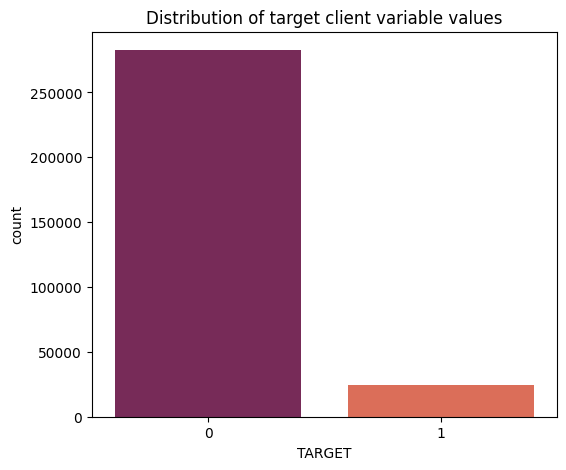

In [ ]:
# untuk menampilkan grafik dapat menggunakan plt.figure
# figsize digunakan untuk mengatur ukuran grafik
plt.figure(figsize=(6,5))
plt.title('Distribution of target client variable values')
sns.countplot(x=df.TARGET, palette = "rocket");

Berdasarkan grafik distribusi tersebut, dapat disimpulkan bahwa: Adanya ketimpangan data yang extreme atau data yang tidak seimbang pada variabel "Target". Dapat dilihat bahwa, distribusi variabel "Target" lebih banyak pada value 0, yaitu client yang dapat membayar pinjaman tepat waktu dibandingkan dengan value 1, client yang memiliki kesulitan untuk membayar pinjaman.

### Missing Value Checking

In [ ]:
# mengecek jumlah baris dan kolom pada dataset
df.shape

(307511, 122)

In [ ]:
# mengecek jumlah tipe data pada dataset
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [ ]:
# untuk mengecek apakah ada data yang duplicate/double
df.duplicated().sum()

0

In [ ]:
# melihat data categorical/data yang memiliki tipe data "object"
category_col = [i for i in df.columns if df[i].dtype == 'object']
category_col

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [ ]:
# melihat data numeric/data yang memiliki tipe data diluar "object"
num_col = [i for i in df.columns if df[i].dtype != 'object']
num_col

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [ ]:
# mencari missing value pada dataset
missing_value = df.isnull().sum().reset_index()
# membuat kolom fitur, total dan persentase untuk missing value
missing_value.columns = ['Features', 'Total']
missing_value['Percent'] = round((missing_value['Total']/len(df))*100,2)
# menyortir data missing value menggunakan ascending = False, yaitu mengurutkan missing value dari yang paling besar hingga kecil
missing_value = missing_value.sort_values('Percent', ascending=False).reset_index(drop=True)
missing_value = missing_value[missing_value['Percent']>0]
missing_value.head(60)

,Features,Total,Percent
0,COMMONAREA_MEDI,214865,69.87
1,COMMONAREA_AVG,214865,69.87
2,COMMONAREA_MODE,214865,69.87
3,NONLIVINGAPARTMENTS_MODE,213514,69.43
4,NONLIVINGAPARTMENTS_AVG,213514,69.43
5,NONLIVINGAPARTMENTS_MEDI,213514,69.43
6,FONDKAPREMONT_MODE,210295,68.39
7,LIVINGAPARTMENTS_MODE,210199,68.35
8,LIVINGAPARTMENTS_AVG,210199,68.35
9,LIVINGAPARTMENTS_MEDI,210199,68.35


In [ ]:
# mengecek missing value pada data categorical
for col in df.select_dtypes("object").columns:
  print(df[col].value_counts())

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUC

Berdasarkan informasi tersebut, terdapat missing value pada data "CODE GENDER" & "ORGANIZATION TYPE" yang berupa data XNA sehingga harus diubah agar mendapatkan nilai. Pada data "NAME FAMILY STATUS" terdapat data unknown yang akan kita drop

In [ ]:
# mengubah data XNA menjadi mode
df['CODE_GENDER']=df['CODE_GENDER'].replace('XNA', df['CODE_GENDER'].mode()[0])
df['ORGANIZATION_TYPE']=df['ORGANIZATION_TYPE'].replace('XNA', df['ORGANIZATION_TYPE'].mode()[0])

In [ ]:
# menghapus data unknown yang terdapat pada "NAME_FAMILY_STATUS"
df = df.drop(df[df['NAME_FAMILY_STATUS'] == 'Unknown'].index)

In [ ]:
# mengecek missing value pada data categorical
for col in df.select_dtypes("object").columns:
  print(df[col].value_counts())

Cash loans         278232
Revolving loans     29277
Name: NAME_CONTRACT_TYPE, dtype: int64
F    202451
M    105058
Name: CODE_GENDER, dtype: int64
N    202922
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Y    213310
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
Working                 158774
Commercial associate     71615
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / secondary special    218391
Higher education                  74862
Incomplete higher                 10277
Lower secondary                    3815
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype:

In [ ]:
print(df[['ORGANIZATION_TYPE', 'CODE_GENDER', 'NAME_FAMILY_STATUS']].isnull().sum())

ORGANIZATION_TYPE     0
CODE_GENDER           0
NAME_FAMILY_STATUS    0
dtype: int64


### Handling Missing Value

In [ ]:
# mengecek missing value yang terdapat pada data categorical
df[category_col].isnull().sum().sort_values(ascending=False)

FONDKAPREMONT_MODE            210294
WALLSMATERIAL_MODE            156340
HOUSETYPE_MODE                154296
EMERGENCYSTATE_MODE           145754
OCCUPATION_TYPE                96391
NAME_TYPE_SUITE                 1290
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
dtype: int64

In [ ]:
df = df.drop(['EMERGENCYSTATE_MODE'], axis=1)

In [ ]:
# mengecek missing value yang terdapat pada data numeric
df[num_col].isnull().sum().sort_values(ascending=False)

COMMONAREA_MODE                214864
COMMONAREA_AVG                 214864
COMMONAREA_MEDI                214864
NONLIVINGAPARTMENTS_AVG        213513
NONLIVINGAPARTMENTS_MODE       213513
                                ...  
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
TARGET                              0
FLAG_DOCUMENT_2                     0
SK_ID_CURR                          0
Length: 106, dtype: int64

In [ ]:
df[num_col].shape

(307509, 106)

In [ ]:
# menghapus data numeric yang memiliki missing value >50%
df.drop(columns=list(missing_value['Features'].loc[missing_value['Percent'] >50]), inplace=True)

In [ ]:
# mengecek skewness pada data numeric untuk menentukan fillna/field missing value
# Menampilkan skewness pada data numeric
skewness = df.skew()

# Menampilkan output
print(skewness)

SK_ID_CURR                     -0.001203
TARGET                          3.078146
CNT_CHILDREN                    1.974594
AMT_INCOME_TOTAL              391.561113
AMT_CREDIT                      1.234776
                                 ...    
AMT_REQ_CREDIT_BUREAU_DAY      27.043454
AMT_REQ_CREDIT_BUREAU_WEEK      9.293555
AMT_REQ_CREDIT_BUREAU_MON       7.804834
AMT_REQ_CREDIT_BUREAU_QRT     134.365605
AMT_REQ_CREDIT_BUREAU_YEAR      1.243584
Length: 68, dtype: float64


Berdasarkan nilai skewness tersebut dapat diketahui bahwa:
1. Jika data memiliki nilai skewness negatif, maka field missing value dapat diisi dengan median
2. Jika data memiliki nilai skewness positif, maka field missing value dapat diisi dengan mean/rata-rata
3. Jika data memiliki nilai skewness  0, maka field missing value dapat diisi dengan mean maupun dengan median

In [ ]:
# mengisi missing value pada data "Categorical" mennggunakan mode/modus
# mengisi missing value pada data "Numeric" menggunakan median/mean
num_col = df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in num_col:
  if df[column].skew() > 0:
    df[column]=df[column].fillna(df[column].mean())
  else:
    df[column]=df[column].fillna(df[column].median())


category_col = df.select_dtypes(include=['object']).columns.tolist()

for column in category_col:
  df[column]=df[column].fillna(df[column].mode()[0])

In [ ]:
df[category_col].isnull().sum().sort_values(ascending=False)

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

In [ ]:
df[num_col].isnull().sum().sort_values(ascending=False)

SK_ID_CURR                     0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_7                0
                              ..
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
YEARS_BEGINEXPLUATATION_AVG    0
FLOORSMAX_AVG                  0
AMT_REQ_CREDIT_BUREAU_YEAR     0
Length: 68, dtype: int64

In [ ]:
# menampilkan agregasi data menggunakan isna().sum()
df.isna().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 80, dtype: int64

In [ ]:
# mengecek kembali baris dan kolom pada dataset yang sudah di cleansing
df.shape

(307509, 80)

In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.083300,0.9722,0.083300,0.9722,0.083300,0.014900,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.9851,0.291700,0.9851,0.291700,0.9851,0.291700,0.071400,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.9816,0.226281,0.9816,0.222314,0.9816,0.225896,0.102547,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,0.9816,0.226281,0.9816,0.222314,0.9816,0.225896,0.102547,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.006402,0.007,0.034362,0.267396,0.265475,1.899978
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.9816,0.226281,0.9816,0.222314,0.9816,0.225896,0.102547,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


**Berdasarkan proses handling missing value tersebut, dapat disimpulkan bahwa:**
- Data dengan missing value > 50% atau lebih akan di drop/dihapus. Pada studi kasus tertentu, jika data dengan *missing value* > 50% diisi dengan median/mode dapat menyebabkan ketimpangan data atau *unbalance* data, karena dalam real case *missing value* sebanyak itu tidak dapat langsung disimpulkan untuk diisi dengan median/mode
- Data dengan missing value yang sedikit dapat diisi dengan median/mode. Dimana data *categorical* diisi dengan mode. Sedangkan data numerik dapat diisi dengan 2 pilihan, yaitu mean atau median.
- Untuk data numerik, kita dapat menganalisis hasil skew dari data tersebut, jika nilainya negatif maka diisi oleh median, jika nilai positif diisi oleh mean dan jika nilai  0 dapat diisi oleh mean/median

### Detecting Outlier

Proses detecting outlier (deteksi anomali) hanya dapat dilakukan pada data numerik. Proses ini bertujuan untuk mendeteksi/mengetahui apakah ada value yang berada melebihi rata-rata (value ekstrem) atau berbeda jauh dari value lainnya dalam sebuah dataset. Salah satu cara untuk mendeteksi outlier dapat menggunakan visualisasi boxplot

In [ ]:
# membuat list data numeric yang memiliki hubungan dengan prediksi
nums_list = df[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']]

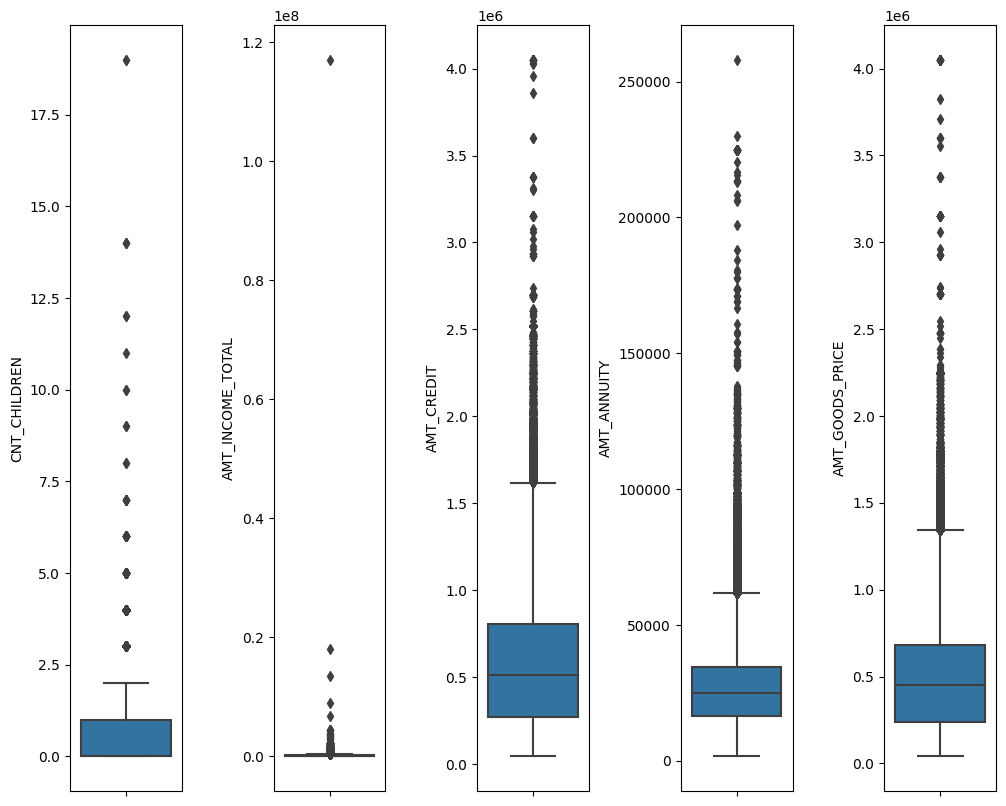

In [ ]:
# subplots digunakan untuk memunculkan plotting, ncols = kolom. nrows = baris. figsize merupakan ukuran dari plotting (dapat di adjust)
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(10, 8))
# posisi element pada array di dalam list
index = 0
# axs merupakan axis = untuk mengurutkan index dalam sebuah array
axs = axs.flatten()
# looping diambil dari data "int_features",yaitu list yang sebelumnya dibuat
for k,v in nums_list.items():
    sns.boxplot(y = k, data = nums_list, ax=axs[index])
# index +=1 merupakan rumus penjumlahan, dimana index berawal dari 0 dan index selanjutnya dijumlah 1
    index += 1
# jika index telah == (sama dengan) 5, maka break. looping dihentikan
    if index == 5:
      break;
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
# membuat list data numeric yang memiliki hubungan dengan prediksi
nums_list = df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_YEAR']]

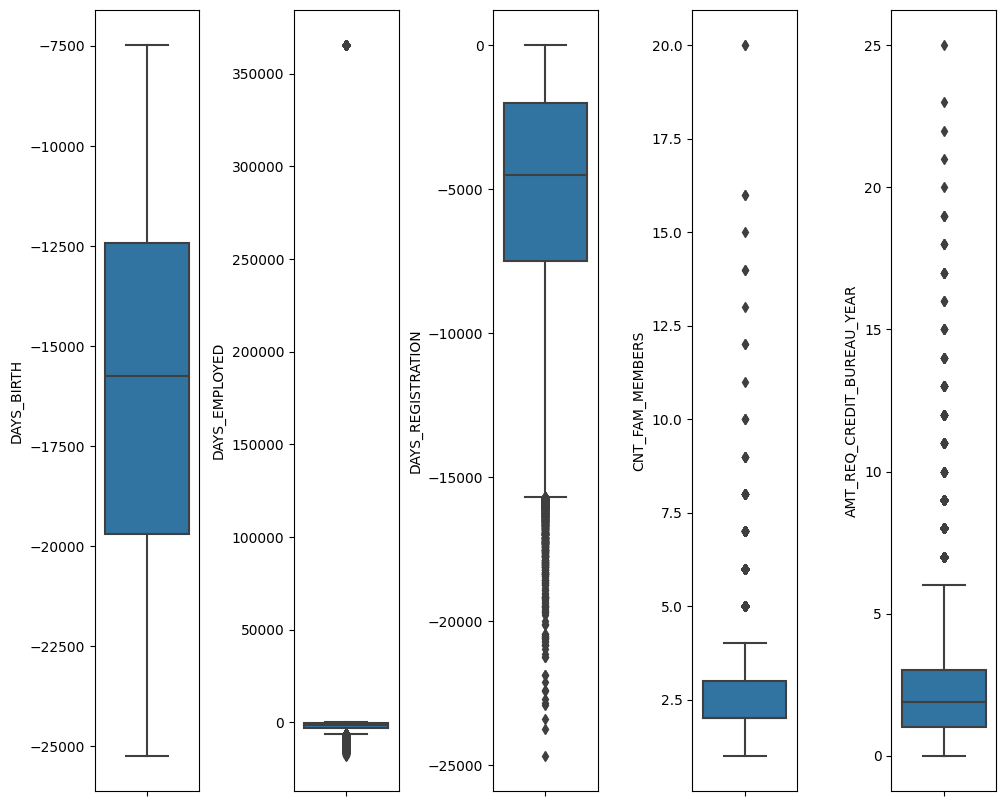

In [ ]:
# subplots digunakan untuk memunculkan plotting, ncols = kolom. nrows = baris. figsize merupakan ukuran dari plotting (dapat di adjust)
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(10, 8))
# posisi element pada array di dalam list
index = 0
# axs merupakan axis = untuk mengurutkan index dalam sebuah array
axs = axs.flatten()
# looping diambil dari data "int_features",yaitu list yang sebelumnya dibuat
for k,v in nums_list.items():
    sns.boxplot(y = k, data = nums_list, ax=axs[index])
# index +=1 merupakan rumus penjumlahan, dimana index berawal dari 0 dan index selanjutnya dijumlah 1
    index += 1
# jika index telah == (sama dengan) 5, maka break. looping dihentikan
    if index == 5:
      break;
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Berdasarkan hasil eksplorasi data, kami tidak melakukan cleansing atau menghapus dan tidak memanipulasi (impute) outlier dikarenakan value pada data tersebut merupakan data real/data sebenarnya. Hal ini dikarenakan agar data tersebut dapat di akomodasikan oleh model supaya mendapatkan hasil/prediksi yang sesuai berdasarkan dengan jumlah data sebenarnya.

## Data Analysis

### Exploratory Data Analysis
Pada tahap ini akan dilakukan visualisasi baik untuk data kategorik maupun numerik. Tujuan dari dilakukannya EDA adalah untuk mengetahui sebaran dari data.

####Loan types
Untuk proses EDA yang pertama, langkah yang dilakukan adalah melihat distribusi kategori pinjaman berdasarkan Target 0 dan 1. Kategori pinjaman ini dibagi menjadi *cash loans* atau pinjaman tunai dan *revolving loans* atau pinjaman bergulir.

Text(0.5, 0, 'TARGET 0')

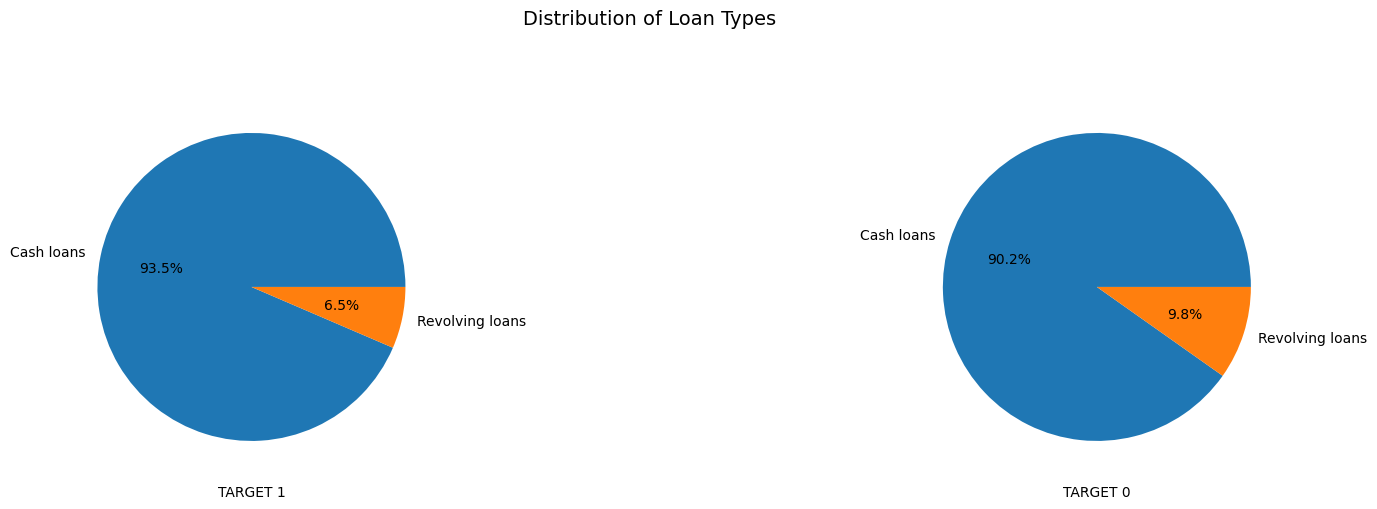

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
df.loc[df["TARGET"]==1, "NAME_CONTRACT_TYPE"].reset_index().groupby("NAME_CONTRACT_TYPE").size().plot(kind="pie", ax=ax1, autopct='%1.1f%%')
df.loc[df["TARGET"]==0, "NAME_CONTRACT_TYPE"].reset_index().groupby("NAME_CONTRACT_TYPE").size().plot(kind="pie", ax=ax2, autopct='%1.1f%%')

fig.suptitle('Distribution of Loan Types', fontsize=14, y=1.05)
ax1.set_xlabel("TARGET 1")
ax2.set_xlabel("TARGET 0")


In [ ]:
table = df.groupby(by=['NAME_CONTRACT_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan kategori kontrak')
table.sort_values(by='SK_ID_CURR', ascending=False)

Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan kategori kontrak


,NAME_CONTRACT_TYPE,TARGET,SK_ID_CURR
0,Cash loans,0,255011
2,Revolving loans,0,27673
1,Cash loans,1,23221
3,Revolving loans,1,1604


Berdasarkan plot "NAME_CONTRACT_TYPE", *cash loans* dan *revolving loans* menunjukkan jumlah TARGET 0 yang lebih besar daripada TARGET 1. Itu artinya, masing-masing dari kategori pinjaman memiliki kemungkinan yang lebih besar untuk klien tidak kesulitan membayar pinjaman. Namun, TARGET 1 dari dua kategori *cash loans* dan *revolving loans* menunjukkan bahwa *cash loans* adalah kategori yang memiliki peluang lebih besar dalam kesuliitan membayar pinjaman karena jumlah TARGET 1-nya yang mencapai 23221 atau 93.5%.

####Client gender
Selanjutnya, melihat klien peminjam berdasarkan gender. Representasi plot di bawah ini akan menunjukkan banyak distribusi peminjam laki-laki dan perempuan berdasarkan masing-masing target.

Text(0.5, 0, 'TARGET 0')

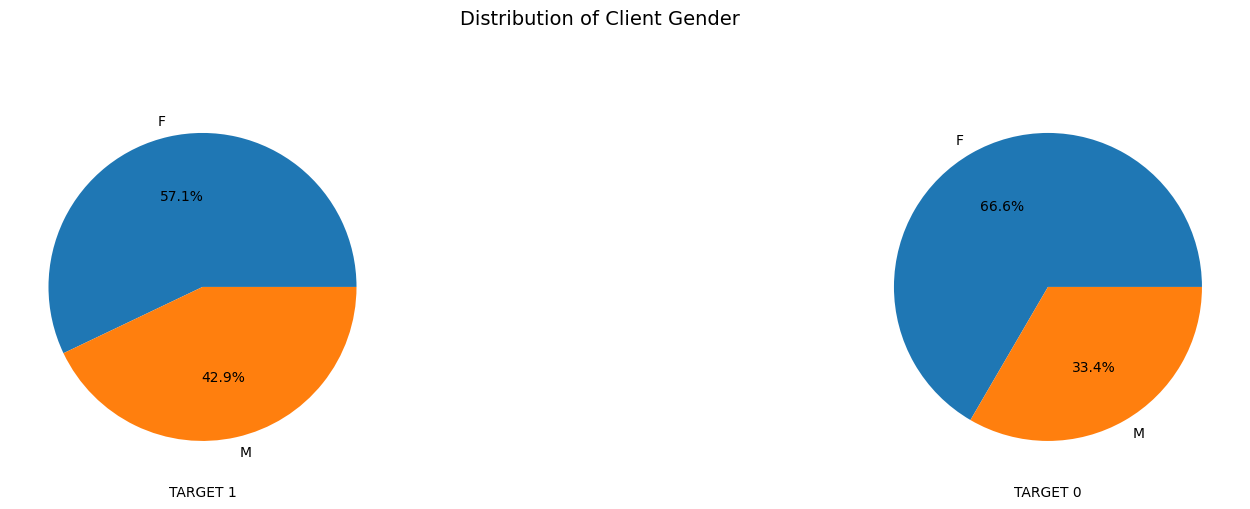

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
df.loc[df["TARGET"]==1, "CODE_GENDER"].reset_index().groupby("CODE_GENDER").size().plot(kind="pie", ax=ax1, autopct='%1.1f%%')
df.loc[df["TARGET"]==0, "CODE_GENDER"].reset_index().groupby("CODE_GENDER").size().plot(kind="pie", ax=ax2, autopct='%1.1f%%')

fig.suptitle('Distribution of Client Gender', fontsize=14, y=1.05)
ax1.set_xlabel("TARGET 1")
ax2.set_xlabel("TARGET 0")


In [ ]:
table = df.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan Gender')
table.sort_values(by='SK_ID_CURR', ascending=False)

Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan Gender


,CODE_GENDER,TARGET,SK_ID_CURR
0,F,0,188281
2,M,0,94403
1,F,1,14170
3,M,1,10655


Berdasarkan plot "CODE_GENDER", kategori perempuan dan laki-laki menunjukkan jumlah TARGET 0 yang lebih besar daripada TARGET 1. Itu artinya, masing-masing dari kategori pinjaman memiliki kemungkinan yang lebih besar untuk klien tidak kesulitan membayar pinjaman. Namun, TARGET 1 dari kategori klien berdasarkan gender ini menunjukkan bahwa perempuan memiliki peluang lebih besar dalam kesulitan membayar pinjaman dibandingkan laki-laki, karena jumlah TARGET 1-nya yang mencapai 14170 atau 57.1%.

####Flag own car and flag own real estate
"FLAG_OWN_CAR" adalah klien yang memiliki mobil dan "FLAG_OWN_REALTY" adalah klien yang memiliki barang tetap (tak bergerak).

Text(0.5, 0, 'Flag Own Estate TARGET 0')

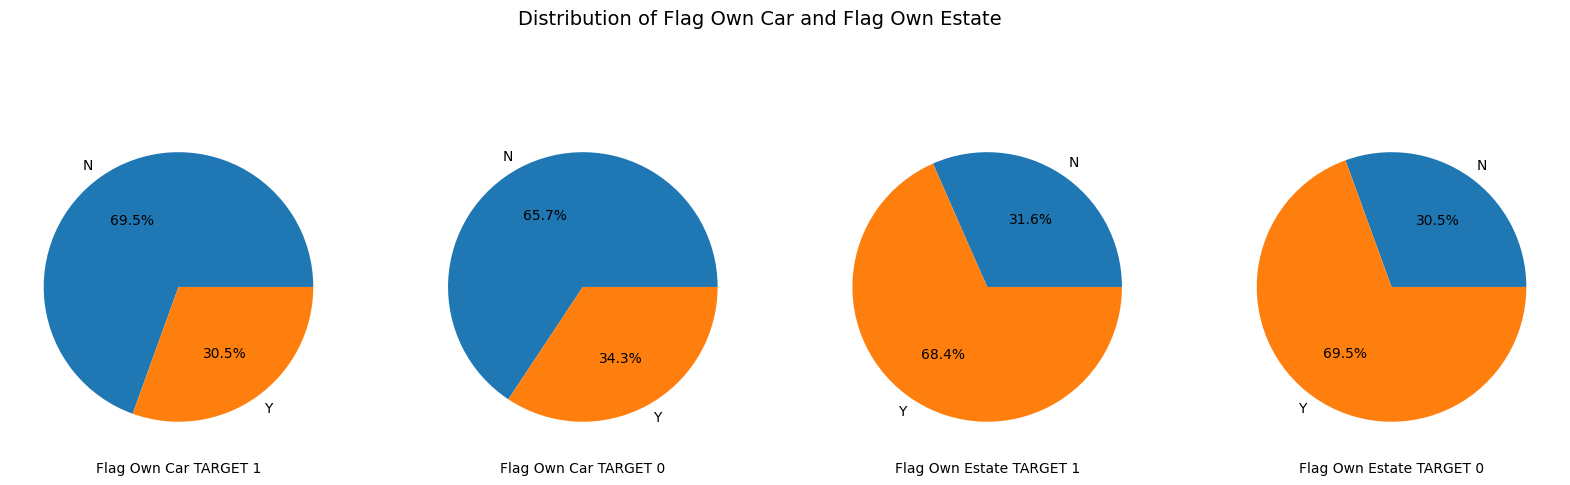

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 5))
df.loc[df["TARGET"]==1, "FLAG_OWN_CAR"].reset_index().groupby("FLAG_OWN_CAR").size().plot(kind="pie", ax=ax1, autopct='%1.1f%%')
df.loc[df["TARGET"]==0, "FLAG_OWN_CAR"].reset_index().groupby("FLAG_OWN_CAR").size().plot(kind="pie", ax=ax2, autopct='%1.1f%%')
df.loc[df["TARGET"]==1, "FLAG_OWN_REALTY"].reset_index().groupby("FLAG_OWN_REALTY").size().plot(kind="pie", ax=ax3, autopct='%1.1f%%')
df.loc[df["TARGET"]==0, "FLAG_OWN_REALTY"].reset_index().groupby("FLAG_OWN_REALTY").size().plot(kind="pie", ax=ax4, autopct='%1.1f%%')

fig.suptitle('Distribution of Flag Own Car and Flag Own Estate', fontsize=14, y=1.05)
ax1.set_xlabel("Flag Own Car TARGET 1")
ax2.set_xlabel("Flag Own Car TARGET 0")
ax3.set_xlabel("Flag Own Estate TARGET 1")
ax4.set_xlabel("Flag Own Estate TARGET 0")

In [ ]:
table = df.groupby(by=['FLAG_OWN_CAR','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan Kepemilikan Mobil')
table.sort_values(by='SK_ID_CURR', ascending=False)

Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan Kepemilikan Mobil


,FLAG_OWN_CAR,TARGET,SK_ID_CURR
0,N,0,185673
2,Y,0,97011
1,N,1,17249
3,Y,1,7576


In [ ]:
table = df.groupby(by=['FLAG_OWN_REALTY','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan Kepemilikan Barang Tetap')
table.sort_values(by='SK_ID_CURR', ascending=False)

Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan Kepemilikan Barang Tetap


,FLAG_OWN_REALTY,TARGET,SK_ID_CURR
2,Y,0,196327
0,N,0,86357
3,Y,1,16983
1,N,1,7842




*  Berdasarkan plot "FLAG_OWN_CAR", kategori yang memiliki
mobil dan tidak memiliki mobil menunjukkan jumlah TARGET 0 yang lebih besar daripada TARGET 1. Itu artinya, masing-masing dari kategori pinjaman memiliki kemungkinan yang lebih besar untuk klien tidak kesulitan membayar pinjaman. Namun, TARGET 1 dari kategori kepemilikan mobil menunjukkan bahwa klien yang tidak memiliki mobil berpeluang lebih besar dalam kesulitan membayar pinjaman karena jumlah TARGET 1-nya yang mencapai 17249 atau 69.5%.
*  Berdasarkan plot "FLAG_OWN_REALTY", kategori yang memiliki barang tetap dan tidak memiliki barang tetap menunjukkan jumlah TARGET 0 yang lebih besar daripada TARGET 1. Itu artinya, masing-masing dari kategori pinjaman memiliki kemungkinan yang lebih besar untuk klien tidak kesulitan membayar pinjaman. Namun, TARGET 1 dari kategori kepemilikan barang tetap menunjukkan bahwa klien yang memiliki barang tetap berpeluang lebih besar dalam kesulitan membayar pinjaman karena jumlah TARGET 1-nya yang mencapai 16983 atau 68.4%.






####Client accompanied by
Plot dari "NAME_TYPE_SUITE" menunjukkan klien yang ditemani atau tidak saat mengajukan pinjaman.

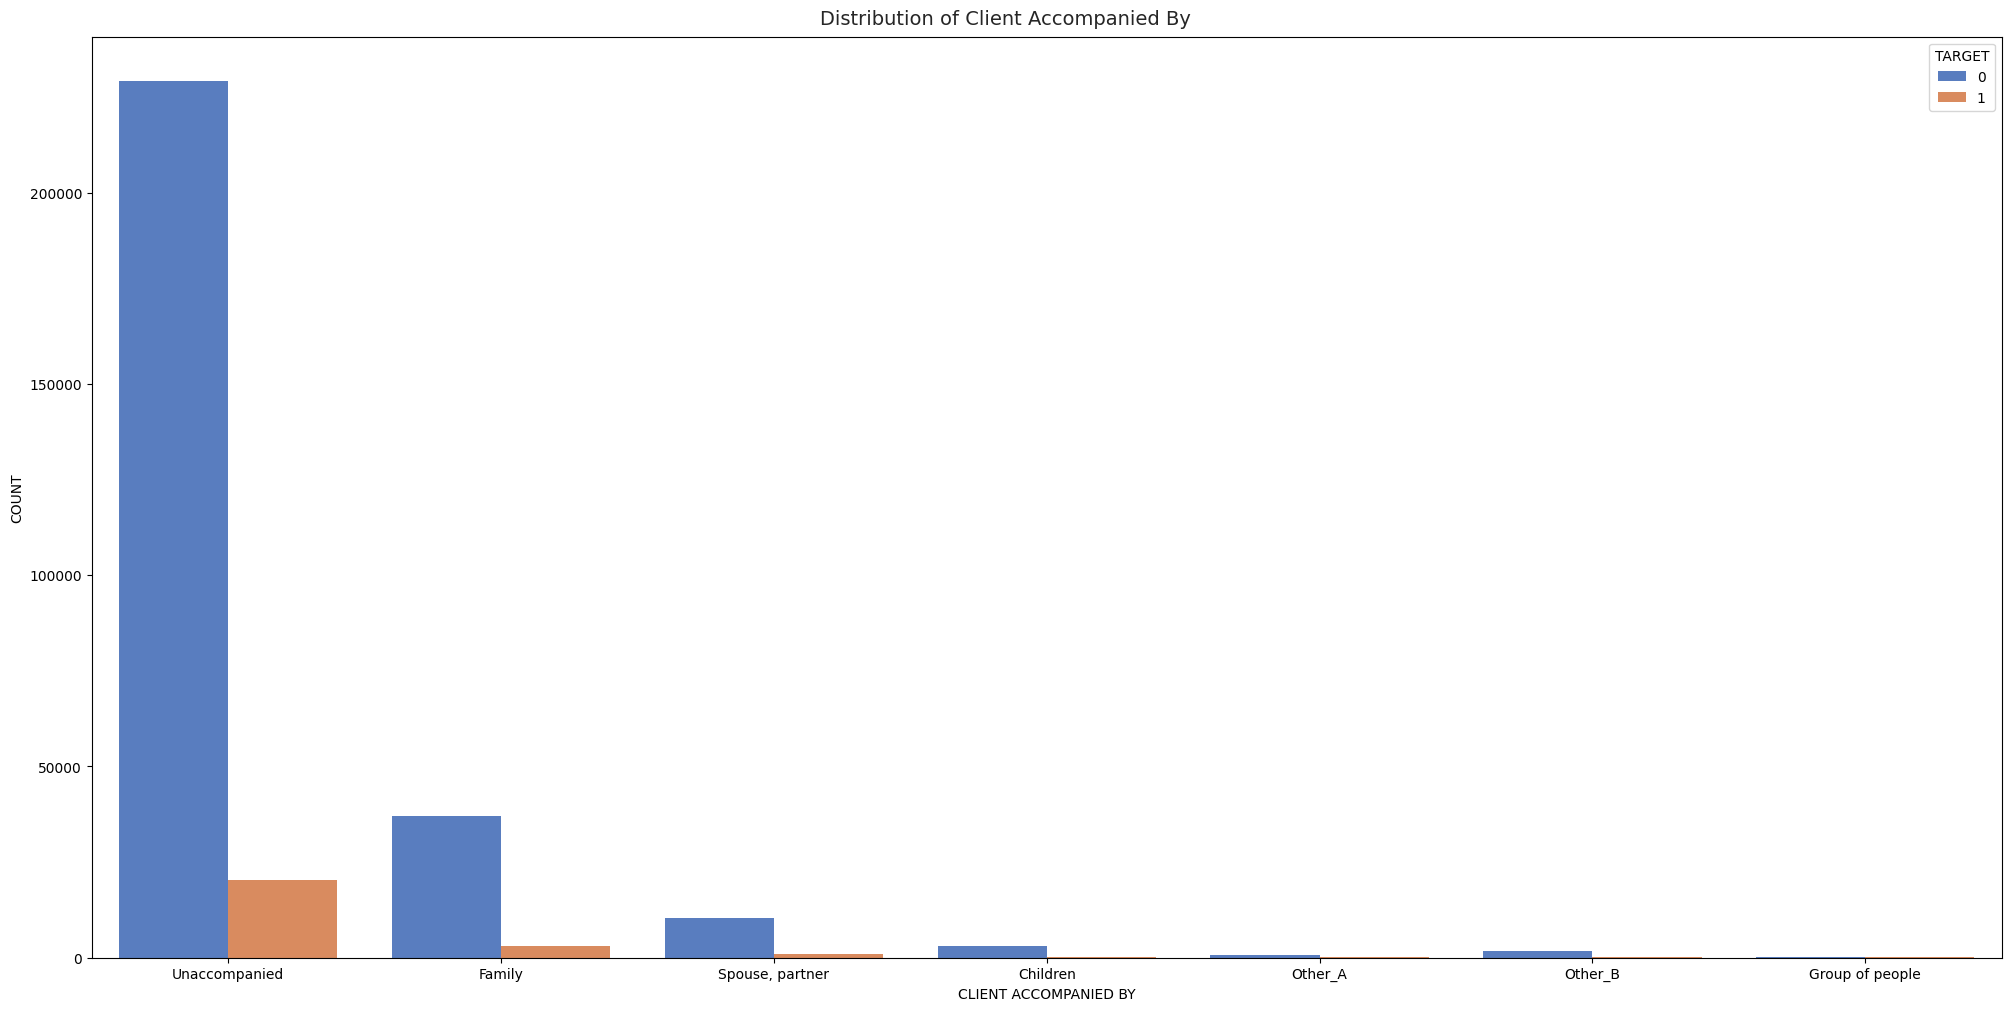

In [ ]:
fig,axes =  plt.subplots(figsize=(20,10),constrained_layout=True)
ax = sns.countplot(data=df, x='NAME_TYPE_SUITE', hue='TARGET', palette='muted')
ax.set_xticklabels(ax.get_xticklabels())
ax.set_xlabel('CLIENT ACCOMPANIED BY')
ax.set_ylabel('COUNT')
sns.set_style('darkgrid')
fig.suptitle('Distribution of Client Accompanied By', fontsize=14)
plt.show()

In [ ]:
table = df.groupby(by=['NAME_TYPE_SUITE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan Ditemani atau Tidak')
table.sort_values(by='SK_ID_CURR', ascending=False)

Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan Ditemani atau Tidak


,NAME_TYPE_SUITE,TARGET,SK_ID_CURR
12,Unaccompanied,0,229409
2,Family,0,37140
13,Unaccompanied,1,20407
10,"Spouse, partner",0,10475
0,Children,0,3026
3,Family,1,3009
8,Other_B,0,1596
11,"Spouse, partner",1,895
6,Other_A,0,790
4,Group of people,0,248


Berdasarkan plot "NAME_TYPE_SUITE", seluruh kategori dari kategori teman klein saat memijam menunjukkan jumlah TARGET 0 yang lebih besar daripada TARGET 1. Itu artinya, masing-masing dari kategori memiliki kemungkinan yang lebih besar untuk klien tidak kesulitan membayar pinjaman. Namun, Target 1 dari kategori *unaccompanied* menunjukkan bahwa klien yang tidak ditemani saat melakukan pinjaman memiliki peluang paling besar dalam kesulitan membayar pinjaman dibandingkan kategori yang lain karena jumlah TARGET 1-nya yang mencapai 20407.

####Family status of client
"NAME_FAMILY_STATUS" menunjukkan status keluarga dari klien. Representasi plot status keluarga klien dibagi menjadi beberapa kategori, yaitu *married* (menikah), *single/not married* (belum menikah), *civil marriage* (perkawinan sipil), *separated* (cerai), *widow* (janda), dan *unknown*.

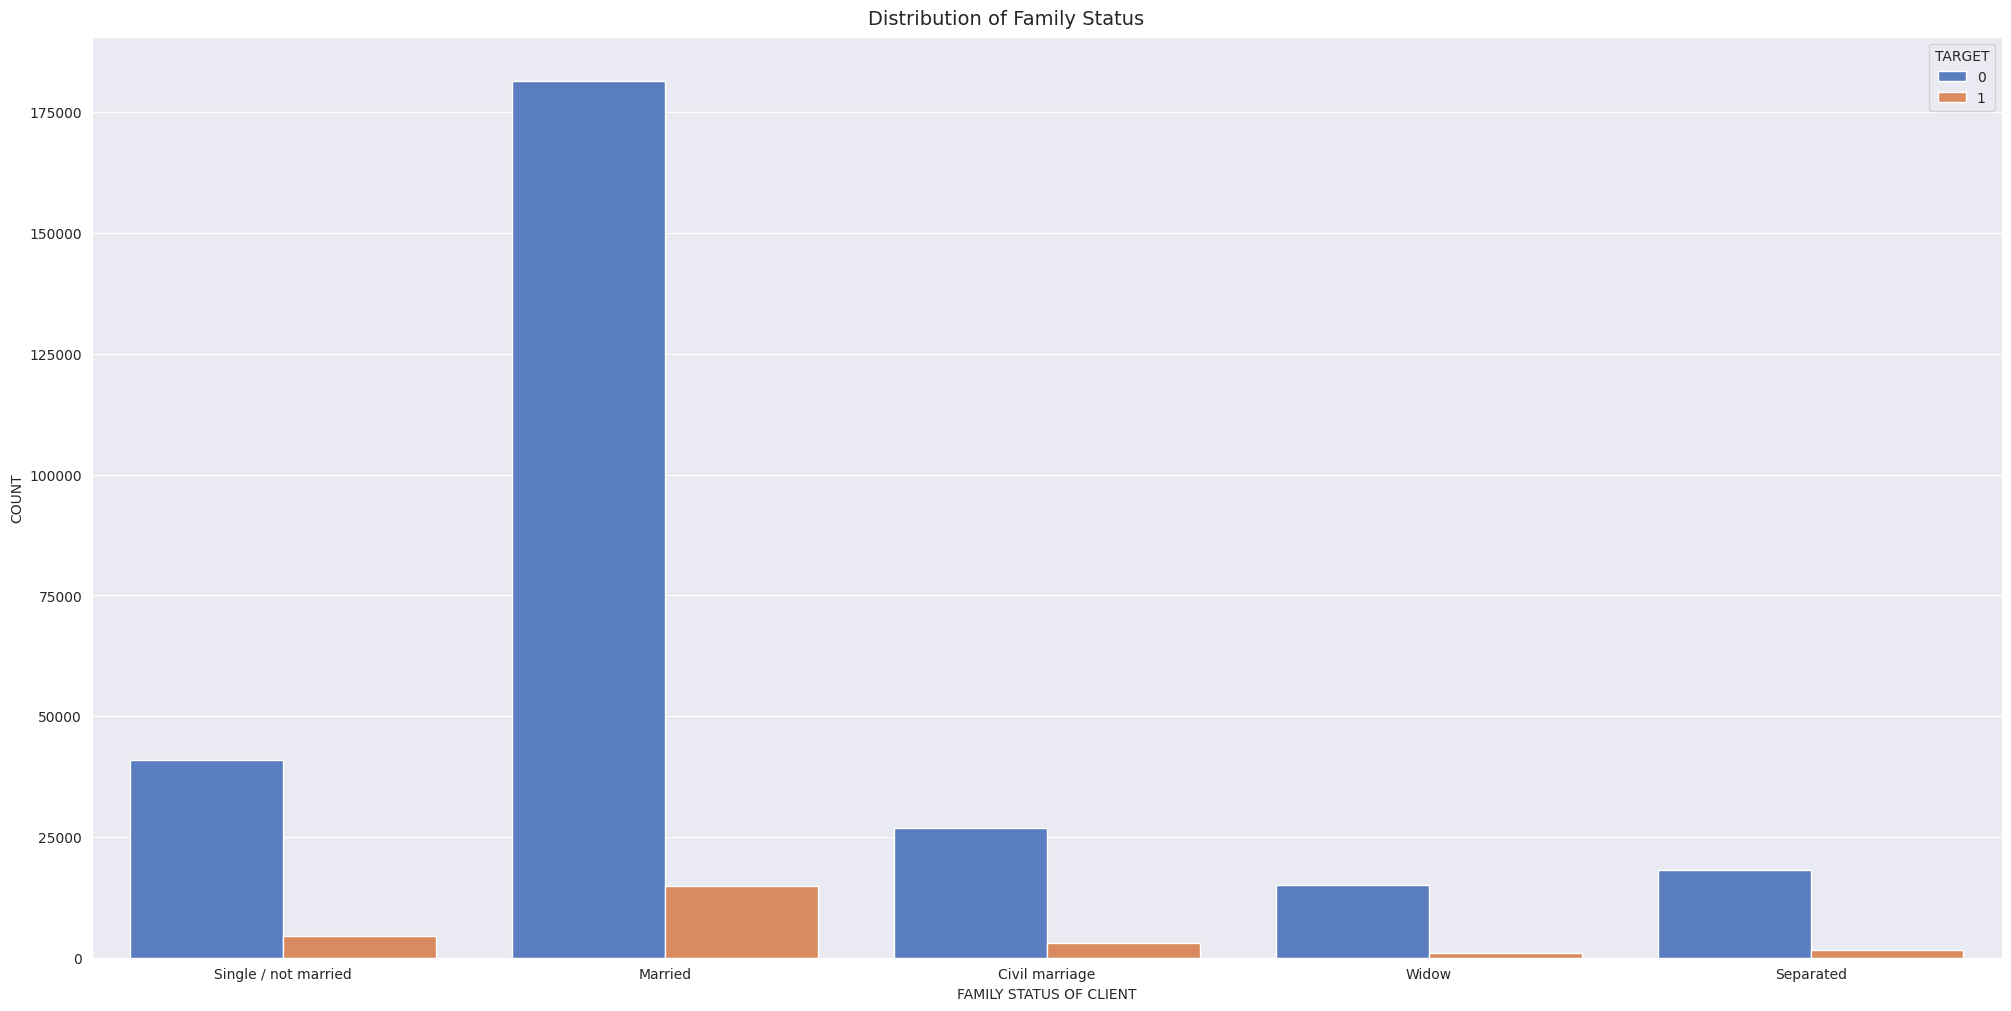

In [ ]:
fig,axes =  plt.subplots(figsize=(20,10),constrained_layout=True)
ax = sns.countplot(data=df, x='NAME_FAMILY_STATUS', hue='TARGET', palette='muted')
ax.set_xticklabels(ax.get_xticklabels())
ax.set_xlabel('FAMILY STATUS OF CLIENT')
ax.set_ylabel('COUNT')
sns.set_style('darkgrid')
fig.suptitle('Distribution of Family Status', fontsize=14)
plt.show()

In [ ]:
table = df.groupby(by=['NAME_FAMILY_STATUS','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan Status Keluarga')
table.sort_values(by='SK_ID_CURR', ascending=False)

Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan Status Keluarga


,NAME_FAMILY_STATUS,TARGET,SK_ID_CURR
2,Married,0,181582
6,Single / not married,0,40987
0,Civil marriage,0,26814
4,Separated,0,18150
8,Widow,0,15151
3,Married,1,14850
7,Single / not married,1,4457
1,Civil marriage,1,2961
5,Separated,1,1620
9,Widow,1,937




Berdasarkan plot "NAME_FAMILY_STATUS", seluruh kategori dari kategori status keluarga klein menunjukkan jumlah TARGET 0 yang lebih besar daripada TARGET 1. Itu artinya, masing-masing dari kategori ini memiliki kemungkinan yang lebih besar untuk klien tidak kesulitan membayar pinjaman. Namun, TARGET 1 dari kategori *married* menunjukkan bahwa klien yang sudah menikah memiliki peluang paling besar dalam kesulitan membayar pinjaman daripada klien kategori lain karena jumlah TARGET 1-nya yang mencapai 14850.

####Number of children
Plot dari "CNT_CHILDREN" menunjukkan seberapa besar pengaruh klien kesulitan membayar berdasarkan jumlah anak yang dimiliki.

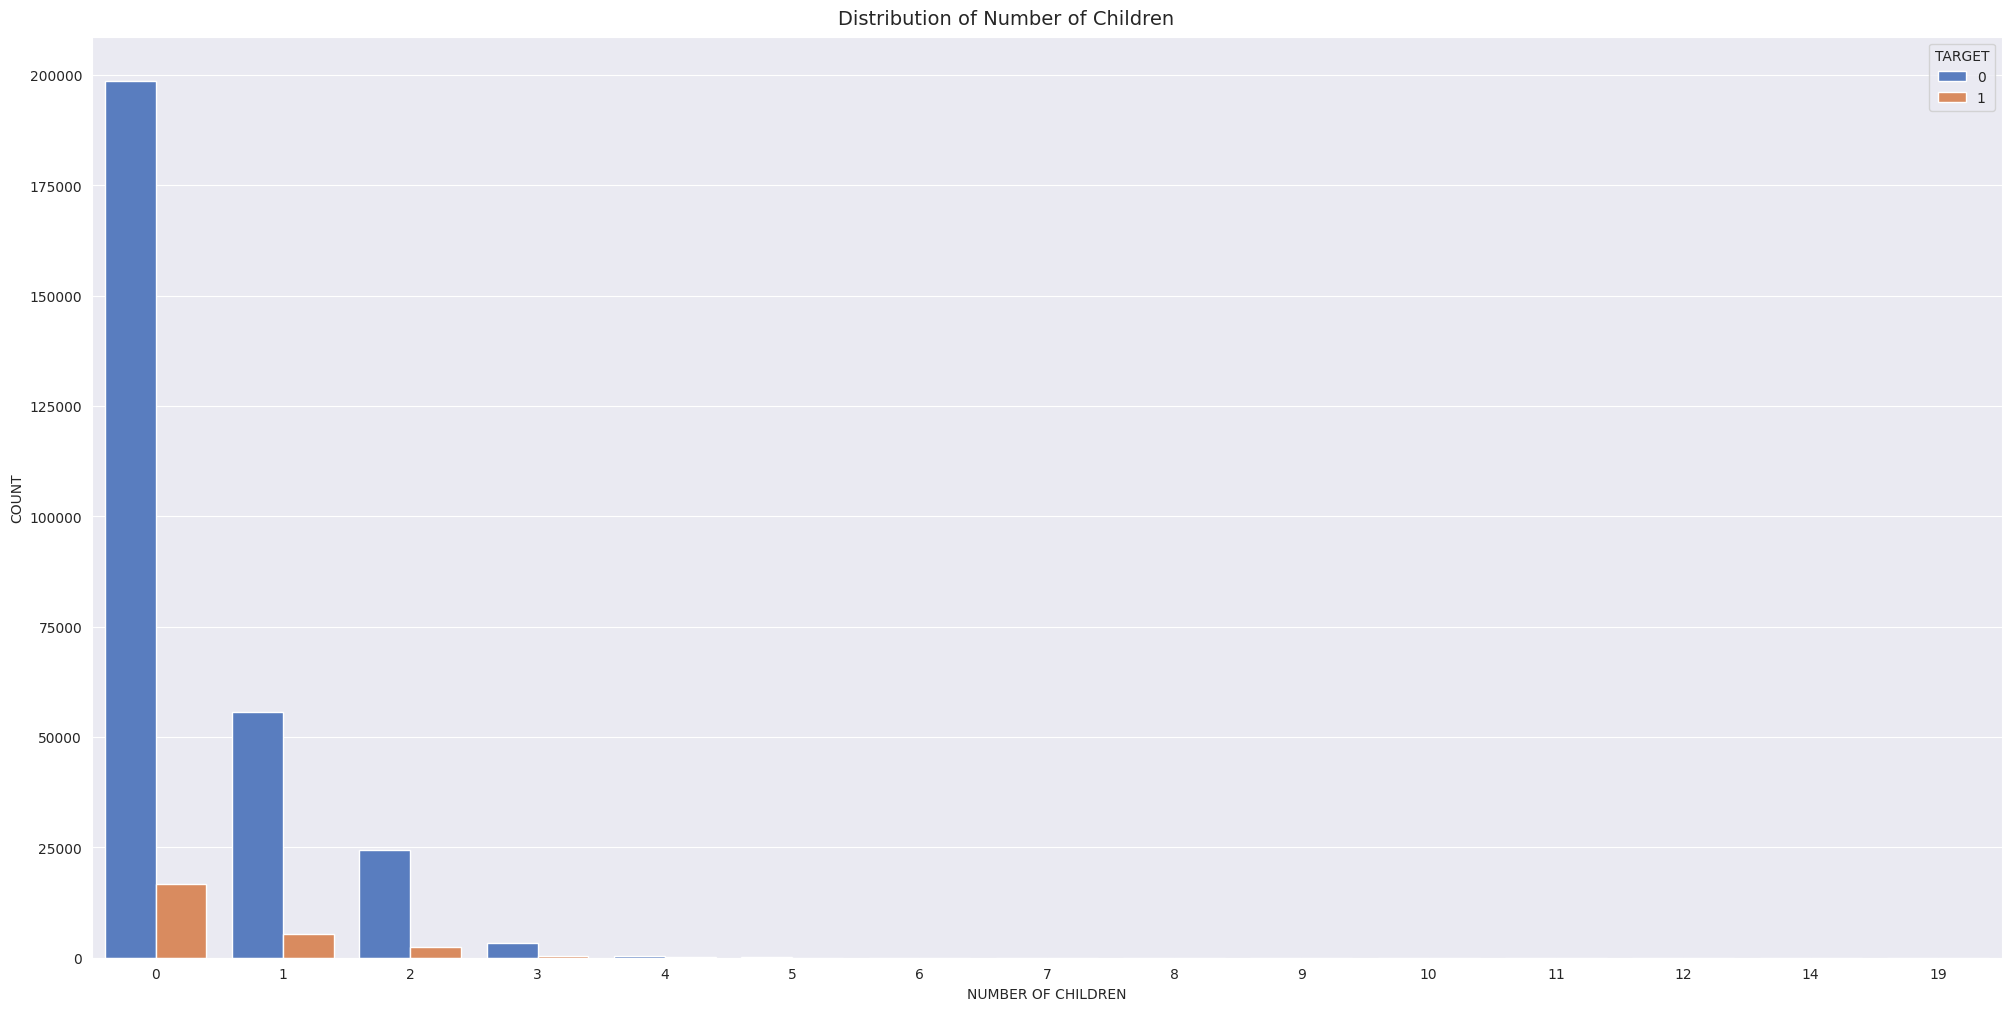

In [ ]:
fig,axes =  plt.subplots(figsize=(20,10),constrained_layout=True)
ax = sns.countplot(data=df, x='CNT_CHILDREN', hue='TARGET', palette='muted')
ax.set_xticklabels(ax.get_xticklabels())
ax.set_xlabel('NUMBER OF CHILDREN')
ax.set_ylabel('COUNT')
sns.set_style('darkgrid')
fig.suptitle('Distribution of Number of Children', fontsize=14)
plt.show()

In [ ]:
table = df.groupby(by=['CNT_CHILDREN','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Tingkat Kemampuan Klien Membayar Berdasarkan Pinjaman Jumlah Anak')
table.sort_values(by='SK_ID_CURR', ascending=False)

Tingkat Kemampuan Klien Membayar Berdasarkan Pinjaman Jumlah Anak


,CNT_CHILDREN,TARGET,SK_ID_CURR
0,0,0,198760
2,1,0,55665
4,2,0,24416
1,0,1,16609
3,1,1,5454
6,3,0,3359
5,2,1,2333
8,4,0,374
7,3,1,358
10,5,0,77


Berdasarkan Plot "CNT_CHILDREN", dapat diambil kesimpulan bahwa klien yang tidak memiliki anak (0) berpeluang paling besar untuk kesulitan membayar pinjaman karena TARGET 1-nya yang mencapai 16609. Sementara itu, perbandingan dari TARGET 0 dan TARGET 1 dari klien yang tidak memiliki anak tergolong sangat jauh. TARGET 0 dari klien yang tidak memiliki anak mencapai 198762.

####Number of family members of client
"CNT_FAM_MEMBERS" menunjukkan seberapa besar pengaruh dari jumlah anggota keluarga klien terhadap kesulitan klien membayar pinjaman.

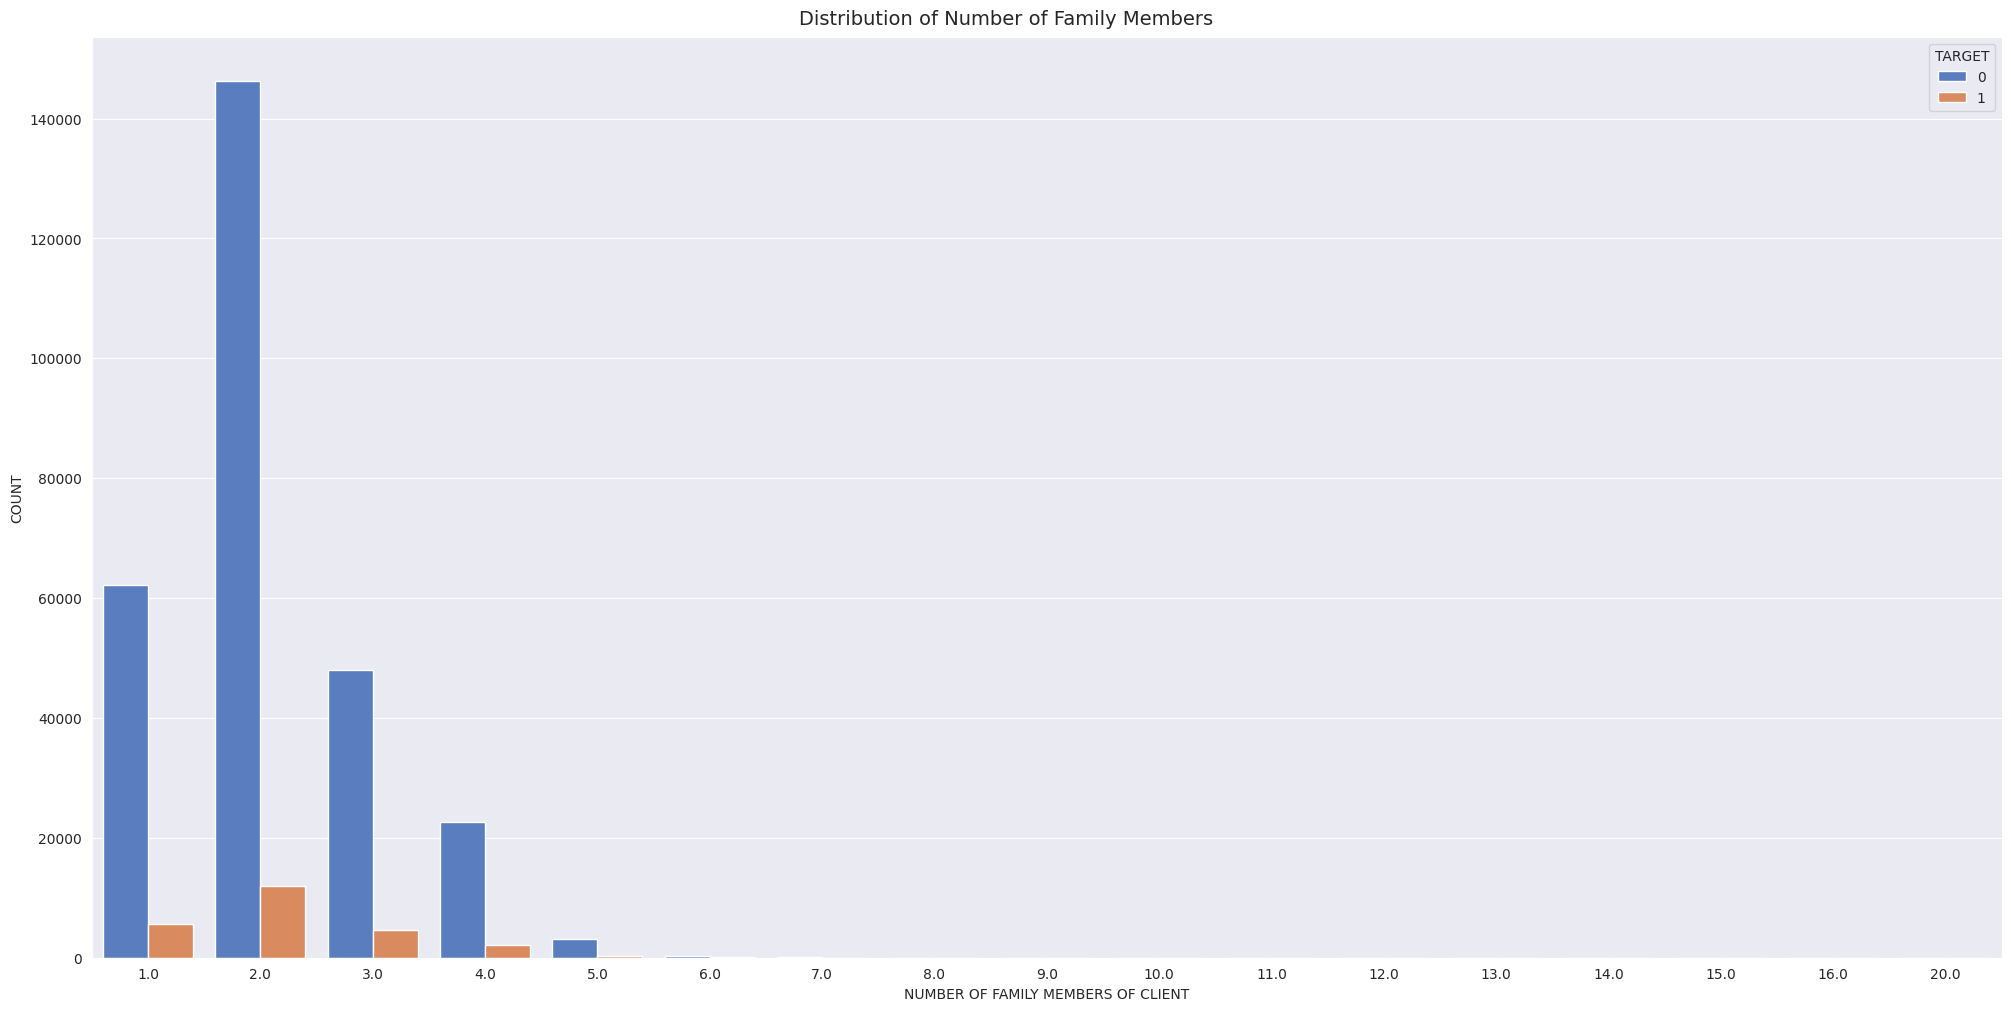

In [ ]:
fig,axes =  plt.subplots(figsize=(20,10),constrained_layout=True)
ax = sns.countplot(data=df, x='CNT_FAM_MEMBERS', hue='TARGET', palette='muted')
ax.set_xticklabels(ax.get_xticklabels())
ax.set_xlabel('NUMBER OF FAMILY MEMBERS OF CLIENT')
ax.set_ylabel('COUNT')
sns.set_style('darkgrid')
fig.suptitle('Distribution of Number of Family Members', fontsize=14)
plt.show()

Berdasarkan Plot "CNT_FAM_MEMBERS", dapat diambil kesimpulan bahwa klien dengan anggota keluarga sebanyak 2 memiliki peluang paling besar untuk kesulitan membayar pinjaman karena menunjukkan TARGET-1 yang mencapai 12209.

In [ ]:
table = df.groupby(by=['CNT_FAM_MEMBERS','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan Jumlah Anggota Keluarga')
table.sort_values(by='SK_ID_CURR', ascending=False)

Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan Jumlah Anggota Keluarga


,CNT_FAM_MEMBERS,TARGET,SK_ID_CURR
2,2.0,0,146348
0,1.0,0,62172
4,3.0,0,47993
6,4.0,0,22561
3,2.0,1,12009
1,1.0,1,5675
5,3.0,1,4608
8,5.0,0,3151
7,4.0,1,2136
10,6.0,0,353


####Income type of client
"NAME_INCOME_TYPE" menunjukkan jumlah klien berdasarkan kategori pendapatan yang berbeda. Kategori tersebut di antara lain adalah *working* (bekerja), *commercial associate* (asosiasi komersial), *pensioner* (pensiunan), *state servant* (Pegawai Negeri Sipil), *unemployed* (tidak bekerja), *student* (pelajar), *businessman* (pengusaha), *maternity leave* (cuti hamil).

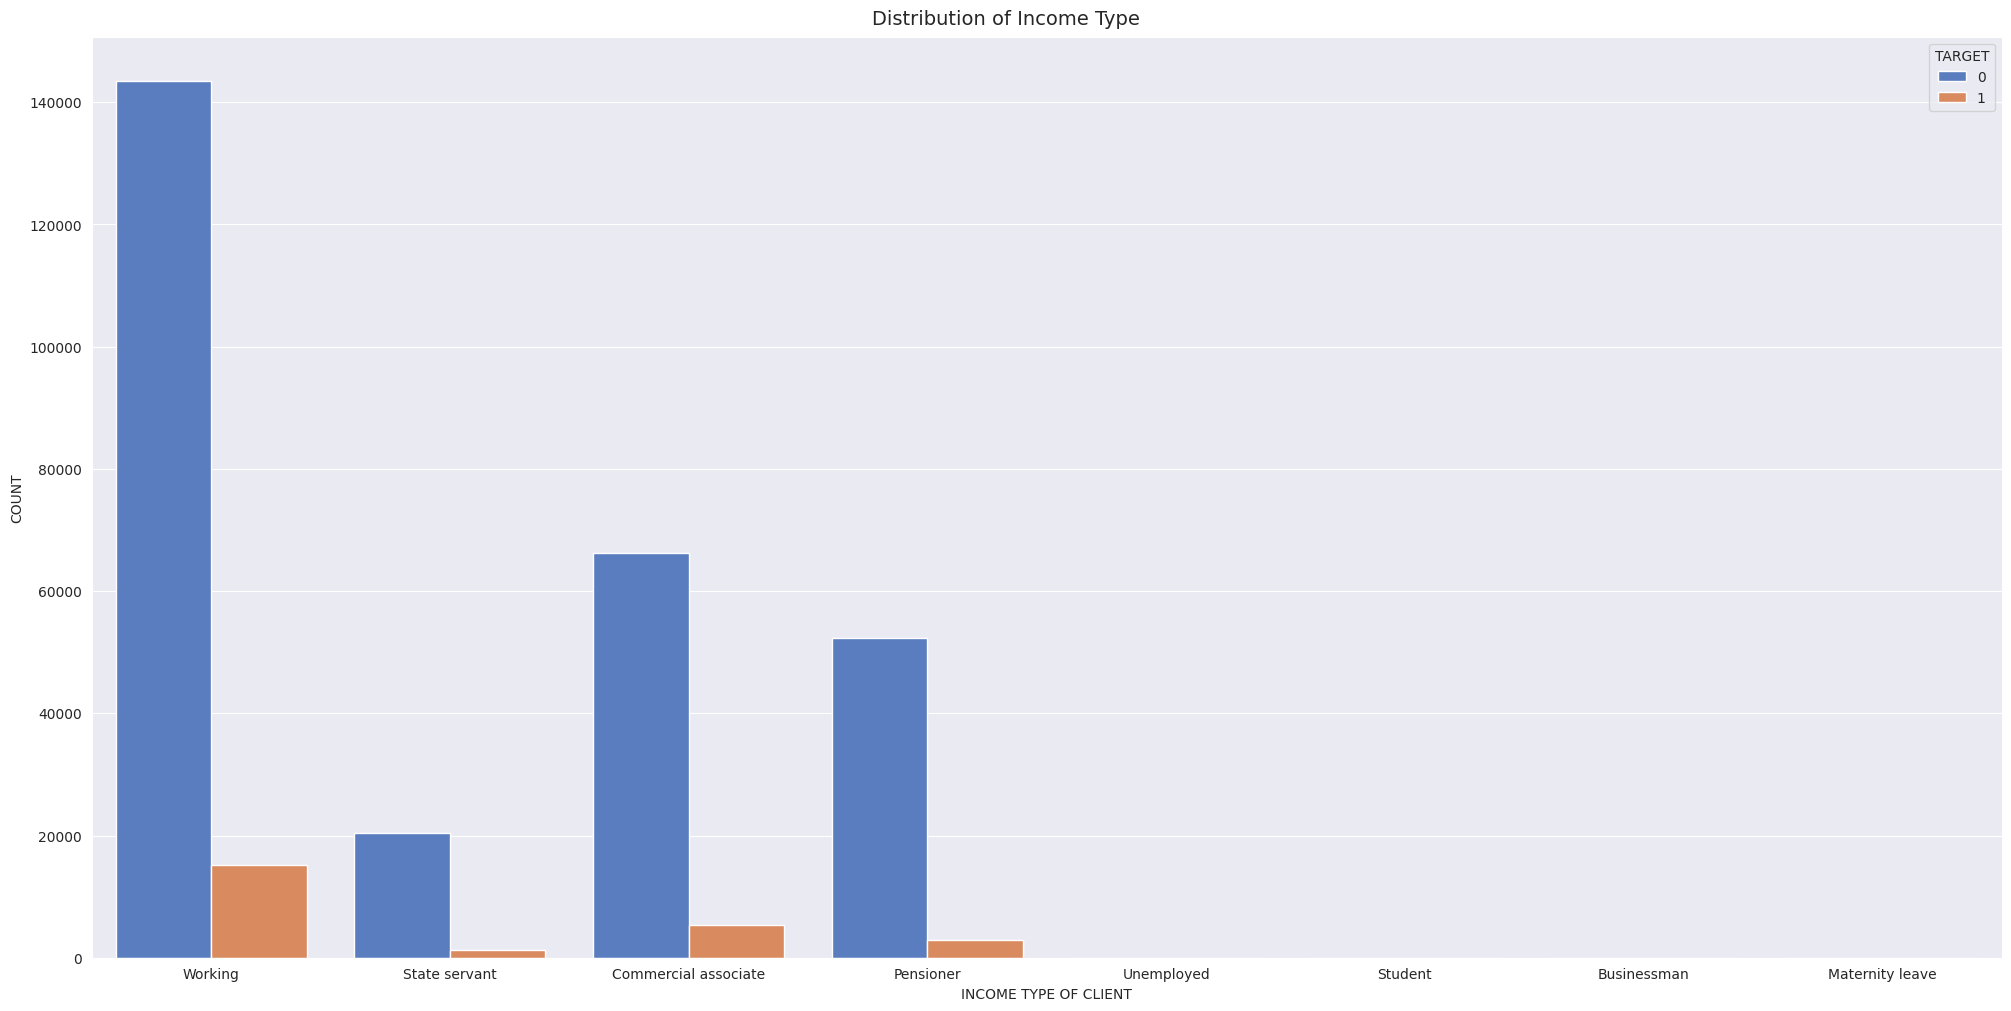

In [ ]:
fig,axes =  plt.subplots(figsize=(20,10),constrained_layout=True)
ax = sns.countplot(data=df, x='NAME_INCOME_TYPE', hue='TARGET', palette='muted')
ax.set_xticklabels(ax.get_xticklabels())
ax.set_xlabel('INCOME TYPE OF CLIENT')
ax.set_ylabel('COUNT')
sns.set_style('darkgrid')
fig.suptitle('Distribution of Income Type', fontsize=14)
plt.show()

In [ ]:
table = df.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan Kategori Pendapatan')
table.sort_values(by='SK_ID_CURR', ascending=False)

Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan Kategori Pendapatan


,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
12,Working,0,143550
1,Commercial associate,0,66255
5,Pensioner,0,52380
7,State servant,0,20454
13,Working,1,15224
2,Commercial associate,1,5360
6,Pensioner,1,2982
8,State servant,1,1249
9,Student,0,18
10,Unemployed,0,14


Berdasarkan Plot "NAME_INCOME_TYPE", dapat diambil kesimpulan bahwa klien yang bekerja memiliki peluang paling besar untuk kesulitan membayar pinjaman karena menunjukkan TARGET-1 yang mencapai 15224.

####Occupation of client
Berikut ini akan ditunjukkan kategori pekerjaan klien yang memengaruhi tingkat kesulitan membayar pinjaman.

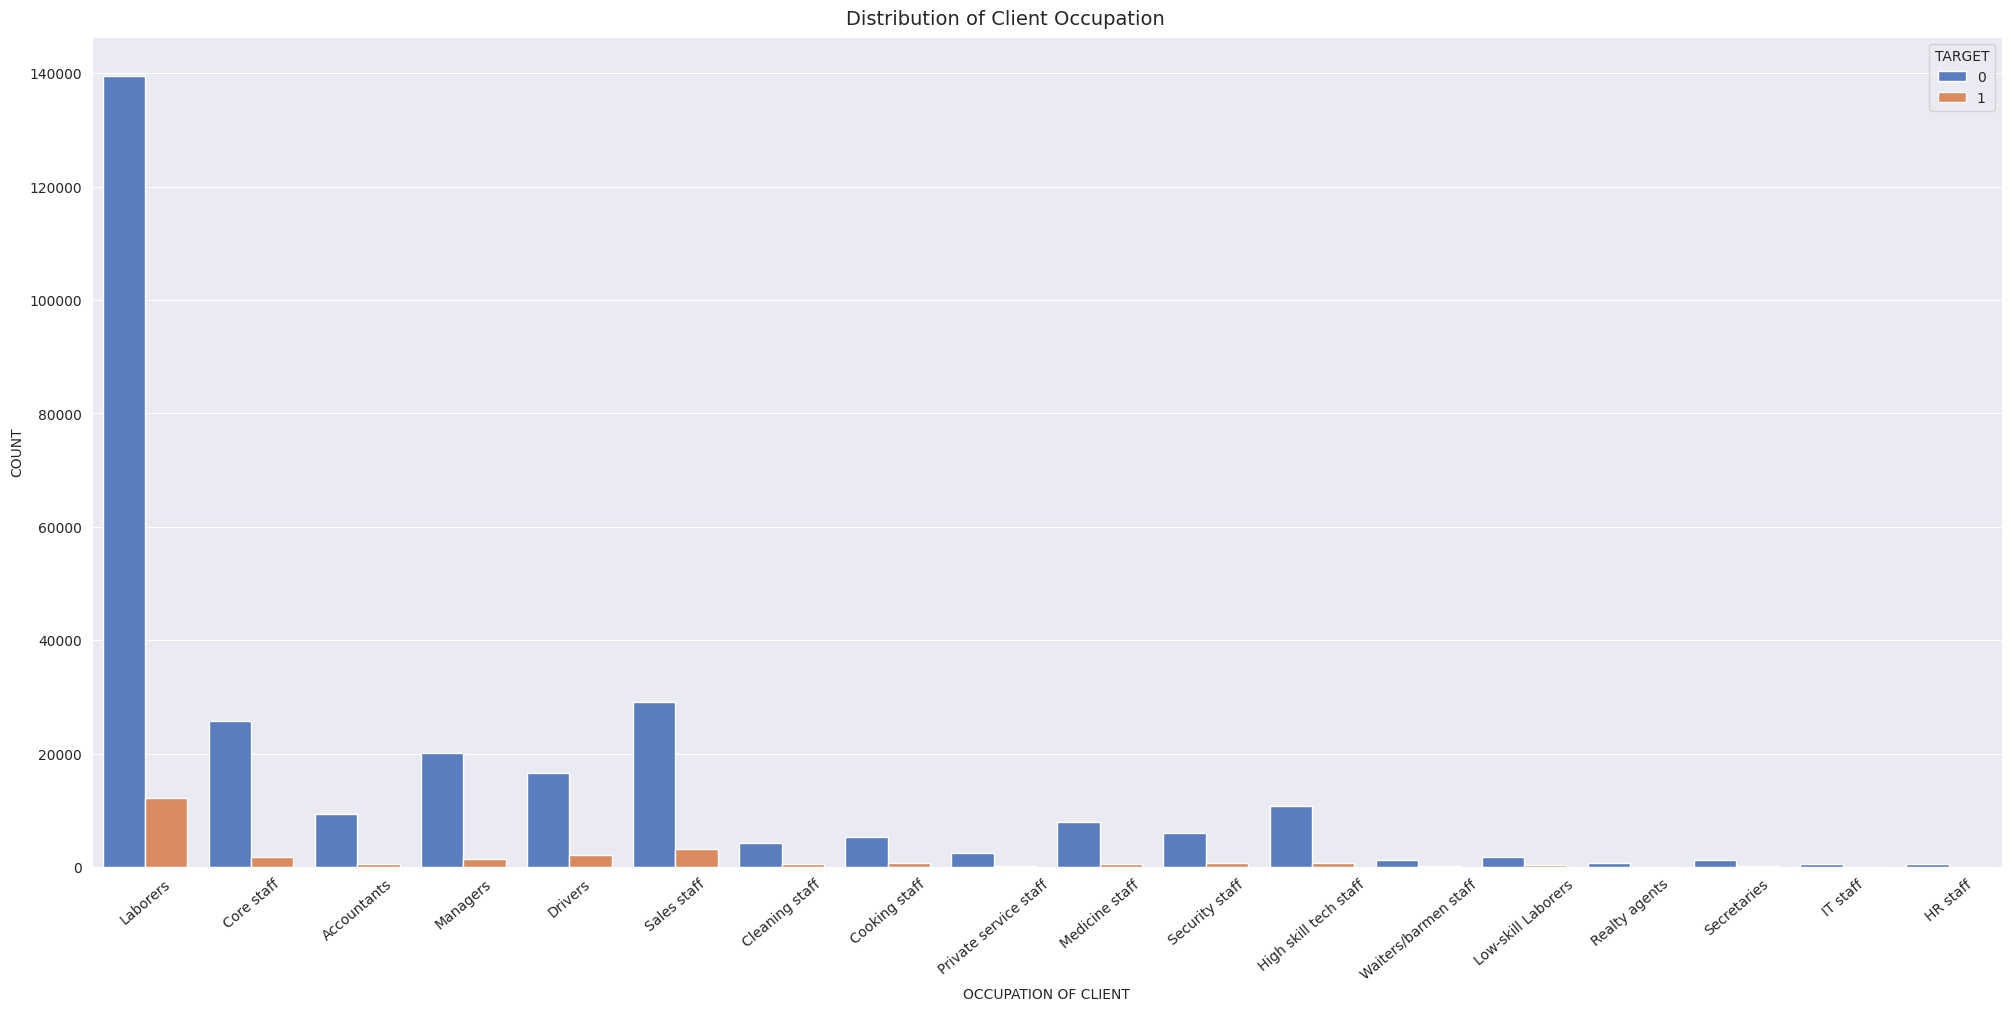

In [ ]:
fig,axes =  plt.subplots(figsize=(20,10),constrained_layout=True)
ax = sns.countplot(data=df, x='OCCUPATION_TYPE', hue='TARGET', palette='muted')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
ax.set_xlabel('OCCUPATION OF CLIENT')
ax.set_ylabel('COUNT')
sns.set_style('darkgrid')
fig.suptitle('Distribution of Client Occupation', fontsize=14)
plt.show()

In [ ]:
table = df.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan Kategori Pekerjaan')
table.sort_values(by='SK_ID_CURR', ascending=False)

Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan Kategori Pekerjaan


,OCCUPATION_TYPE,TARGET,SK_ID_CURR
16,Laborers,0,139461
28,Sales staff,0,29010
6,Core staff,0,25832
20,Managers,0,20042
8,Drivers,0,16496
17,Laborers,1,12116
12,High skill tech staff,0,10679
0,Accountants,0,9338
22,Medicine staff,0,7965
32,Security staff,0,5999


Berdasarkan plot "OCCUPATION_TYPE", dapat diambil kesimpulan bahwa klien yang bekerja sebagai *laborers* atau buruh memiliki peluang paling besar untuk kesulitan membayar pinjaman karena menunjukkan TARGET-1 yang mencapai 12116.

####Organization type
"ORGANIZATION_TYPE" menunjukkan pengaruh kategori organisasi klien terhadap kesulitan membayar pinjaman yang dialami.

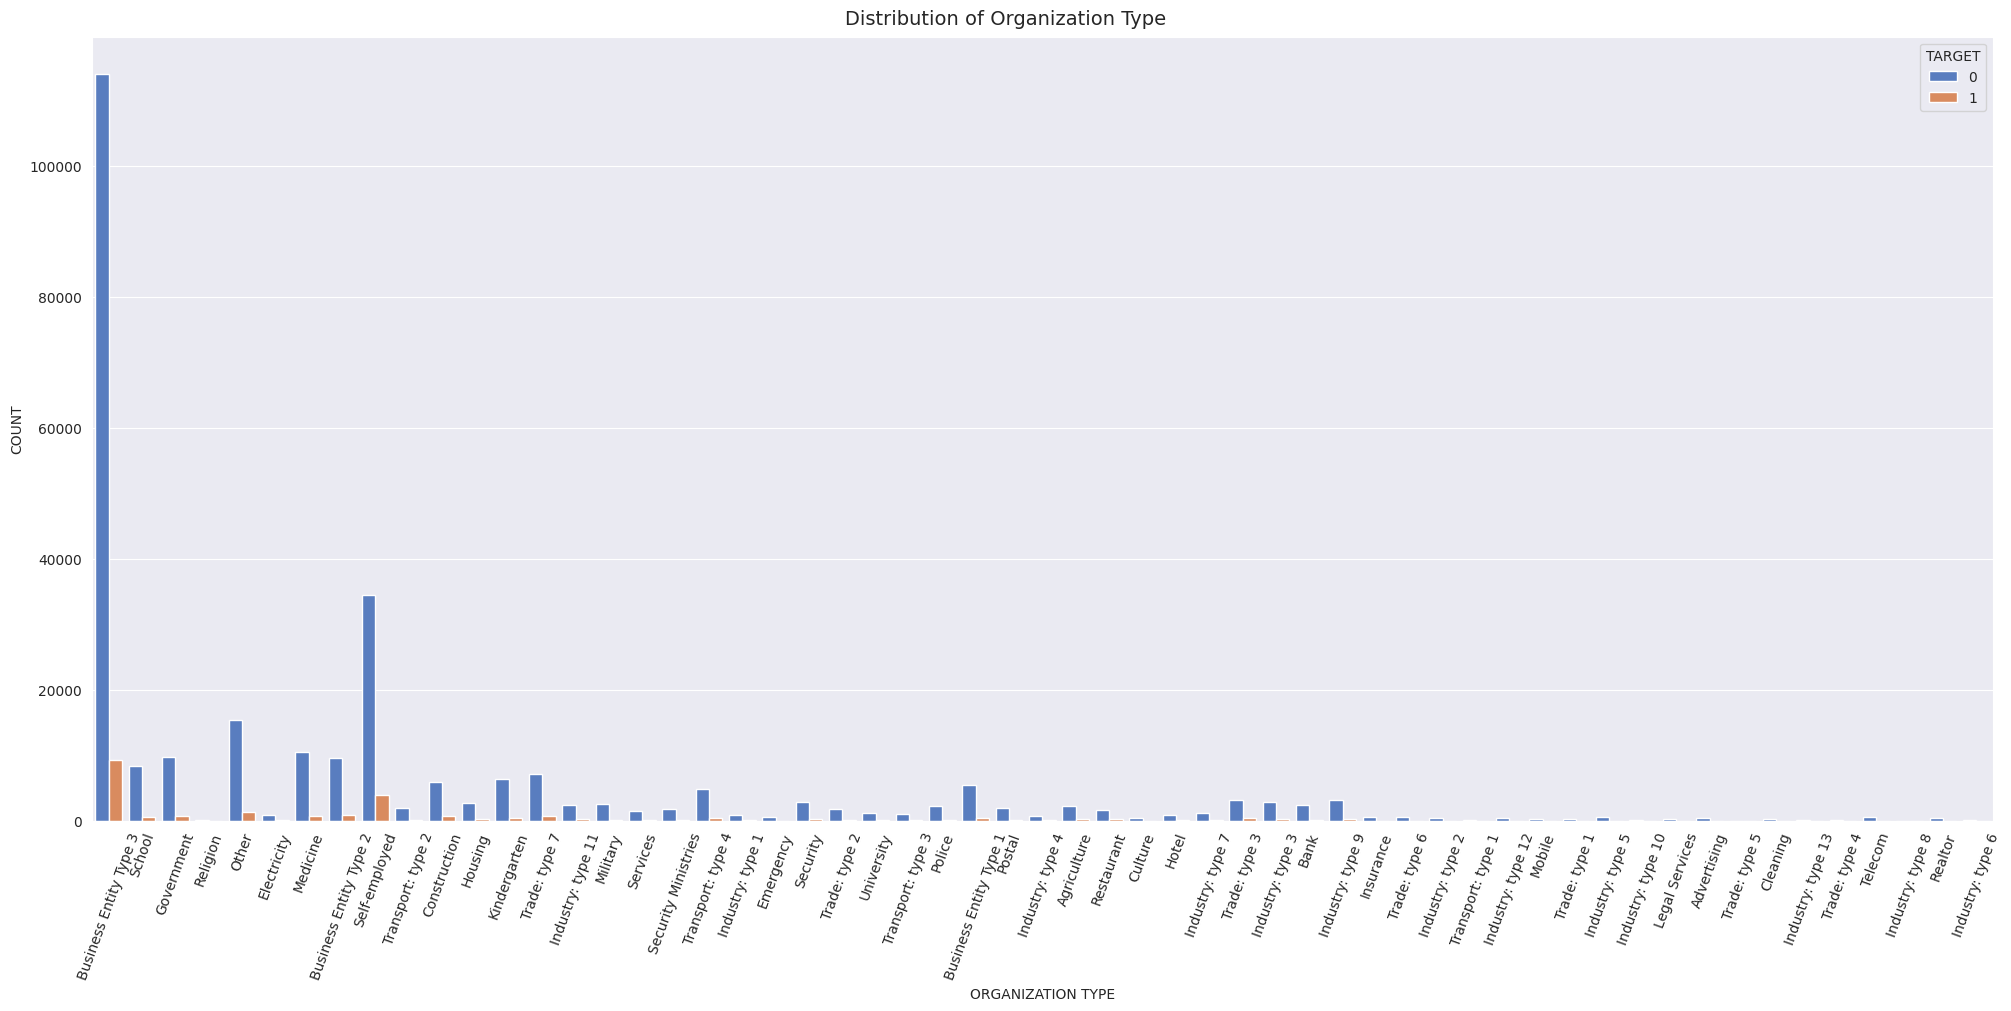

In [ ]:
fig,axes =  plt.subplots(figsize=(20,10),constrained_layout=True)
ax = sns.countplot(data=df, x='ORGANIZATION_TYPE', hue='TARGET', palette='muted')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
ax.set_xlabel('ORGANIZATION TYPE')
ax.set_ylabel('COUNT')
sns.set_style('darkgrid')
fig.suptitle('Distribution of Organization Type', fontsize=14)
plt.show()

In [ ]:
table = df.groupby(by=['ORGANIZATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan Kategori Organisasi')
table.sort_values(by='SK_ID_CURR', ascending=False)

Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan Kategori Organisasi


,ORGANIZATION_TYPE,TARGET,SK_ID_CURR
10,Business Entity Type 3,0,114053
84,Self-employed,0,34504
66,Other,0,15408
60,Medicine,0,10456
22,Government,0,9678
...,...,...,...
31,Industry: type 10,1,7
75,Religion,1,5
99,Trade: type 5,1,3
51,Industry: type 8,1,3


Berdasarkan plot "ORGANIZATION_TYPE", dapat diambil kesimpulan bahwa klien yang bergabung dalam *Business Entity Type 3* memiliki peluang paling besar untuk kesulitan membayar pinjaman karena menunjukkan TARGET-1 yang mencapai 12116.

####Education type of the client
Plot "NAME_EDUCATION_TYPE" menunjukkan seberapa besar pengaruh tiap kategori pendidikan yang ada terhadap kesulitan klien membayar pinjaman.

Text(0.5, 0, 'TARGET 0')

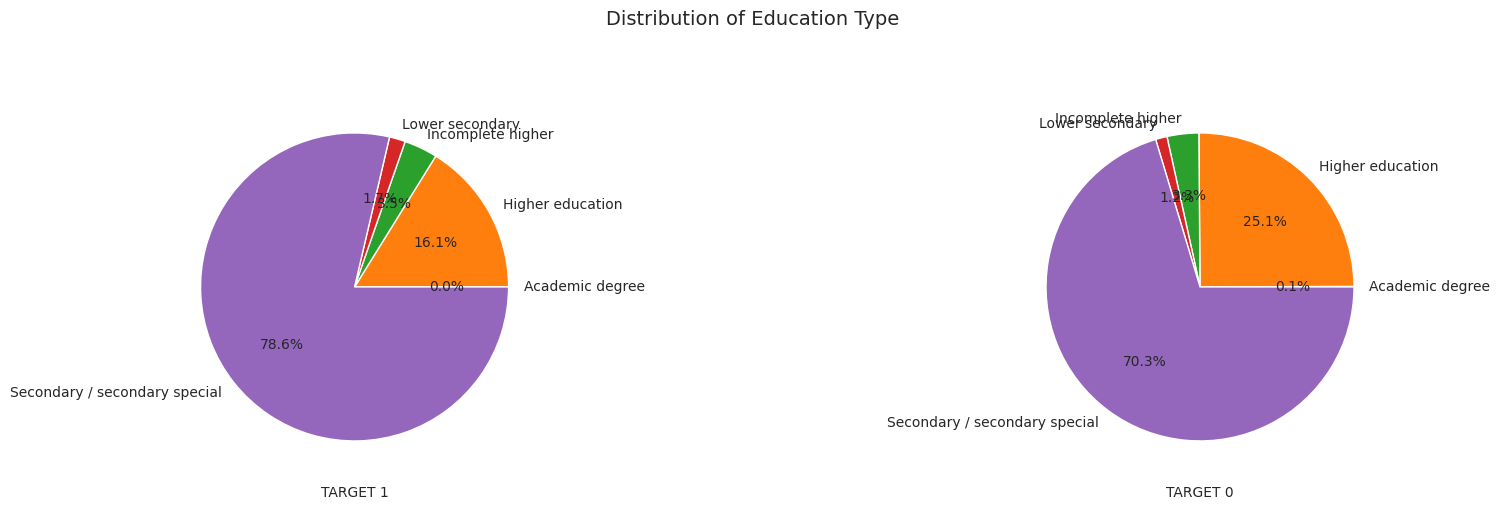

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
df.loc[df["TARGET"]==1, "NAME_EDUCATION_TYPE"].reset_index().groupby("NAME_EDUCATION_TYPE").size().plot(kind="pie", ax=ax1, autopct='%1.1f%%')
df.loc[df["TARGET"]==0, "NAME_EDUCATION_TYPE"].reset_index().groupby("NAME_EDUCATION_TYPE").size().plot(kind="pie", ax=ax2, autopct='%1.1f%%')

fig.suptitle('Distribution of Education Type', fontsize=14, y=1.05)
ax1.set_xlabel("TARGET 1")
ax2.set_xlabel("TARGET 0")


In [ ]:
table = df.groupby(by=['NAME_EDUCATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan Kategori Pendidikan')
table.sort_values(by='SK_ID_CURR', ascending=False)

Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan Kategori Pendidikan


,NAME_EDUCATION_TYPE,TARGET,SK_ID_CURR
8,Secondary / secondary special,0,198867
2,Higher education,0,70853
9,Secondary / secondary special,1,19524
4,Incomplete higher,0,9405
3,Higher education,1,4009
6,Lower secondary,0,3398
5,Incomplete higher,1,872
7,Lower secondary,1,417
0,Academic degree,0,161
1,Academic degree,1,3


Berdasarkan plot "NAME_EDUCATION_TYPE", tiap kategori menunjukkan jumlah TARGET 0 yang lebih besar daripada TARGET 1. Itu artinya, masing-masing dari kategori pendidikan klien memiliki kemungkinan yang lebih besar untuk klien tidak kesulitan membayar pinjaman. Namun, TARGET 1 dari keseluruhan kategori pendidikan menunjukkan bahwa *secondary/secondary special* adalah kategori yang memiliki peluang lebih besar dalam kesuliitan membayar pinjaman dibanding kategori yang lain karena jumlah TARGET 1-nya yang mencapai 19524 atau 78.6%.

####Type of the housing of client
Berikut merupakan plot dari "NAME_HOUSING_TYPE" yang menunjukkan jumlah klien berdasarkan kategori tempat tinggal.

Text(0.5, 0, 'TARGET 0')

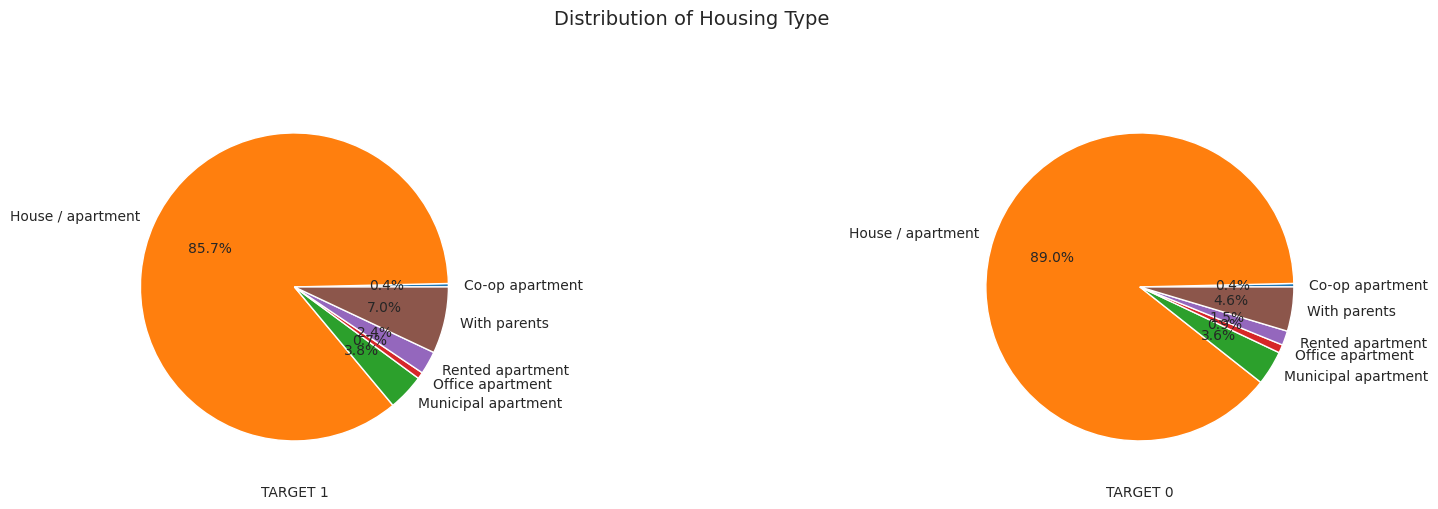

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
df.loc[df["TARGET"]==1, "NAME_HOUSING_TYPE"].reset_index().groupby("NAME_HOUSING_TYPE").size().plot(kind="pie", ax=ax1, autopct='%1.1f%%')
df.loc[df["TARGET"]==0, "NAME_HOUSING_TYPE"].reset_index().groupby("NAME_HOUSING_TYPE").size().plot(kind="pie", ax=ax2, autopct='%1.1f%%')

fig.suptitle('Distribution of Housing Type', fontsize=14, y=1.05)
ax1.set_xlabel("TARGET 1")
ax2.set_xlabel("TARGET 0")


In [ ]:
table = df.groupby(by=['NAME_HOUSING_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan Kategori Tempat Tinggal')
table.sort_values(by='SK_ID_CURR', ascending=False)

Tingkat Kemampuan Klien Membayar Pinjaman Berdasarkan Kategori Tempat Tinggal


,NAME_HOUSING_TYPE,TARGET,SK_ID_CURR
2,House / apartment,0,251595
3,House / apartment,1,21272
10,With parents,0,13104
4,Municipal apartment,0,10227
8,Rented apartment,0,4280
6,Office apartment,0,2445
11,With parents,1,1736
0,Co-op apartment,0,1033
5,Municipal apartment,1,955
9,Rented apartment,1,601


Berdasarkan plot "NAME_HOUSING_TYPE", tiap kategori menunjukkan jumlah TARGET 0 yang lebih besar daripada TARGET 1. Itu artinya, masing-masing dari kategori tempat tinggal klien memiliki kemungkinan yang lebih besar untuk klien tidak kesulitan membayar pinjaman. Namun, TARGET 1 dari keseluruhan kategori tempat tinggal menunjukkan bahwa *house/apartment* adalah kategori yang memiliki peluang paling besar dalam kesulitan membayar pinjaman dibanding kategori yang lain karena jumlah TARGET 1-nya yang mencapai 21272 atau 85.7%.

#### Total Income Distribution

Selanjutnya kita akan melihat distribusi total pendapatan dari peminjam.

In [ ]:
# menghitung nilai minimum (nilai terkecil) dan nilai maksimum (nilai terbesar) dari kolom 'AMT_INCOME_TOTAL' dalam DataFrame yang disimpan dalam variabel df.
df['AMT_INCOME_TOTAL'].min(),df['AMT_INCOME_TOTAL'].max()

(25650.0, 117000000.0)

Pada output diatas dapat dilihat jika nilai minimun (nilai terkecil) dalam kolom AMT_INCOME_TOTAL yaitu sebesar 25650 dan nilai maksimum (nilai terbesar) yaitu 117000000.  Ini berarti rentang penghasilan total dalam data tersebut berkisar antara 25.650 hingga 117.000.000.

In [ ]:
# Informasi pendapatan total ke dalam dataframe terpisah
income_data = df[['TARGET', 'AMT_INCOME_TOTAL']]

# Kelompokkan data pendapatan total
income_data['INCOME_BINNED'] = pd.cut(income_data['AMT_INCOME_TOTAL'], bins=np.linspace(25000, 1000000, num = 11))
income_data.head(10)

,TARGET,AMT_INCOME_TOTAL,INCOME_BINNED
0,1,202500.0,"(122500.0, 220000.0]"
1,0,270000.0,"(220000.0, 317500.0]"
2,0,67500.0,"(25000.0, 122500.0]"
3,0,135000.0,"(122500.0, 220000.0]"
4,0,121500.0,"(25000.0, 122500.0]"
5,0,99000.0,"(25000.0, 122500.0]"
6,0,171000.0,"(122500.0, 220000.0]"
7,0,360000.0,"(317500.0, 415000.0]"
8,0,112500.0,"(25000.0, 122500.0]"
9,0,135000.0,"(122500.0, 220000.0]"


In [ ]:
# Kelompokkan berdasarkan rentang pendapatan dan hitung rata-rata
income_group  = income_data.groupby('INCOME_BINNED').mean()
income_group

,TARGET,AMT_INCOME_TOTAL
INCOME_BINNED,,
"(25000.0, 122500.0]",0.084434,92096.574706
"(122500.0, 220000.0]",0.084057,162100.028766
"(220000.0, 317500.0]",0.071433,254943.268461
"(317500.0, 415000.0]",0.060689,365426.937128
"(415000.0, 512500.0]",0.057778,450638.102500
"(512500.0, 610000.0]",0.061828,549651.068548
"(610000.0, 707500.0]",0.049645,667348.000000
"(707500.0, 805000.0]",0.019108,741996.716561
"(805000.0, 902500.0]",0.056856,867940.871237


Text(0.5, 1.0, 'Grafik Gagal Bayar Berdasarkan Pengelompokan Pendapatan')

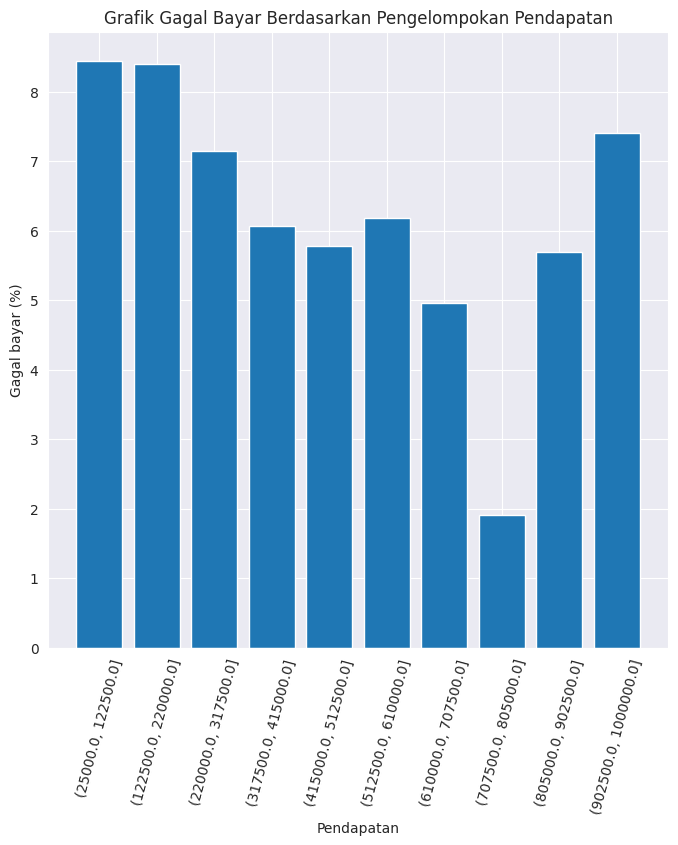

In [ ]:
plt.figure(figsize = (8, 8))

# Buat grafik pendapatan peminjam dan rata-rata target sebagai plot batang
plt.bar(income_group.index.astype(str), 100 * income_group['TARGET'])

# Pelabelan Plot
plt.xticks(rotation = 75); plt.xlabel('Pendapatan'); plt.ylabel('Gagal bayar (%)')
plt.title('Grafik Gagal Bayar Berdasarkan Pengelompokan Pendapatan')

Grafik menunjukkan bahwa tingkat gagal bayar (dalam persentase) cenderung bervariasi berdasarkan pengelompokan pendapatan pelanggan.

Kelompok dengan pendapatan lebih rendah, seperti rentang pendapatan (25,000.0, 122,500.0), menunjukkan tingkat gagal bayar sekitar 8.44%. Hal ini menunjukkan bahwa pelanggan dengan pendapatan lebih rendah cenderung memiliki risiko gagal bayar yang lebih tinggi.

Kelompok dengan pendapatan lebih tinggi, seperti rentang pendapatan (707,500.0, 805,000.0), menunjukkan tingkat gagal bayar sekitar 1.91%. Hal ini menunjukkan bahwa pelanggan dengan pendapatan lebih tinggi cenderung memiliki risiko gagal bayar yang lebih rendah.

Terdapat kecenderungan umum bahwa semakin tinggi pendapatan pelanggan, semakin rendah tingkat gagal bayarnya. Namun, terdapat pengecualian pada beberapa kelompok, seperti rentang pendapatan (805,000.0, 902,500.0), yang menunjukkan tingkat gagal bayar yang sedikit lebih tinggi.

Dalam kesimpulan, pendapatan pelanggan memiliki pengaruh yang signifikan terhadap tingkat gagal bayar. Semakin tinggi pendapatan, semakin rendah risiko gagal bayar.

#### Credit Distribution

Selanjutnya kita akan melakukan grafik pada kolom "AMT_CREDIT" yang berisi informasi mengenai jumlah total kredit yang diberikan pada peminjam.

> Indented block



In [ ]:
# menghitung nilai minimum (nilai terkecil) dan nilai maksimum (nilai terbesar) dari kolom 'AMT_CREDIT' dalam DataFrame yang disimpan dalam variabel df.
df['AMT_CREDIT'].min(),df['AMT_CREDIT'].max()

(45000.0, 4050000.0)

In [ ]:
credit_data = df[['TARGET', 'AMT_CREDIT']]

# Kelompokkan data AMT_CREDIT
credit_data['AMT_CREDIT_BINNED'] = pd.cut(credit_data['AMT_CREDIT'], bins = np.linspace(45000, 4100000, num = 11))

credit_data.head(10)

,TARGET,AMT_CREDIT,AMT_CREDIT_BINNED
0,1,406597.5,"(45000.0, 450500.0]"
1,0,1293502.5,"(1261500.0, 1667000.0]"
2,0,135000.0,"(45000.0, 450500.0]"
3,0,312682.5,"(45000.0, 450500.0]"
4,0,513000.0,"(450500.0, 856000.0]"
5,0,490495.5,"(450500.0, 856000.0]"
6,0,1560726.0,"(1261500.0, 1667000.0]"
7,0,1530000.0,"(1261500.0, 1667000.0]"
8,0,1019610.0,"(856000.0, 1261500.0]"
9,0,405000.0,"(45000.0, 450500.0]"


In [ ]:
# Kelompokkan berdasarkan rentang kredit dan hitung rata-rata
credit_group  = credit_data.groupby('AMT_CREDIT_BINNED').mean()
credit_group

,TARGET,AMT_CREDIT
AMT_CREDIT_BINNED,,
"(45000.0, 450500.0]",0.084649,2.663453e+05
"(450500.0, 856000.0]",0.088706,6.343362e+05
"(856000.0, 1261500.0]",0.065627,1.034145e+06
"(1261500.0, 1667000.0]",0.055024,1.403457e+06
"(1667000.0, 2072500.0]",0.046412,1.836183e+06
"(2072500.0, 2478000.0]",0.024715,2.235152e+06
"(2478000.0, 2883500.0]",0.034375,2.562745e+06
"(2883500.0, 3289000.0]",0.086957,3.035340e+06
"(3289000.0, 3694500.0]",0.000000,3.413981e+06


Text(0.5, 1.0, 'Grafik Gagal Bayar Berdasarkan Pengelompokkan Kredit')

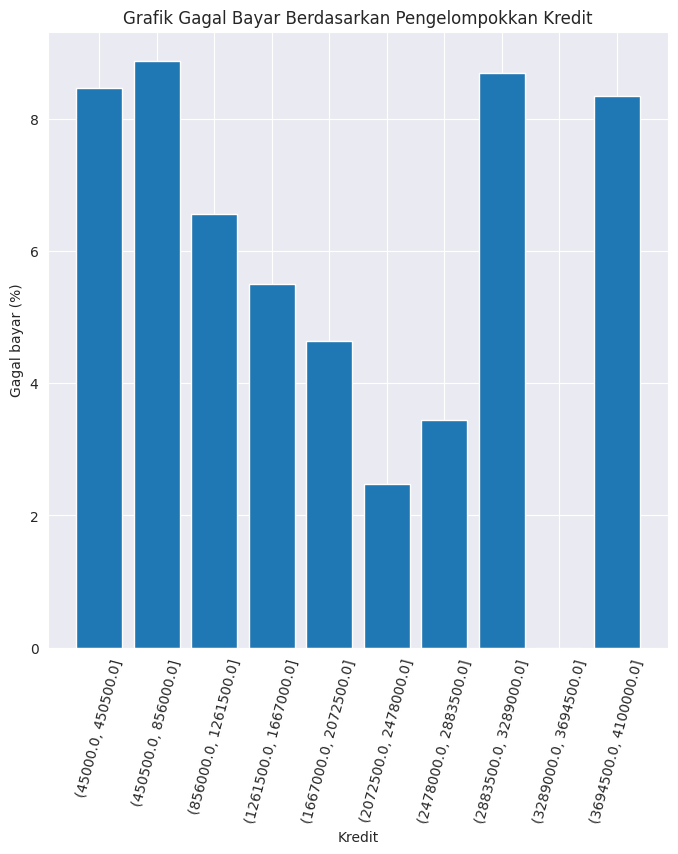

In [ ]:
plt.figure(figsize = (8, 8))

# Buat grafik kredit peminjam dan rata-rata target sebagai plot batang
plt.bar(credit_group.index.astype(str), 100 * credit_group['TARGET'])

# Pelabelan Plot
plt.xticks(rotation = 75); plt.xlabel('Kredit'); plt.ylabel('Gagal bayar (%)')
plt.title('Grafik Gagal Bayar Berdasarkan Pengelompokkan Kredit')

Kelompok kredit dengan rentang (45000.0, 450500.0) memiliki persentase gagal bayar sekitar 8.46%, sedangkan kelompok kredit dengan rentang (450500.0, 856000.0) memiliki persentase gagal bayar sekitar 8.87%.

Secara umum, persentase gagal bayar cenderung menurun seiring dengan peningkatan jumlah kredit. Kelompok kredit dengan rentang (3694500.0, 4100000.0) memiliki persentase gagal bayar sekitar 8.33%, sedangkan kelompok kredit dengan rentang (2072500.0, 2478000.0) memiliki persentase gagal bayar sekitar 2.47%.

Terdapat satu kelompok kredit dengan rentang (3289000.0, 3694500.0) yang memiliki persentase gagal bayar sebesar 0%. Ini berarti tidak ada kejadian gagal bayar dalam kelompok kredit tersebut.

#### Annuity Distribution

Selanjutnya merupakan grafik dari kolom "AMT_ANNUITY" yang berisi informasi mengenai jumlah angsuran tahunan yang harus dibayar oleh peminjam untuk pinjaman yang dilakukan.

In [ ]:
# menghitung nilai minimum (nilai terkecil) dan nilai maksimum (nilai terbesar) dari kolom 'AMT_ANNUITY' dalam DataFrame yang disimpan dalam variabel df.
df['AMT_ANNUITY'].min(),df['AMT_ANNUITY'].max()

(1615.5, 258025.5)

In [ ]:
annuity_data = df[['TARGET', 'AMT_ANNUITY']]

# Kelompokkan data AMT_ANNUITY
annuity_data['AMT_ANNUITY_BINNED'] = pd.cut(annuity_data['AMT_ANNUITY'], bins = np.linspace(1600, 259000, num = 10))

annuity_data.head(10)

,TARGET,AMT_ANNUITY,AMT_ANNUITY_BINNED
0,1,24700.5,"(1600.0, 30200.0]"
1,0,35698.5,"(30200.0, 58800.0]"
2,0,6750.0,"(1600.0, 30200.0]"
3,0,29686.5,"(1600.0, 30200.0]"
4,0,21865.5,"(1600.0, 30200.0]"
5,0,27517.5,"(1600.0, 30200.0]"
6,0,41301.0,"(30200.0, 58800.0]"
7,0,42075.0,"(30200.0, 58800.0]"
8,0,33826.5,"(30200.0, 58800.0]"
9,0,20250.0,"(1600.0, 30200.0]"


In [ ]:
# Kelompokkan berdasarkan rentang angsuran dan hitung rata-rata
annuity_group  = annuity_data.groupby('AMT_ANNUITY_BINNED').mean()
annuity_group

,TARGET,AMT_ANNUITY
AMT_ANNUITY_BINNED,,
"(1600.0, 30200.0]",0.082185,18878.980378
"(30200.0, 58800.0]",0.081123,39832.041921
"(58800.0, 87400.0]",0.047131,66972.765846
"(87400.0, 116000.0]",0.026437,97831.779310
"(116000.0, 144600.0]",0.014599,126411.043796
"(144600.0, 173200.0]",0.035714,153360.642857
"(173200.0, 201800.0]",0.000000,178010.470588
"(201800.0, 230400.0]",0.000000,221277.728571
"(230400.0, 259000.0]",0.000000,258025.500000


Text(0.5, 1.0, 'Grafik Gagal Bayar Berdasarkan Pengelompokkan Angsuran')

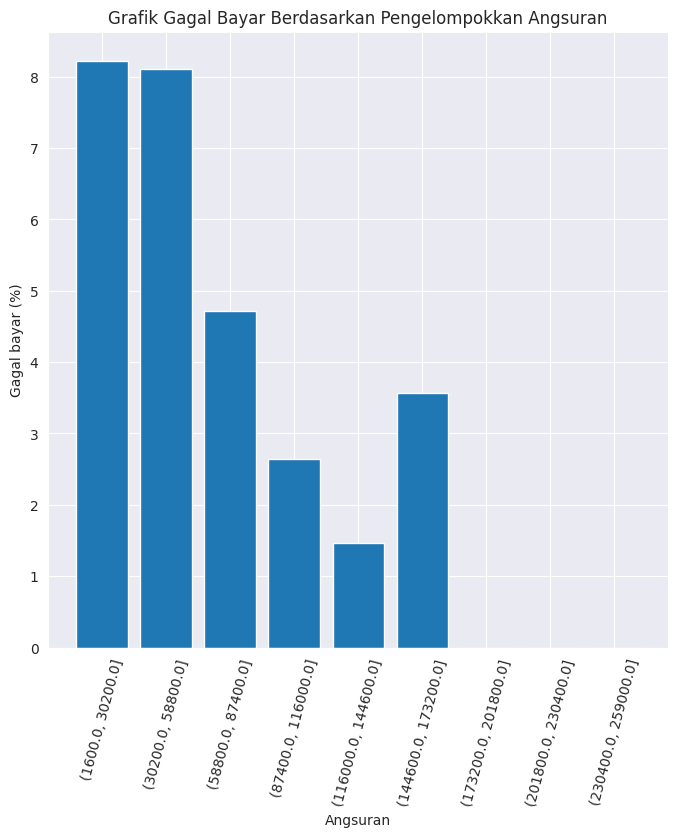

In [ ]:
plt.figure(figsize = (8, 8))

# Buat grafik angsuran peminjam dan rata-rata target sebagai plot batang
plt.bar(annuity_group.index.astype(str), 100 * annuity_group['TARGET'])

# Pelabelan Plot
plt.xticks(rotation = 75); plt.xlabel('Angsuran'); plt.ylabel('Gagal bayar (%)')
plt.title('Grafik Gagal Bayar Berdasarkan Pengelompokkan Angsuran')

Tingkat gagal bayar cenderung meningkat seiring dengan peningkatan jumlah angsuran yang harus dibayarkan. Pada kelompok angsuran yang lebih rendah (dalam rentang 1600 - 30.200), tingkat gagal bayar sekitar 8.22%. Hal tersebut menunjukkan bahwa pada kelompok angsuran dengan jumlah yang lebih rendah, terdapat tingkat gagal bayar yang relatif tinggi. Hal ini menunjukkan adanya potensi risiko pembayaran yang lebih tinggi bagi peminjam dengan jumlah angsuran yang lebih kecil.

Rata-rata jumlah angsuran yang harus dibayarkan juga meningkat seiring dengan kelompok angsuran yang lebih tinggi. Pada kelompok angsuran yang lebih rendah, rata-rata jumlah angsuran sekitar 18.878,90, sedangkan pada kelompok angsuran yang lebih tinggi, rata-rata jumlah angsuran meningkat menjadi 258.025,50.

Terdapat kelompok angsuran tertentu di mana tidak ada kasus gagal bayar yang terjadi (tingkat gagal bayar 0%). Misalnya, pada kelompok angsuran dalam rentang 173.200 - 201.800.

#### Goods Price Distribution

Selanjutnya merupakan grafik dari kolom "AMT_GOODS_PRICE" yang berisi informasi tentang harga barang yang dibeli oleh peminjam menggunakan uang pinjaman. Harga barang ini dapat merujuk pada harga properti jika peminjam menggunakan pinjaman untuk membeli rumah atau apartemen, atau dapat merujuk pada harga barang konsumen lainnya jika pinjaman digunakan untuk membeli barang seperti mobil, peralatan elektronik, atau furnitur.

In [ ]:
# menghitung nilai minimum (nilai terkecil) dan nilai maksimum (nilai terbesar) dari kolom 'AMT_GOODS_PRICE' dalam DataFrame yang disimpan dalam variabel df.
df['AMT_GOODS_PRICE'].min(),df['AMT_GOODS_PRICE'].max()

(40500.0, 4050000.0)

In [ ]:
goodprice_data = df[['TARGET', 'AMT_GOODS_PRICE']]

# Kelompokkan data AMT_GOODS_PRICE
goodprice_data['AMT_GOODS_PRICE_BINNED'] = pd.cut(goodprice_data['AMT_GOODS_PRICE'], bins = np.linspace(40000, 4100000, num = 11))

goodprice_data.head(10)

,TARGET,AMT_GOODS_PRICE,AMT_GOODS_PRICE_BINNED
0,1,351000.0,"(40000.0, 446000.0]"
1,0,1129500.0,"(852000.0, 1258000.0]"
2,0,135000.0,"(40000.0, 446000.0]"
3,0,297000.0,"(40000.0, 446000.0]"
4,0,513000.0,"(446000.0, 852000.0]"
5,0,454500.0,"(446000.0, 852000.0]"
6,0,1395000.0,"(1258000.0, 1664000.0]"
7,0,1530000.0,"(1258000.0, 1664000.0]"
8,0,913500.0,"(852000.0, 1258000.0]"
9,0,405000.0,"(40000.0, 446000.0]"


In [ ]:
# Kelompokkan berdasarkan rentang harga barang dan hitung rata-rata
goodprice_group  = goodprice_data.groupby('AMT_GOODS_PRICE_BINNED').mean()
goodprice_group

,TARGET,AMT_GOODS_PRICE
AMT_GOODS_PRICE_BINNED,,
"(40000.0, 446000.0]",0.085834,2.333539e+05
"(446000.0, 852000.0]",0.087334,5.737067e+05
"(852000.0, 1258000.0]",0.061795,9.935089e+05
"(1258000.0, 1664000.0]",0.045256,1.399942e+06
"(1664000.0, 2070000.0]",0.042506,1.809290e+06
"(2070000.0, 2476000.0]",0.023052,2.243444e+06
"(2476000.0, 2882000.0]",0.050000,2.687400e+06
"(2882000.0, 3288000.0]",0.058824,3.080647e+06
"(3288000.0, 3694000.0]",0.125000,3.481875e+06


Text(0.5, 1.0, 'Grafik Gagal Bayar Berdasarkan Pengelompokkan Harga Barang')

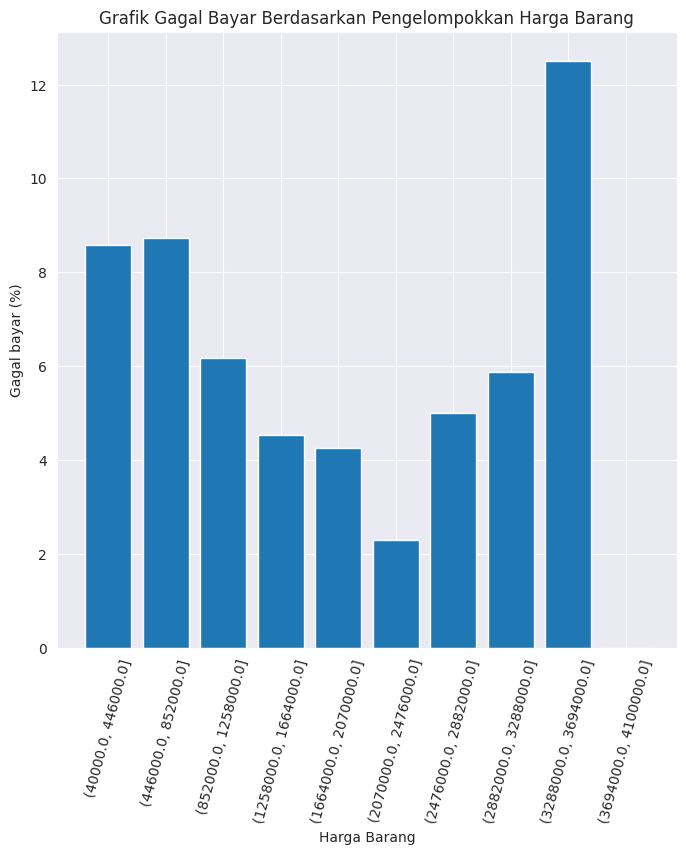

In [ ]:
plt.figure(figsize = (8, 8))

# Buat grafik harga barang yang dibeli peminjam dan rata-rata target sebagai plot batang
plt.bar(goodprice_group.index.astype(str), 100 * goodprice_group['TARGET'])

# Pelabelan Plot
plt.xticks(rotation = 75); plt.xlabel('Harga Barang'); plt.ylabel('Gagal bayar (%)')
plt.title('Grafik Gagal Bayar Berdasarkan Pengelompokkan Harga Barang')

Kelompok harga barang dengan rentang (40000.0, 446000.0) memiliki persentase gagal bayar sebesar 8.58%.
Terdapat tren menurun dalam persentase gagal bayar seiring dengan peningkatan harga barang. Kelompok harga barang yang lebih tinggi cenderung memiliki persentase gagal bayar yang lebih rendah.
Kelompok harga barang dengan rentang (3694000.0, 4100000.0) memiliki persentase gagal bayar sebesar 0%, yang berarti tidak ada peminjam dalam kelompok ini yang mengalami gagal bayar.
Pada umumnya, semakin tinggi harga barang yang dibeli oleh peminjam, semakin rendah persentase gagal bayar.

#### Days from Birth Distribution

Berikutnya yaitu distribusi plot terhadap kolom "DAYS_BIRTH" yang berisi informasi mengenai  jumlah hari antara tanggal pengajuan aplikasi pinjaman dan tanggal lahir peminjam. Nilai dalam kolom ini biasanya diungkapkan dalam bentuk bilangan bulat negatif, yang mengindikasikan jumlah hari sejak tanggal lahir hingga saat pengajuan aplikasi.

Contoh penjelasan kolom "DAYS_BIRTH":

* Jika nilai dalam kolom "DAYS_BIRTH" adalah -10000, itu berarti peminjam lahir 10.000 hari sebelum pengajuan aplikasi pinjaman.

* Jika nilai dalam kolom "DAYS_BIRTH" adalah -15000, itu berarti peminjam lahir 15.000 hari sebelum pengajuan aplikasi pinjaman.

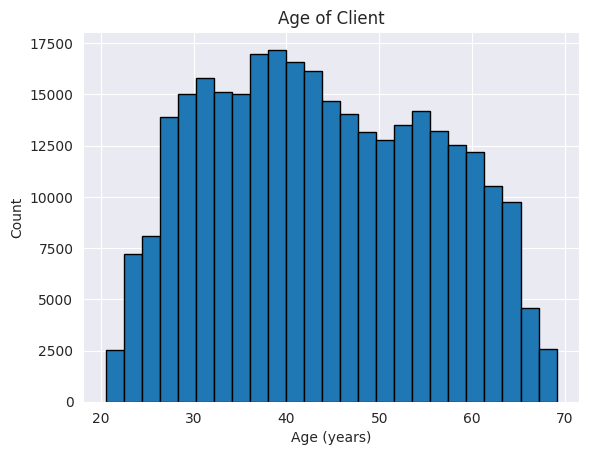

In [ ]:
# Mari menggali usia
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])

# Plot distribusi usia dalam tahun
plt.hist(df['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

Tidak ada outlier karena semua usia masuk akal. mari kita visualisasikan efek umur pada target, selanjutnya kita akan membuat plot estimasi densitas kernel (KDE) yang diwarnai dengan nilai target.

Text(0.5, 1.0, 'Distribution of Ages')

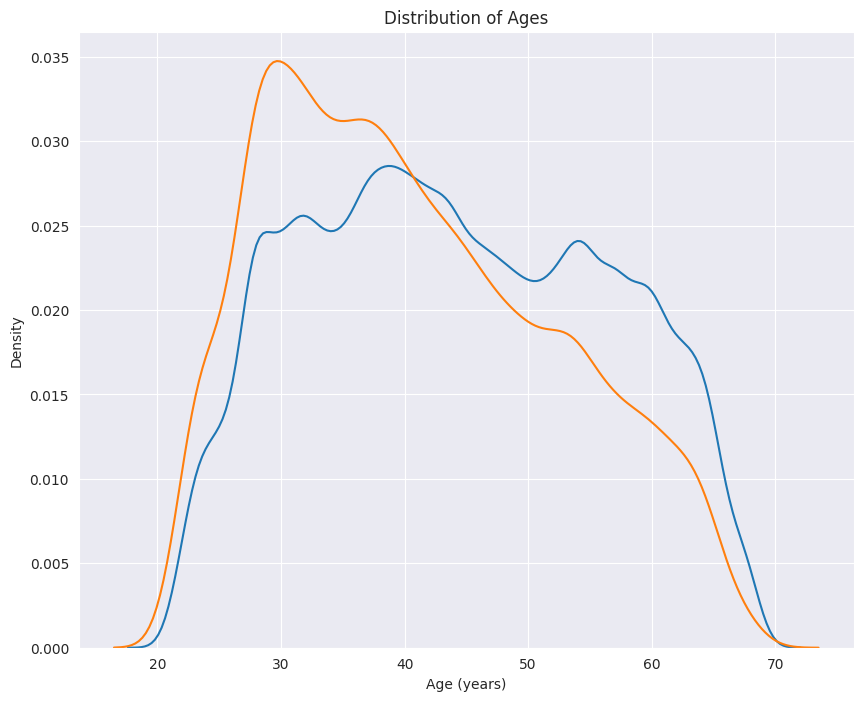

In [ ]:
plt.figure(figsize = (10, 8))

# Petak pinjaman KDE yang dilunasi tepat waktu
sns.kdeplot(df.loc[df['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# Petak pinjaman KDE yang tidak dilunasi tepat waktu
sns.kdeplot(df.loc[df['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Melabeli Plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages')

In [ ]:
# Informasi umur ke dalam dataframe terpisah
age_data = df[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Kelompokkan data umur
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


* Kolom 'TARGET' merupakan variabel target yang menunjukkan apakah peminjam memiliki risiko kredit yang tinggi atau rendah.
* Kolom 'DAYS_BIRTH' merupakan jumlah hari sejak tanggal lahir peminjam.
* Kolom 'YEARS_BIRTH' merupakan usia peminjam dalam tahun, dihitung dengan membagi 'DAYS_BIRTH' dengan 365.
* Kolom 'YEARS_BINNED' merupakan pengelompokan usia peminjam ke dalam beberapa kategori, dengan menggunakan metode pembagian bin (binning). Kategori usia dibuat dengan rentang 5 tahun, mulai dari 20 tahun hingga 70 tahun.

* Pada baris pertama, peminjam memiliki nilai 'TARGET' = 1, artinya mereka memiliki risiko kredit yang tinggi.
* Usia peminjam dihitung dalam tahun ('YEARS_BIRTH'), dan dalam contoh ini peminjam pertama memiliki usia sekitar 25 tahun.
* Usia peminjam kemudian dikategorikan dalam rentang usia ('YEARS_BINNED'). Peminjam pertama termasuk dalam kategori usia antara 25 hingga 30 tahun.

In [ ]:
# Kelompokkan berdasarkan rentang umur dan hitung rata-rata
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102817,11854.834656,32.478999
"(35.0, 40.0]",0.089416,13707.928406,37.555968
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


* Rentang usia (20.0, 25.0): Rata-rata nilai TARGET adalah 0.123036, rata-rata DAYS_BIRTH adalah 8532.795625, dan rata-rata YEARS_BIRTH adalah 23.377522. Ini menunjukkan bahwa peminjam dalam rentang usia ini memiliki probabilitas yang lebih tinggi untuk memiliki nilai TARGET yang positif.

* Rentang usia (25.0, 30.0): Rata-rata nilai TARGET adalah 0.111436, rata-rata DAYS_BIRTH adalah 10155.219250, dan rata-rata YEARS_BIRTH adalah 27.822518. Pada rentang usia ini, masih ada probabilitas yang cukup tinggi untuk memiliki nilai TARGET yang positif.

* Rentang usia (30.0, 35.0): Rata-rata nilai TARGET adalah 0.102814, rata-rata DAYS_BIRTH adalah 11854.848377, dan rata-rata YEARS_BIRTH adalah 32.479037. Pada rentang usia ini, probabilitas untuk memiliki nilai TARGET yang positif mulai menurun secara signifikan.

* Rentang usia (35.0, 40.0): Rata-rata nilai TARGET adalah 0.089414, rata-rata DAYS_BIRTH adalah 13707.908253, dan rata-rata YEARS_BIRTH adalah 37.555913. Pada rentang usia ini, probabilitas untuk memiliki nilai TARGET yang positif semakin menurun.

* Rentang usia (40.0, 45.0) hingga (65.0, 70.0): Pada rentang usia ini, probabilitas untuk memiliki nilai TARGET yang positif semakin menurun secara signifikan. Rentang usia (40.0, 45.0) memiliki rata-rata TARGET sebesar 0.078491, sedangkan rentang usia (65.0, 70.0) memiliki rata-rata TARGET sebesar 0.037270.

Text(0.5, 1.0, 'Grafik Gagal Bayar Berdasarkan Pengelompokkan Umur')

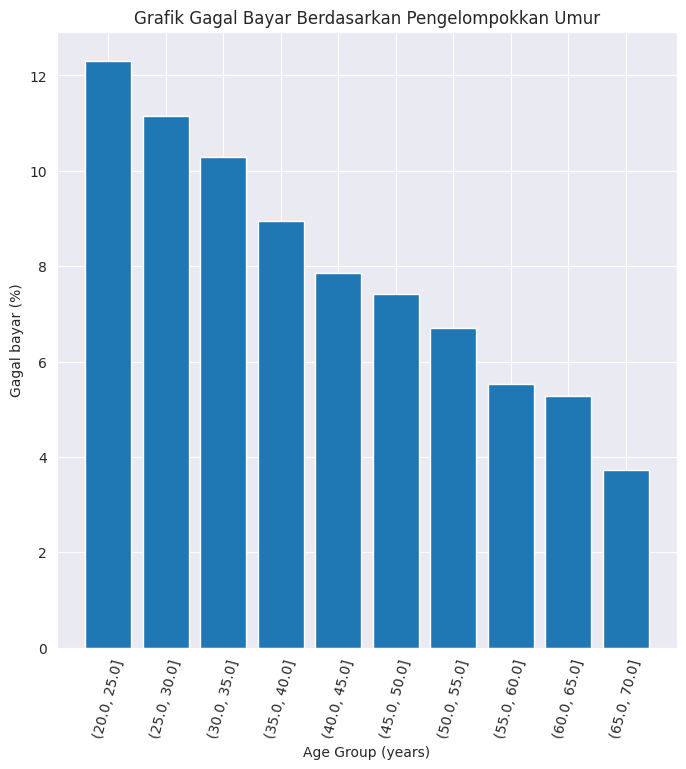

In [ ]:
plt.figure(figsize = (8, 8))

# Buat grafik tempat sampah usia dan rata-rata target sebagai plot batang
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Pelabelan Plot
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Gagal bayar (%)')
plt.title('Grafik Gagal Bayar Berdasarkan Pengelompokkan Umur')

Grafik gagal bayar berdasarkan pengelompokkan umur dapat dilihat pada output diatas. Grafik tersebut menunjukkan bahwa pemninjam dengan umur muda lebih banyak mengalami gagal bayar dari pada kelompok peminjam dengan umur tua.

#### Days Employed Distribution

Days employed distribution plot terhadap kolom "DAYS_EMPLOYED" yang berisi informasi mengenai jumlah hari sejak klien mulai bekerja pada saat pengajuan pinjaman. Nilai-nilai dalam kolom ini juga direpresentasikan sebagai jumlah hari negatif.

Secara umum, kolom "DAYS_EMPLOYED" digunakan untuk mengindikasikan lamanya masa kerja klien pada saat pengajuan pinjaman. Namun, ada beberapa nilai yang menarik perhatian dalam kolom ini:

* Nilai Positif: Beberapa entri memiliki nilai positif yang sangat tinggi. Nilai ini mengindikasikan bahwa klien yang bersangkutan sedang bekerja pada saat pengajuan pinjaman tetapi dengan masa kerja yang sangat lama. Kemungkinan besar, nilai positif ini menunjukkan kegagalan dalam pengisian data atau pengkodean yang salah. Nilai-nilai ini sering dianggap sebagai outliers atau kesalahan dalam data.

* Nilai NaN (Not a Number): Beberapa entri dalam kolom "DAYS_EMPLOYED" mungkin memiliki nilai NaN, yang menandakan bahwa informasi tentang masa kerja klien tidak tersedia atau tidak dilaporkan.

Pada umumnya, nilai negatif dalam kolom "DAYS_EMPLOYED" menunjukkan bahwa klien telah bekerja selama periode tertentu sebelum pengajuan pinjaman. Nilai-nilai ini dapat digunakan untuk memperoleh informasi tentang lamanya masa kerja klien saat pengajuan pinjaman dan mungkin relevan dalam proses penilaian risiko kredit.

In [ ]:
# Melihat deskripsi dari kolom "DAYS_EMPLOYED"
(df['DAYS_EMPLOYED']/ -365).describe()

count    307509.000000
mean       -174.836892
std         387.057891
min       -1000.665753
25%           0.791781
50%           3.326027
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

* Jumlah data yang ada dalam kolom "DAYS_EMPLOYED" adalah 307.511.
* Rata-rata lamanya masa kerja dalam tahun adalah sekitar 6.17 tahun.
* Standar deviasi dari lamanya masa kerja dalam tahun adalah sekitar 5.85 tahun, menunjukkan variasi yang cukup besar di antara nilai-nilai tersebut.
* Nilai minimum adalah 0 tahun, yang mungkin menunjukkan bahwa ada data yang salah atau tidak valid (misalnya, data yang tidak lengkap).
* Quartil pertama (25%) menunjukkan bahwa 25% data memiliki lamanya masa kerja kurang dari 2.56 tahun.
* Quartil kedua (50% atau median) menunjukkan bahwa 50% data memiliki lamanya masa kerja kurang dari 4.52 tahun.
* Quartil ketiga (75%) menunjukkan bahwa 75% data memiliki lamanya masa kerja kurang dari 7.56 tahun.
* Nilai maksimum adalah 49.07 tahun, yang mungkin mengindikasikan bahwa ada nilai ekstrem dalam lamanya masa kerja.

In [ ]:
# Membuat subset anomali dan non-anomal
anom = df[df['DAYS_EMPLOYED'] == 365243]
non_anom = df[df['DAYS_EMPLOYED'] !=365243]

# Menghitung rata-rata default pada pinjaman untuk non-anomali dan anomali
print('The non_anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))

# Menghitung jumlah hari kerja anomali
print('There are %d anomalous days of employment' % len(anom))

The non_anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


* Bagian pertama mencetak persentase dari pinjaman yang gagal bayar (TARGET = 1) pada kelompok data yang bukan anomali ('DAYS_EMPLOYED' != 365243). Dalam hal ini, sebesar 8.66% dari pinjaman pada kelompok data non-anomali mengalami gagal bayar.

* Bagian kedua mencetak persentase dari pinjaman yang gagal bayar pada kelompok data yang dianggap sebagai anomali ('DAYS_EMPLOYED' = 365243). Dalam hal ini, sebesar 5.40% dari pinjaman pada kelompok data anomali mengalami gagal bayar.

* Bagian ketiga mencetak jumlah total hari kerja yang dianggap sebagai anomali (365243) dalam kolom 'DAYS_EMPLOYED'. Terdapat 55374 data dengan nilai 'DAYS_EMPLOYED' yang dianggap sebagai anomali.

Dengan demikian, dapat disimpulkan bahwa meskipun kelompok data anomali memiliki persentase gagal bayar yang lebih rendah dibandingkan kelompok data non-anomali, namun jumlah data dalam kelompok anomali cukup signifikan (55374 data). Hal ini menunjukkan adanya keanehan dalam nilai 'DAYS_EMPLOYED' yang perlu diperhatikan dan dianggap sebagai potensi anomali dalam dataset.

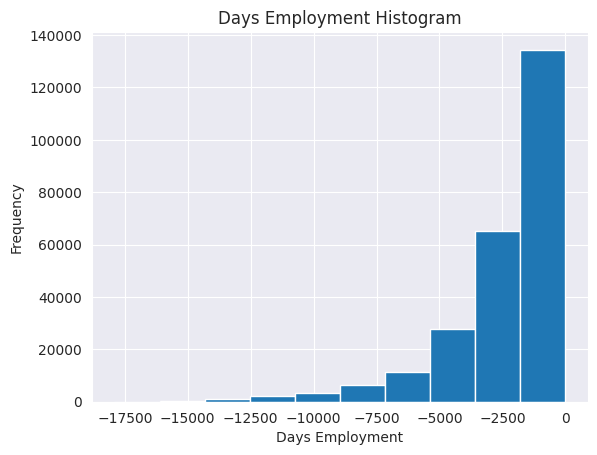

In [ ]:
# Membuat kolom flag anomali
df['DAYS_EMPOLYED_ANOM'] = df['DAYS_EMPLOYED'] == 365243

# Mengganti nilai 365243 dengan NaN
df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# Menampilkan histogram 'DAYS_EMPLOYED
df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Dapat dilihat pada output histogram Days Employment diatas, puncak plot terdapat diantara 0 fan 2500 dengan frekuensi hampir 140000. Secara lebih spesifik, histogram tersebut memberikan informasi tentang sebaran jumlah hari kerja karyawan saat pengajuan pinjaman. Rentang dari 0 hingga 2500 kemungkinan mencerminkan periode sebelum pengajuan pinjaman di mana karyawan tidak bekerja atau mungkin menganggur. Jumlah observasi yang tinggi pada rentang ini menunjukkan adanya kelompok besar peminjam yang mengajukan pinjaman dalam kondisi menganggur atau dalam periode tidak bekerja.

In [ ]:
# Informasi masa kerja ke dalam dataframe terpisah
employed_data = df[['TARGET', 'DAYS_EMPLOYED']]
employed_data['YEARS_EMPLOYED'] = employed_data['DAYS_EMPLOYED'] / -365

min_value = employed_data['YEARS_EMPLOYED'].min()
max_value = employed_data['YEARS_EMPLOYED'].max()

print("Nilai minimum YEARS_EMPLOYED:", min_value)
print("Nilai maksimum YEARS_EMPLOYED:", max_value)

Nilai minimum YEARS_EMPLOYED: -0.0
Nilai maksimum YEARS_EMPLOYED: 49.07397260273972


In [ ]:
# Kelompokkan data masa kerja
employed_data['YEARS_EMPLOYED_BINNED'] = pd.cut(employed_data['YEARS_EMPLOYED'], bins = np.linspace(0, 50, num = 11))
employed_data.head(10)

,TARGET,DAYS_EMPLOYED,YEARS_EMPLOYED,YEARS_EMPLOYED_BINNED
0,1,-637.0,1.745205,"(0.0, 5.0]"
1,0,-1188.0,3.254795,"(0.0, 5.0]"
2,0,-225.0,0.616438,"(0.0, 5.0]"
3,0,-3039.0,8.326027,"(5.0, 10.0]"
4,0,-3038.0,8.323288,"(5.0, 10.0]"
5,0,-1588.0,4.350685,"(0.0, 5.0]"
6,0,-3130.0,8.575342,"(5.0, 10.0]"
7,0,-449.0,1.230137,"(0.0, 5.0]"
8,0,NaN,NaN,NaN
9,0,-2019.0,5.531507,"(5.0, 10.0]"


In [ ]:
# Kelompokkan berdasarkan rentang masa kerja dan hitung rata-rata
employed_group  = employed_data.groupby('YEARS_EMPLOYED_BINNED').mean()
employed_group

,TARGET,DAYS_EMPLOYED,YEARS_EMPLOYED
YEARS_EMPLOYED_BINNED,,,
"(0.0, 5.0]",0.105710,-864.343225,2.368064
"(5.0, 10.0]",0.073714,-2630.224689,7.206095
"(10.0, 15.0]",0.057752,-4466.899670,12.238081
"(15.0, 20.0]",0.048484,-6306.860448,17.279070
"(20.0, 25.0]",0.047573,-8092.875701,22.172262
"(25.0, 30.0]",0.039903,-9961.437122,27.291609
"(30.0, 35.0]",0.041258,-11791.751418,32.306168
"(35.0, 40.0]",0.019231,-13517.634615,37.034615
"(40.0, 45.0]",0.004762,-15325.461905,41.987567


Text(0.5, 1.0, 'Grafik Gagal Bayar Berdasarkan Pengelompokan Masa Kerja')

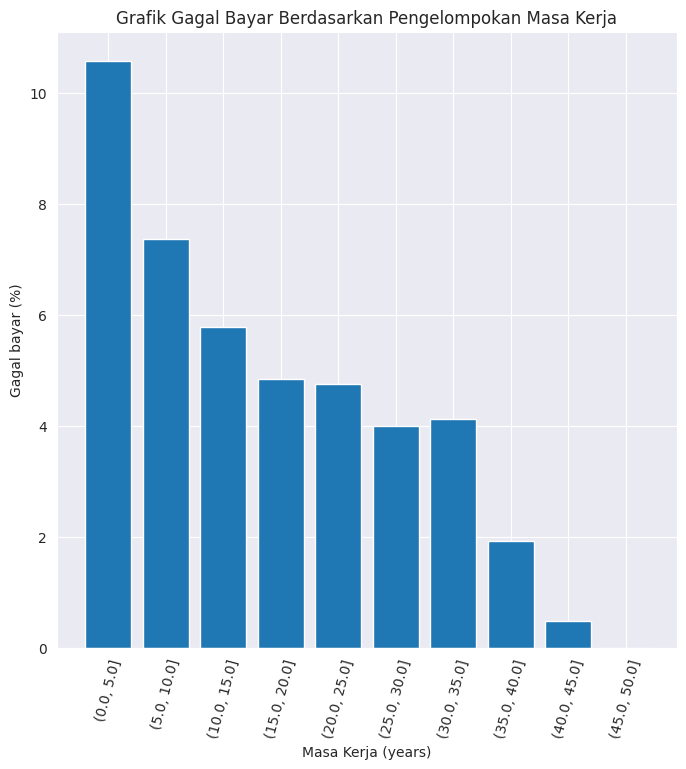

In [ ]:
plt.figure(figsize = (8, 8))

# Buat grafik masa kerja dan rata-rata target sebagai plot batang
plt.bar(employed_group.index.astype(str), 100 * employed_group['TARGET'])

# Pelabelan Plot
plt.xticks(rotation = 75); plt.xlabel('Masa Kerja (years)'); plt.ylabel('Gagal bayar (%)')
plt.title('Grafik Gagal Bayar Berdasarkan Pengelompokan Masa Kerja')

Semakin lama masa kerja pelanggan, persentase gagal bayar cenderung menurun. Rentang masa kerja antara 40-45 tahun memiliki persentase gagal bayar paling rendah sebesar 0.4762%.
Pelanggan dengan masa kerja antara 0-5 tahun memiliki persentase gagal bayar tertinggi sebesar 10.571%.
Terdapat kecenderungan penurunan persentase gagal bayar seiring dengan bertambahnya masa kerja pelanggan.
Rentang masa kerja antara 35-40 tahun memiliki persentase gagal bayar yang lebih rendah dibandingkan dengan rentang lainnya, sekitar 1.9231%.
Rentang masa kerja di atas 45 tahun menunjukkan persentase gagal bayar sebesar 0%, yang berarti tidak ada pelanggan dalam rentang ini yang mengalami gagal bayar.

#### Days of Registration Distribution

Kolom "DAYS_REGISTRATION" dalam data "application_train" pada dataset Home Credit Risk Scoring mengindikasikan jumlah hari sejak pelanggan terdaftar dalam sistem Home Credit pada saat pengajuan pinjaman.

Lebih rinci, kolom ini berisi nilai numerik yang mewakili jumlah hari antara tanggal pelanggan terdaftar dalam sistem Home Credit dan tanggal pengajuan pinjaman. Nilai positif menunjukkan bahwa pelanggan terdaftar setelah tanggal pengajuan pinjaman, sedangkan nilai negatif menunjukkan bahwa pelanggan terdaftar sebelum tanggal pengajuan pinjaman.

Misalnya, jika nilai dalam kolom "DAYS_REGISTRATION" adalah -2000, itu berarti pelanggan tersebut sudah terdaftar dalam sistem Home Credit selama 2000 hari (atau sekitar 5,5 tahun) sebelum tanggal pengajuan pinjaman. Jika nilai tersebut adalah 2000, itu berarti pelanggan tersebut terdaftar dalam sistem Home Credit 2000 hari setelah tanggal pengajuan pinjaman.

In [ ]:
# menghitung nilai minimum (nilai terkecil) dan nilai maksimum (nilai terbesar) dari kolom 'DAYS_REGISTRATION' dalam DataFrame yang disimpan dalam variabel df.
df['DAYS_REGISTRATION'].min(),df['DAYS_REGISTRATION'].max()

(-24672.0, 0.0)

In [ ]:
daysregis_data = df[['TARGET', 'DAYS_REGISTRATION']]

# Kelompokkan data DAYS_REGISTRATION
daysregis_data['DAYS_REGISTRATION_BINNED'] = pd.cut(daysregis_data['DAYS_REGISTRATION'], bins = np.linspace(-25000, 0, num = 11))

daysregis_data.head(10)

,TARGET,DAYS_REGISTRATION,DAYS_REGISTRATION_BINNED
0,1,-3648.0,"(-5000.0, -2500.0]"
1,0,-1186.0,"(-2500.0, 0.0]"
2,0,-4260.0,"(-5000.0, -2500.0]"
3,0,-9833.0,"(-10000.0, -7500.0]"
4,0,-4311.0,"(-5000.0, -2500.0]"
5,0,-4970.0,"(-5000.0, -2500.0]"
6,0,-1213.0,"(-2500.0, 0.0]"
7,0,-4597.0,"(-5000.0, -2500.0]"
8,0,-7427.0,"(-7500.0, -5000.0]"
9,0,-14437.0,"(-15000.0, -12500.0]"


In [ ]:
# Kelompokkan berdasarkan rentang hari pelanggan terdaftar dan hitung rata-rata
daysregis_group  = daysregis_data.groupby('DAYS_REGISTRATION_BINNED').mean()
daysregis_group

,TARGET,DAYS_REGISTRATION
DAYS_REGISTRATION_BINNED,,
"(-25000.0, -22500.0]",0.166667,-23385.500000
"(-22500.0, -20000.0]",0.000000,-20990.166667
"(-20000.0, -17500.0]",0.054545,-18345.209091
"(-17500.0, -15000.0]",0.041705,-15804.459685
"(-15000.0, -12500.0]",0.052888,-13416.118761
"(-12500.0, -10000.0]",0.058288,-11041.762698
"(-10000.0, -7500.0]",0.067261,-8683.058154
"(-7500.0, -5000.0]",0.079411,-6180.083271
"(-5000.0, -2500.0]",0.087014,-3784.577727


Text(0.5, 1.0, 'Grafik Gagal Bayar Berdasarkan Pengelompokkan Jumlah Hari Pelanggan Terdaftar Pada Saat Pengajuan Pinjaman')

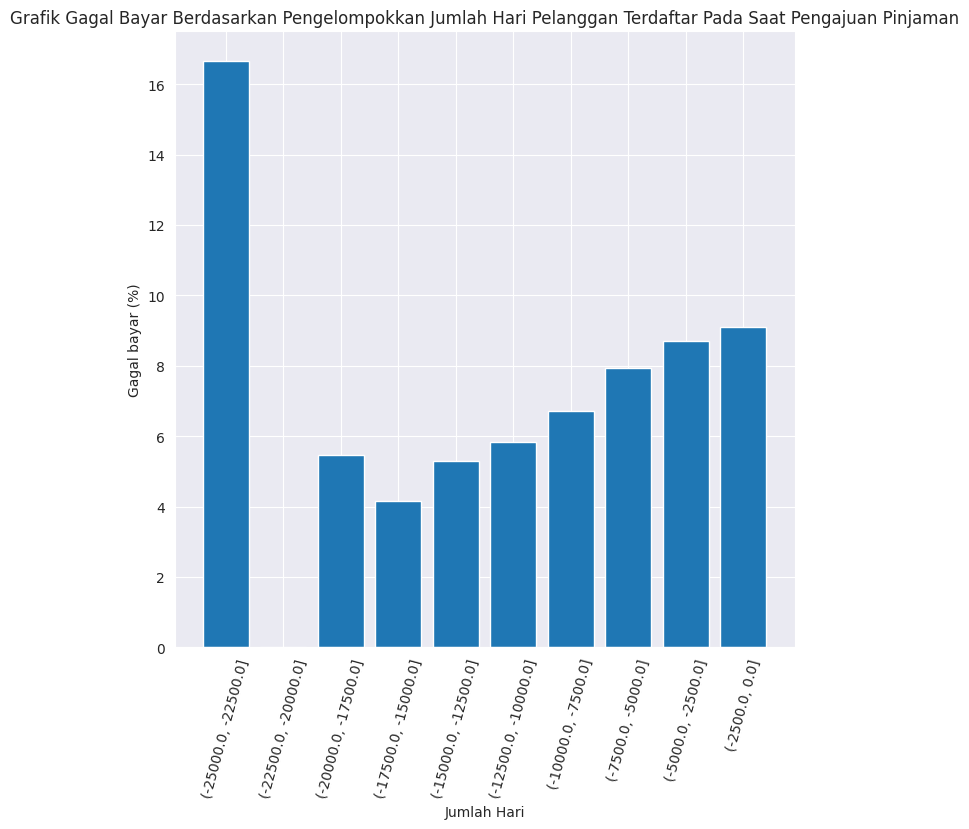

In [ ]:
plt.figure(figsize = (8, 8))

# Buat grafik rentang hari pelanggan terdaftar dan rata-rata target sebagai plot batang
plt.bar(daysregis_group.index.astype(str), 100 * daysregis_group['TARGET'])

# Pelabelan Plot
plt.xticks(rotation = 75); plt.xlabel('Jumlah Hari'); plt.ylabel('Gagal bayar (%)')
plt.title('Grafik Gagal Bayar Berdasarkan Pengelompokkan Jumlah Hari Pelanggan Terdaftar Pada Saat Pengajuan Pinjaman')

Pada grafik tersebut dapat dilihat bahwa presentasi tertinggi dimiliki oleh pelanggan yang mengajukan pinjaman setelah 25000 hingga 22500 hari terdaftar dalam sistem Home Credit dengan presentase 16,6%. Hal ini menunjukkan adanya risiko yang lebih tinggi bagi pelanggan dengan jumlah hari terdaftar dalam rentang tersebut untuk tidak dapat membayar pinjaman dengan tepat waktu.


#### Region Registered not Live Region and Not Work Region

Selanjutnya kita akan memvisualisasikan atau mewakili nilai dari dua kondisi yang berbeda dalam dataset terkait dengan daerah/region.

"Region registered and not live region" merujuk pada data di mana klien terdaftar di suatu wilayah tetapi tidak tinggal di wilayah tersebut. Ini bisa berarti bahwa klien memiliki alamat terdaftar di suatu wilayah tetapi saat ini tinggal di wilayah yang berbeda. Visualisasi atau representasi nilai ini dapat memberikan wawasan tentang seberapa umum klien mendaftar di wilayah tempat tinggal yang berbeda.

"Region registered and not work region" merujuk pada data di mana klien terdaftar di suatu wilayah tetapi tidak bekerja di wilayah tersebut. Ini berarti bahwa klien memiliki alamat terdaftar di suatu wilayah tetapi bekerja di wilayah yang berbeda. Representasi nilai ini dapat memberikan informasi tentang mobilitas kerja klien dan sejauh mana mereka melakukan perjalanan atau bekerja di luar wilayah tempat tinggal mereka terdaftar.

In [ ]:
# Menghitung persentase per kolom dengan menggunakan pd.crosstab:
temp_REG_REGION_NOT_LIVE=pd.crosstab(df['REG_REGION_NOT_LIVE_REGION'], df['TARGET']).apply(lambda x: x*100/x.sum(), axis = 1)

# Menghitung persentase per nilai menggunakan value_counts:
temp2_REG_REGION_NOT_LIVE=df['REG_REGION_NOT_LIVE_REGION'].value_counts().apply(lambda x: x*100/df['REG_REGION_NOT_LIVE_REGION'].value_counts().sum())

# Menampilkan hasil perhitungan:
print(temp_REG_REGION_NOT_LIVE, '\n')
print(temp2_REG_REGION_NOT_LIVE)

TARGET                              0         1
REG_REGION_NOT_LIVE_REGION                     
0                           91.945901  8.054099
1                           90.702169  9.297831 

0    98.485573
1     1.514427
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


Output pertama menunjukkan persentase kemunculan nilai "TARGET" (0 dan 1) untuk setiap nilai pada kolom "REG_REGION_NOT_LIVE_REGION". Secara spesifik, output tersebut menampilkan:

* Untuk nilai "REG_REGION_NOT_LIVE_REGION" = 0 (pelanggan memiliki alamat tempat tinggal (region) yang sama dengan alamat tempat mereka mendaftar), persentase kemunculan "TARGET" = 0 (tidak gagal bayar) adalah 91.95% dan persentase kemunculan "TARGET" = 1 (gagal bayar) adalah 8.05%.
* Untuk nilai "REG_REGION_NOT_LIVE_REGION" = 1 (pelanggan memiliki alamat tempat tinggal (region) yang tidak sama dengan alamat tempat mereka mendaftar), persentase kemunculan "TARGET" = 0 (tidak gagal bayar) adalah 90.70% dan persentase kemunculan "TARGET" = 1 (gagal bayar) adalah 9.30%.
Dengan demikian, output tersebut memberikan informasi tentang hubungan antara nilai "REG_REGION_NOT_LIVE_REGION" dan "TARGET". Misalnya, dapat dilihat bahwa kemungkinan mengalami masalah gagal bayar (TARGET = 1) sedikit lebih tinggi saat alamat tempat tinggal pelanggan tidak sama dengan alamat tempat mereka mendaftar dibandingkan dengan pelanggan yang memiliki alamt tempat tinggal sama dengan alamat tempat mereka mendaftar.

Output kedua menunjukkan persentase kemunculan setiap nilai pada kolom "REG_REGION_NOT_LIVE_REGION" dalam keseluruhan dataset. Secara spesifik, output tersebut menampilkan:

Nilai 0 muncul sebanyak 98.49% dalam kolom "REG_REGION_NOT_LIVE_REGION".
Nilai 1 muncul sebanyak 1.51% dalam kolom "REG_REGION_NOT_LIVE_REGION".
Output ini memberikan informasi tentang sebaran nilai dalam kolom "REG_REGION_NOT_LIVE_REGION" pada dataset secara keseluruhan.

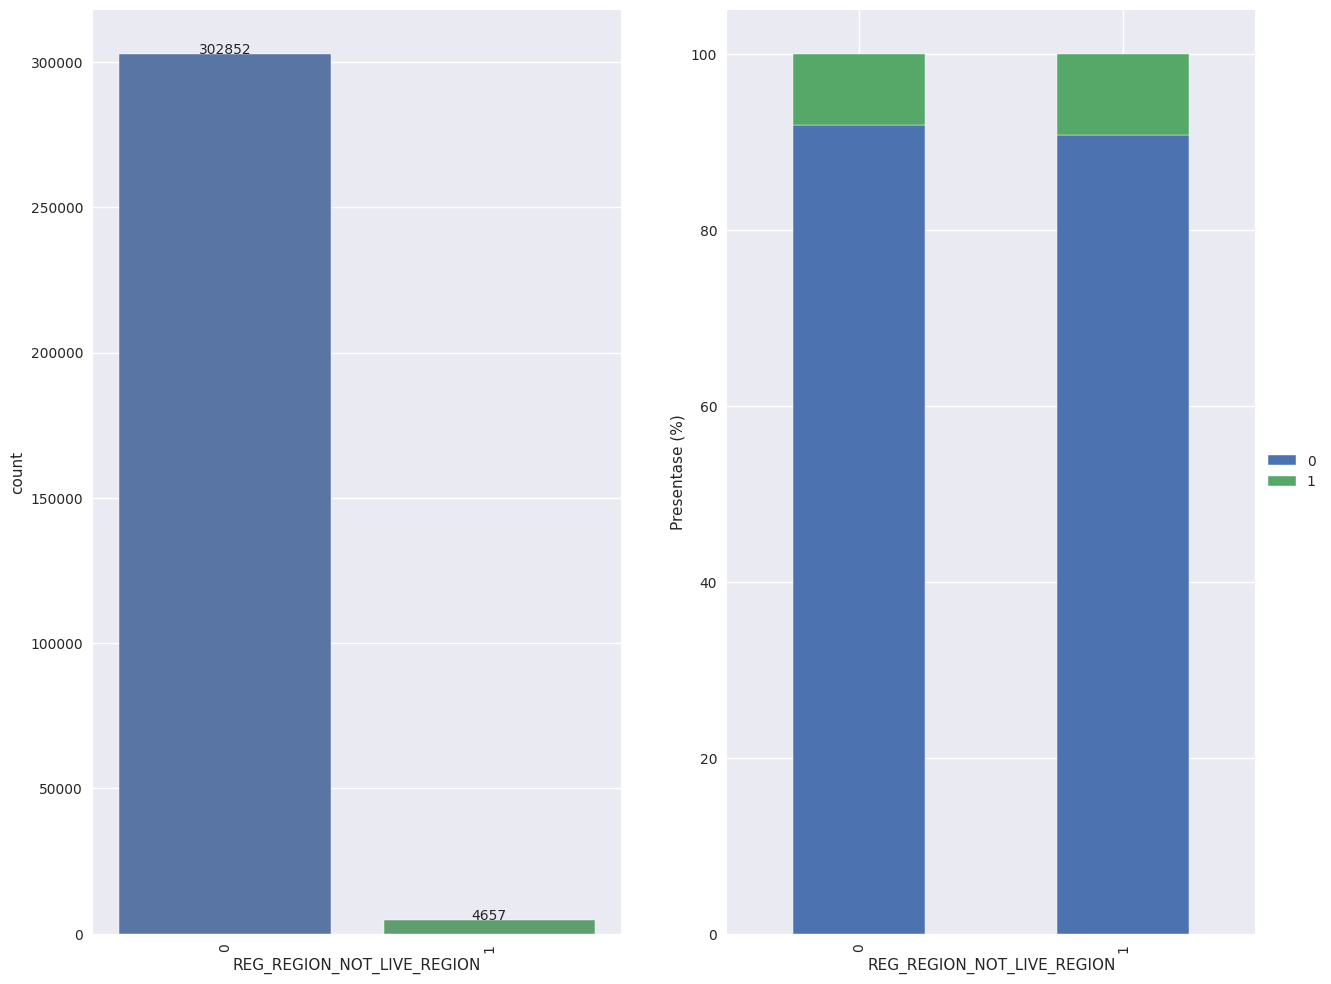

In [ ]:
 # Mengatur gaya plot menggunakan plt.style.context('seaborn'). Ini mengubah gaya plot menjadi gaya yang ditentukan oleh 'seaborn'.
 with plt.style.context('seaborn'):
   # Membuat subplot dengan ukuran (1, 2) menggunakan fig, ax = plt.subplots(1, 2, figsize=(15, 12)). Ini menghasilkan objek fig yang mewakili keseluruhan gambar dan objek ax yang merupakan array dari dua sumbu (axis) plot.
   fig, ax = plt.subplots(1,2,figsize=(15,12))
   # Membuat countplot pada sumbu pertama (ax[0]) dengan menggunakan sns.countplot(data=df, x='REG_REGION_NOT_LIVE_REGION', ax=ax[0]). Ini akan menghasilkan plot dengan jumlah pengamatan pada setiap nilai kategori dari kolom 'REG_REGION_NOT_LIVE_REGION'.
   sns.countplot(data=df,x='REG_REGION_NOT_LIVE_REGION',ax=ax[0])
   # Membuat stacked bar plot pada sumbu kedua (ax[1]) dengan menggunakan temp_REG_REGION_NOT_LIVE.plot(kind='bar', stacked=True, ax=ax[1]). Ini akan menghasilkan plot bar yang menunjukkan proporsi dari setiap kategori pada kolom 'REG_REGION_NOT_LIVE_REGION' dalam bentuk yang ditumpuk (stacked).
   temp_REG_REGION_NOT_LIVE.plot(kind='bar',stacked=True,ax=ax[1])

   # Menambahkan legenda pada sumbu kedua menggunakan ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5)). Ini akan menampilkan legenda pada posisi yang ditentukan di sebelah sumbu kedua.
   ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))


   # Mengatur label sumbu x pada sumbu pertama dengan menggunakan ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90) dan plt.xticks(rotation=90). Ini akan mengatur label sumbu x menjadi teks yang lebih mudah dibaca dan memutar label 90 derajat untuk menghindari tumpang tindih.
   ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
   plt.xticks(rotation=90)
   # Mengatur label sumbu y pada sumbu kedua dengan plt.ylabel('Presentase (%)'). Ini akan memberi label sumbu y sebagai "Presentase (%)".
   plt.ylabel('Presentase (%)')
   # Menambahkan angka presentase di atas setiap bar pada sumbu pertama menggunakan loop for dan ax[0].text(). Loop ini akan mengambil setiap patch (bar) pada sumbu pertama dan menambahkan angka presentase yang sesuai di atasnya.
   i=0
   for p in ax[0].patches:
      height = p.get_height()
      ax[0].text(p.get_x()+p.get_width()/2., height + 0.6,df['REG_REGION_NOT_LIVE_REGION'].value_counts()[i],ha="center")
      i += 1

Grafik diatas menunjukkan bahwa 302852 (98%) peminjam memiliki alamat tempat tinggal (region) yang sama dengan alamat tempat mereka mendaftar dengan 91,95% tidak mengalami gagal bayar pinjaman (Target = 0).

In [ ]:
temp_REG_REGION_NOT_WORK=pd.crosstab(df['REG_REGION_NOT_WORK_REGION'], df['TARGET']).apply(lambda x: x*100/x.sum(), axis = 1)
temp2_REG_REGION_NOT_WORK=df['REG_REGION_NOT_WORK_REGION'].value_counts().apply(lambda x: x*100/df['REG_REGION_NOT_WORK_REGION'].value_counts().sum())
print(temp_REG_REGION_NOT_WORK, '\n')
print(temp2_REG_REGION_NOT_WORK)

TARGET                              0         1
REG_REGION_NOT_WORK_REGION                     
0                           91.970825  8.029175
1                           91.108834  8.891166 

0    94.923401
1     5.076599
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


* Sekitar 91-92% dari total data memiliki nilai "REG_REGION_NOT_WORK_REGION" = 0 (alamat tempat kerja peminjam berada di wilayah yang sama dengan alamat tempat tinggal(region)), dan persentase target 0 (tidak gagal bayar pinjaman) dan target 1 (gagal bayar pinjaman) pada kelompok ini hampir sama.
* Sekitar 8-9% dari total data memiliki nilai "REG_REGION_NOT_WORK_REGION" = 1 (alamat tempat kerja peminjam berada di wilayah berbeda dengan alamat tempat tinggal(region)), dan persentase target 1 cenderung sedikit lebih tinggi daripada target 0 pada kelompok ini.
* Jumlah data dengan nilai "REG_REGION_NOT_WORK_REGION" = 0 jauh lebih dominan dibandingkan dengan jumlah data dengan nilai "REG_REGION_NOT_WORK_REGION" = 1 dalam dataset ini.

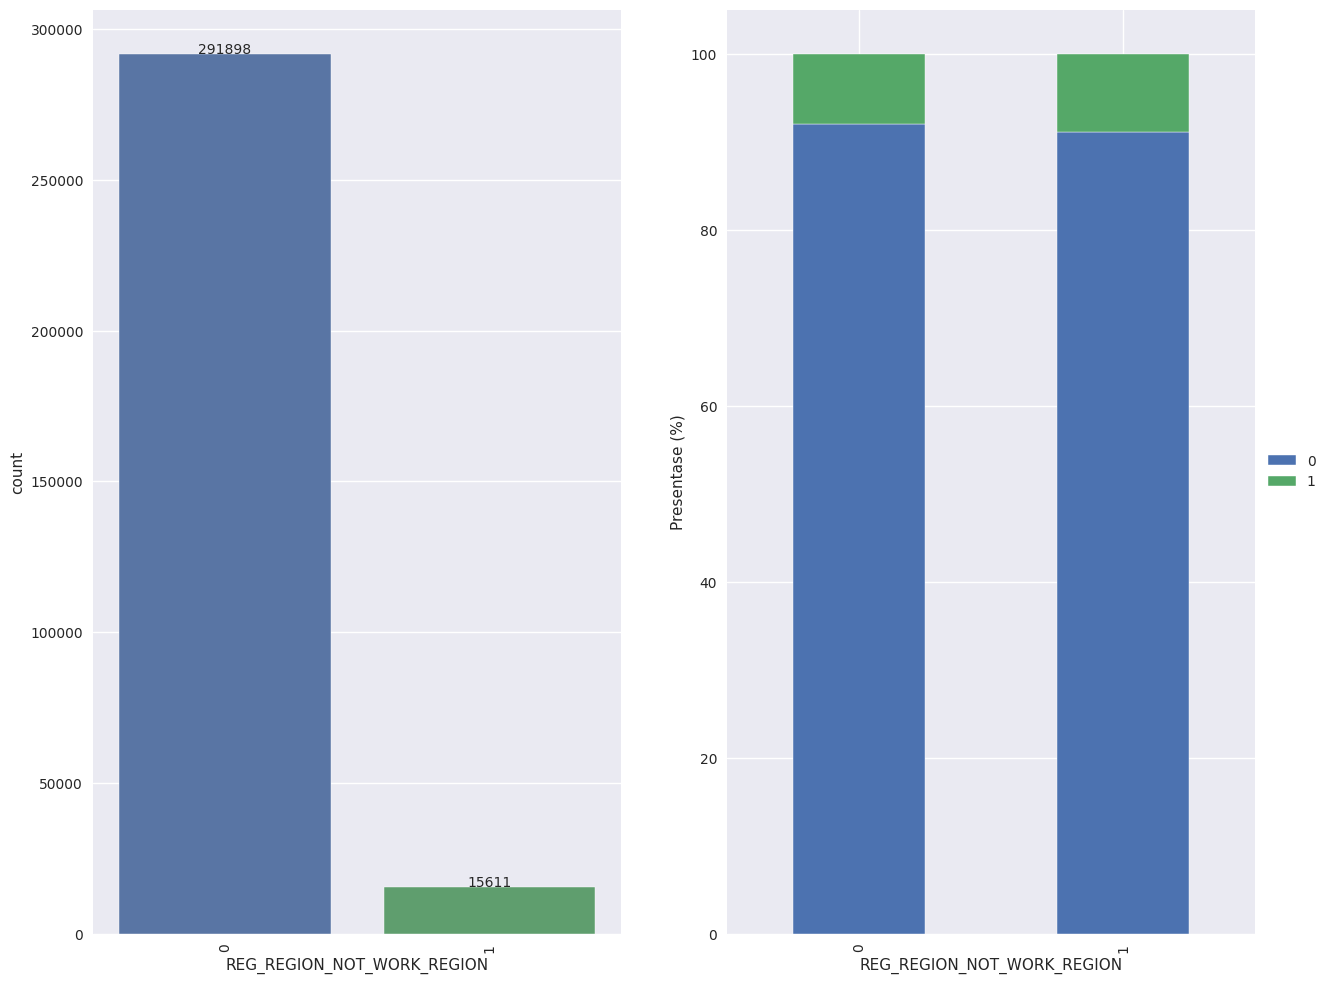

In [ ]:
 with plt.style.context('seaborn'):
   fig, ax = plt.subplots(1,2,figsize=(15,12))
   sns.countplot(data=df,x='REG_REGION_NOT_WORK_REGION',ax=ax[0])
   temp_REG_REGION_NOT_WORK.plot(kind='bar',stacked=True,ax=ax[1])

   ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

   ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
   plt.xticks(rotation=90)
   plt.ylabel('Presentase (%)')
   i=0
   for p in ax[0].patches:
      height = p.get_height()
      ax[0].text(p.get_x()+p.get_width()/2., height + 0.6,df['REG_REGION_NOT_WORK_REGION'].value_counts()[i],ha="center")
      i += 1

Grafik diatas menunjukkan bahwa 291898 (94%) peminjam memiliki alamat tempat kerja yang sama dengan alamat tempat tinggal (region) mereka dengan 91,97% tidak mengalami gagal bayar pinjaman (Target = 0).

#### City Registered Not Live City and Not Work city

Kita juga akan memvisualisasikan atau mewakili nilai dari dua kondisi yang berbeda dalam dataset terkait dengan kota/city.

"City Registered Not Live City" merujuk pada data di mana klien terdaftar di suatu kota tetapi tidak tinggal di kota tersebut. Ini bisa berarti bahwa klien memiliki alamat terdaftar di suatu kota tetapi saat ini tinggal di kota yang berbeda. Visualisasi atau representasi nilai ini dapat memberikan wawasan tentang seberapa umum klien mendaftar di kota tempat tinggal yang berbeda.

"City Registered Not Work city" merujuk pada data di mana klien terdaftar di suatu kota tetapi tidak bekerja di kota tersebut. Ini berarti bahwa klien memiliki alamat terdaftar di suatu kota tetapi bekerja di kota yang berbeda. Representasi nilai ini dapat memberikan informasi tentang mobilitas kerja klien dan sejauh mana mereka melakukan perjalanan atau bekerja di luar kota tempat tinggal mereka terdaftar.

In [ ]:
temp_REG_CITY_NOT_LIVE=pd.crosstab(df['REG_CITY_NOT_LIVE_CITY'], df['TARGET']).apply(lambda x: x*100/x.sum(), axis = 1)
temp2_REG_CITY_NOT_LIVE=df['REG_CITY_NOT_LIVE_CITY'].value_counts().apply(lambda x: x*100/df['REG_CITY_NOT_LIVE_CITY'].value_counts().sum())
print(temp_REG_CITY_NOT_LIVE, '\n')
print(temp2_REG_CITY_NOT_LIVE)

TARGET                          0          1
REG_CITY_NOT_LIVE_CITY                      
0                       92.279254   7.720746
1                       87.774034  12.225966 

0    92.182668
1     7.817332
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


Bagian pertama output menunjukkan hasil dari perhitungan persentase dari masing-masing nilai pada variabel "REG_CITY_NOT_LIVE_CITY" terhadap variabel "TARGET".

* Untuk nilai "REG_CITY_NOT_LIVE_CITY" = 0, sekitar 92.28% data memiliki nilai "TARGET" = 0 (tidak mengalami masalah kredit) dan sekitar 7.72% memiliki nilai "TARGET" = 1 (mengalami masalah kredit).

* Sedangkan untuk nilai "REG_CITY_NOT_LIVE_CITY" = 1, sekitar 87.77% data memiliki nilai "TARGET" = 0 dan sekitar 12.23% memiliki nilai "TARGET" = 1.

Bagian kedua output menampilkan persentase distribusi dari masing-masing nilai pada variabel "REG_CITY_NOT_LIVE_CITY" secara keseluruhan terhadap seluruh data.

* Sebanyak 92.18% data memiliki nilai "REG_CITY_NOT_LIVE_CITY" = 0.
* Sebanyak 7.82% data memiliki nilai "REG_CITY_NOT_LIVE_CITY" = 1.


Kesimpulan yang dapat diambil dari output tersebut adalah bahwa terdapat perbedaan yang signifikan dalam distribusi nilai "TARGET" antara data dengan "REG_CITY_NOT_LIVE_CITY" = 0 dan "REG_CITY_NOT_LIVE_CITY" = 1. Data dengan "REG_CITY_NOT_LIVE_CITY" = 1 memiliki persentase yang lebih tinggi untuk nilai "TARGET" = 1 (mengalami masalah kredit) dibandingkan dengan data "REG_CITY_NOT_LIVE_CITY" = 0.

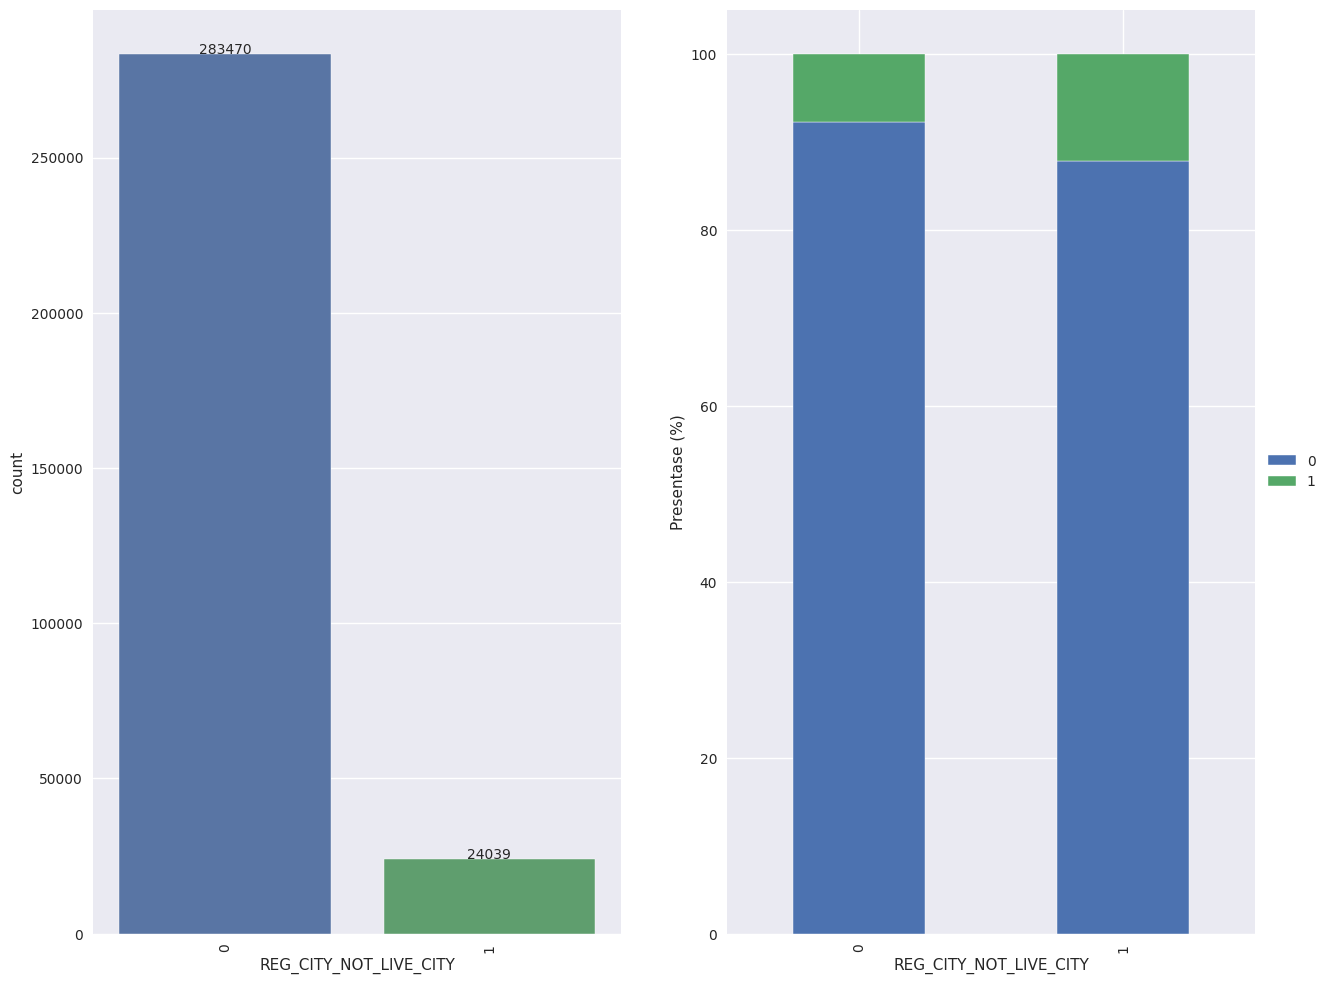

In [ ]:
 with plt.style.context('seaborn'):
   fig, ax = plt.subplots(1,2,figsize=(15,12))
   sns.countplot(data=df,x='REG_CITY_NOT_LIVE_CITY',ax=ax[0])
   temp_REG_CITY_NOT_LIVE.plot(kind='bar',stacked=True,ax=ax[1])

   ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

   ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
   plt.xticks(rotation=90)
   plt.ylabel('Presentase (%)')
   i=0
   for p in ax[0].patches:
      height = p.get_height()
      ax[0].text(p.get_x()+p.get_width()/2., height + 0.6,df['REG_CITY_NOT_LIVE_CITY'].value_counts()[i],ha="center")
      i += 1

Data menunjukkan bahwa 283470 (92%) peminjam memiliki alamat permanen yang sesuai dengan alamat kerja dengan 92,28% tidak mengalami gagal bayar (Target = 0).

In [ ]:
temp_REG_CITY_NOT_WORK=pd.crosstab(df['REG_CITY_NOT_WORK_CITY'], df['TARGET']).apply(lambda x: x*100/x.sum(), axis = 1)
temp2_REG_CITY_NOT_WORK=df['REG_CITY_NOT_WORK_CITY'].value_counts().apply(lambda x: x*100/df['REG_CITY_NOT_WORK_CITY'].value_counts().sum())
print(temp_REG_CITY_NOT_WORK, '\n')
print(temp2_REG_CITY_NOT_WORK)

TARGET                          0          1
REG_CITY_NOT_WORK_CITY                      
0                       92.687297   7.312703
1                       89.388423  10.611577 

0    76.954821
1    23.045179
Name: REG_CITY_NOT_WORK_CITY, dtype: float64


Bagian pertama adalah tabel yang menunjukkan persentase distribusi target (kolom "TARGET" dengan nilai 0 atau 1) berdasarkan kolom "REG_CITY_NOT_WORK_CITY" (indikator apakah kota tempat tinggal tidak sama dengan kota tempat bekerja). Tabel ini telah dinormalisasi sehingga persentasenya dihitung berdasarkan total baris yang sesuai. Dapat disimpulkan bahwa:

* Jika "REG_CITY_NOT_WORK_CITY" adalah 0 (kota tempat tinggal sama dengan kota tempat bekerja), sekitar 92.69% dari entitas memiliki target 0 (tidak mengalami masalah kredit) dan sekitar 7.31% memiliki target 1 (mengalami masalah kredit).
* Jika "REG_CITY_NOT_WORK_CITY" adalah 1 (kota tempat tinggal tidak sama dengan kota tempat bekerja), sekitar 89.39% dari entitas memiliki target 0 dan sekitar 10.61% memiliki target 1.

Bagian kedua adalah distribusi persentase jumlah entitas dalam dataset berdasarkan nilai "REG_CITY_NOT_WORK_CITY". Dapat disimpulkan bahwa:

* Sekitar 76.95% entitas dalam dataset memiliki "REG_CITY_NOT_WORK_CITY" dengan nilai 0 (kota tempat tinggal sama dengan kota tempat bekerja).
* Sekitar 23.05% entitas dalam dataset memiliki "REG_CITY_NOT_WORK_CITY" dengan nilai 1 (kota tempat tinggal tidak sama dengan kota tempat bekerja).

Kesimpulan yang dapat diambil adalah entitas yang memiliki "REG_CITY_NOT_WORK_CITY" dengan nilai 1 (kota tempat tinggal tidak sama dengan kota tempat bekerja) memiliki kecenderungan yang sedikit lebih tinggi untuk mengalami masalah kredit (TARGET = 1) dibandingkan dengan entitas yang memiliki "REG_CITY_NOT_WORK_CITY" dengan nilai 0 (kota tempat tinggal sama dengan kota tempat bekerja). Namun, perbedaannya tidak signifikan dan masih mayoritas entitas pada kedua kategori memiliki target 0 (tidak mengalami masalah kredit).

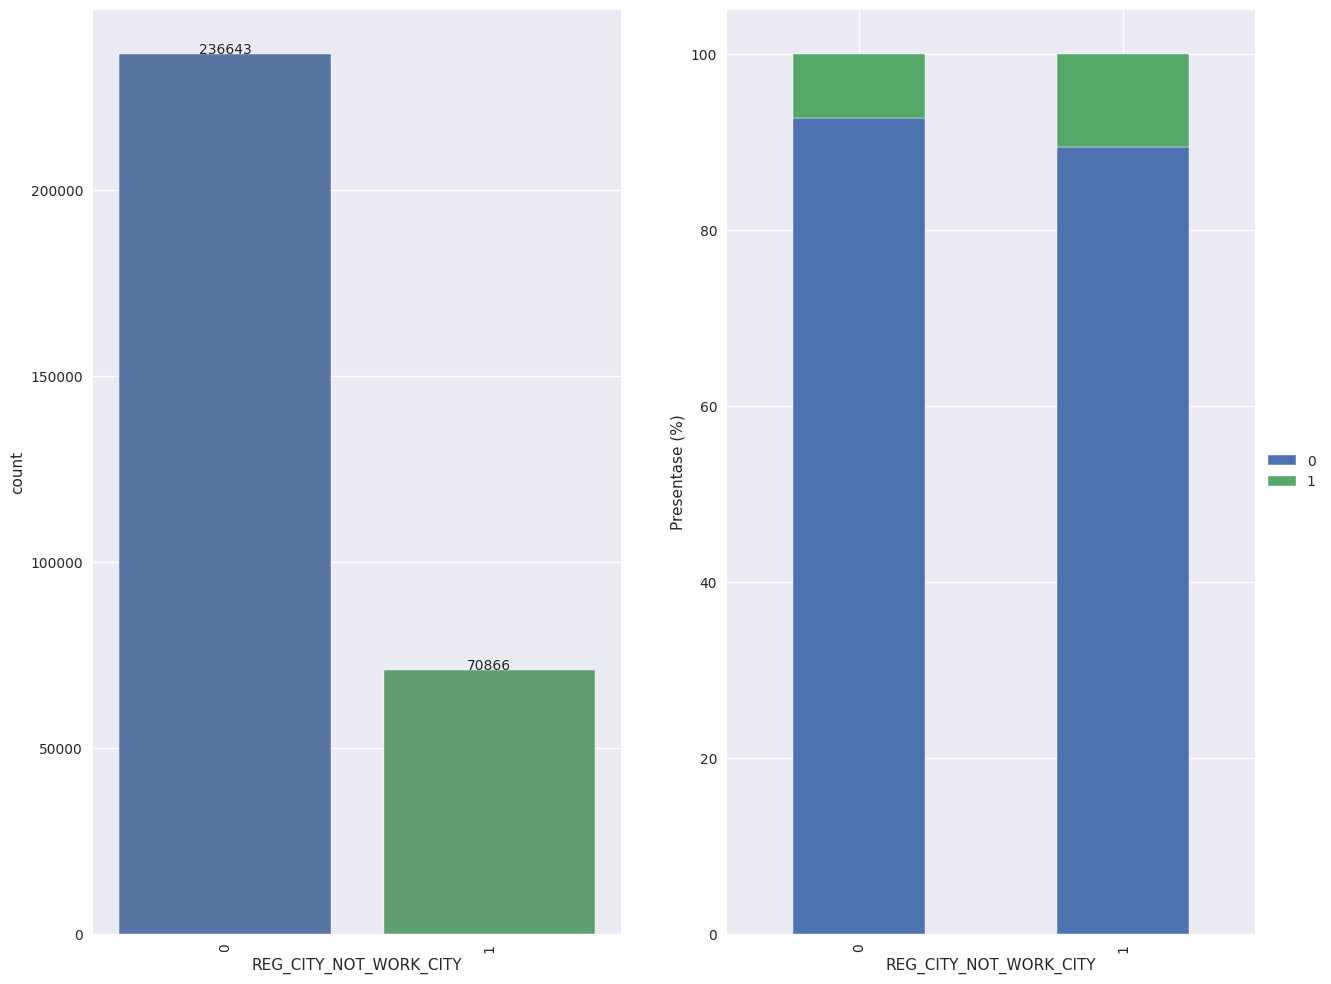

In [ ]:
 with plt.style.context('seaborn'):
   fig, ax = plt.subplots(1,2,figsize=(15,12))
   sns.countplot(data=df,x='REG_CITY_NOT_WORK_CITY',ax=ax[0])
   temp_REG_CITY_NOT_WORK.plot(kind='bar',stacked=True,ax=ax[1])

   ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

   ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
   plt.xticks(rotation=90)
   plt.ylabel('Presentase (%)')
   i=0
   for p in ax[0].patches:
      height = p.get_height()
      ax[0].text(p.get_x()+p.get_width()/2., height + 0.6,df['REG_CITY_NOT_WORK_CITY'].value_counts()[i],ha="center")
      i += 1

Data menunjukkan bahwa 236643 (77%) peminjam memiliki alamat permanen yang sesuai dengan alamat kerja dengan 92,69% tidak mengalami gagal bayar (Target = 0).

#### Correlation

In [ ]:
# Menghitung korelasi
correlations = df.corr()['TARGET'].sort_values()

# Menampilkan Korelasi paling positive dan paling negative
print('Most Positive Correlations:\n', correlations.tail(20))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OBS_60_CNT_SOCIAL_CIRCLE       0.009015
OBS_30_CNT_SOCIAL_CIRCLE       0.009124
CNT_FAM_MEMBERS                0.009308
AMT_REQ_CREDIT_BUREAU_YEAR     0.018160
CNT_CHILDREN                   0.019186
FLAG_WORK_PHONE                0.028526
DEF_60_CNT_SOCIAL_CIRCLE       0.031251
DEF_30_CNT_SOCIAL_CIRCLE       0.032221
LIVE_CITY_NOT_WORK_CITY        0.032520
DAYS_REGISTRATION              0.041976
FLAG_DOCUMENT_3                0.044344
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045983
REG_CITY_NOT_WORK_CITY         0.050996
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055219
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074960
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_2                 -0.160294
EXT_SOURCE_3                 -0.155891
DAYS_BIRTH                   -0.07

Korelasi Positif Terbesar:

Variabel yang memiliki korelasi positif terbesar dengan kolom "TARGET" adalah "REGION_RATING_CLIENT_W_CITY" dengan nilai korelasi sebesar 0.060893.
Variabel lain yang memiliki korelasi positif yang cukup tinggi dengan kolom "TARGET" antara lain "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE", "REGION_RATING_CLIENT", "FLAG_EMP_PHONE", dan lainnya. Namun, korelasinya masih relatif rendah.

Korelasi Negatif Terbesar:

Variabel yang memiliki korelasi negatif terbesar dengan kolom "TARGET" adalah "EXT_SOURCE_2" dengan nilai korelasi sebesar -0.160295.
Variabel lain yang memiliki korelasi negatif yang cukup tinggi dengan kolom "TARGET" antara lain "EXT_SOURCE_3", "DAYS_BIRTH", "DAYS_EMPLOYED", "AMT_GOODS_PRICE", dan lainnya.

Kesimpulan:

Korelasi positif terbesar dengan kolom "TARGET" adalah relatif rendah, menunjukkan bahwa tidak ada variabel yang memiliki korelasi yang kuat dengan kemungkinan masalah kredit.
Korelasi negatif terbesar menunjukkan bahwa beberapa variabel seperti "EXT_SOURCE_2", "EXT_SOURCE_3", "DAYS_BIRTH", dan "DAYS_EMPLOYED" memiliki korelasi yang lebih tinggi dengan kemungkinan masalah kredit. Hal ini menunjukkan bahwa variabel-variabel ini mungkin berperan dalam membedakan antara data yang memiliki masalah kredit (TARGET = 1) dan data yang tidak memiliki masalah kredit (TARGET = 0).

#### Correlation Matrix with Heatmap

Step berikutnya yaitu kita akan membuat matriks korelasi menggunakan Heatmap

In [ ]:
# Mendefinisikan threshold sebagai 0.9. Ini berarti bahwa jika dua variabel memiliki korelasi lebih dari 0.9, salah satunya akan dihapus karena mereka saling terkait secara kuat.
threshold = 0.9

# membuat matriks korelasi absolut dengan menggunakan fungsi corr() dari dataframe 'df' dan kemudian mengambil nilai absolut dari matriks korelasi ini dengan abs().
corr_matrix = df.corr().abs()
corr_matrix.head()

# membuat matriks segitiga atas dari korelasi menggunakan np.triu(). Ini menghasilkan matriks dengan elemen-elemen di bawah diagonal utama diatur menjadi 0.
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()


# Pilih kolom dengan korelasi di atas ambang batas
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))

There are 8 columns to remove.


Output tersebut menunjukkan bahwa
terdapat 8 kolom yang perlu dihapus untuk menghindari masalah multikolinieritas dan redundansi informasi, kolom-kolom ini akan dihapus dari dataset.

In [ ]:
to_drop

['AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT_W_CITY',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_EMPOLYED_ANOM']

4 kolom diatas merupakan kolom yang harus dihapus.

In [ ]:
# Menghapus kolom
to_drop = ['AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT_W_CITY',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_EMPOLYED_ANOM']

In [ ]:
# Menghapus kolom-kolom yang ada dalam variabel to_drop dari DataFrame df dan mencetak bentuk (shape) DataFrame sebelum dan setelah penghapusan kolom-kolom tersebut.
print('Training shape: ', df.shape)
df = df.drop(columns = to_drop)
print('New Training shape: ', df.shape)

Training shape:  (307509, 81)
New Training shape:  (307509, 73)


DataFrame application_train memiliki dimensi (shape) yang baru, yaitu 307509 baris dan 73 kolom.
Dengan demikian, terdapat 4 kolom yang telah dihapus dari DataFrame df dan tidak termasuk dalam DataFrame application_train.

In [ ]:
correlation = df.corr()

In [ ]:
# Melihat kolom yang memiliki korelasi terkuat dengan atribut kolom 'TARGET'
corr_with_target = correlation['TARGET'].sort_values(ascending=False)
top_corr_with_target = corr_with_target[(abs(corr_with_target) > 0.05)]
print("There is {} strongly correlated values with TARGET:\n{}".format(len(top_corr_with_target), top_corr_with_target))

There is 9 strongly correlated values with TARGET:
TARGET                    1.000000
DAYS_EMPLOYED             0.074960
REGION_RATING_CLIENT      0.058899
DAYS_LAST_PHONE_CHANGE    0.055219
DAYS_ID_PUBLISH           0.051457
REG_CITY_NOT_WORK_CITY    0.050996
DAYS_BIRTH               -0.078241
EXT_SOURCE_3             -0.155891
EXT_SOURCE_2             -0.160294
Name: TARGET, dtype: float64


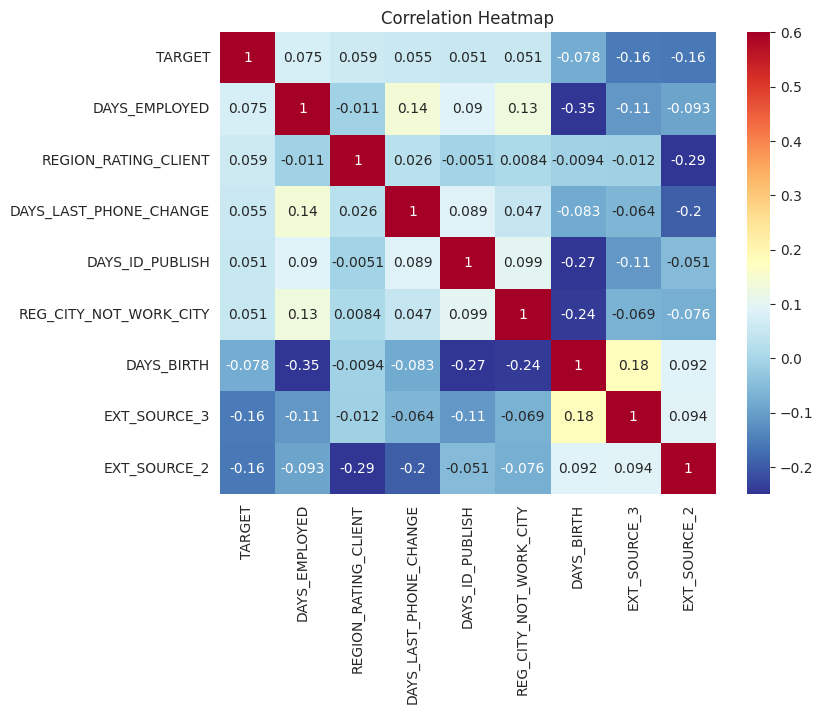

In [ ]:
plt.figure(figsize=(8, 6))

# Memuat matrix korelasi
corr_matrix = df[top_corr_with_target.index].corr()

# Heatmap dari korelasi
sns.heatmap(corr_matrix, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=0.6)
plt.title('Correlation Heatmap')
plt.show()

Terdapat 8 atribut yang memiliki korelasi yang kuat dengan atribut target ('TARGET'). Artinya, atribut-atribut ini memiliki pengaruh yang signifikan terhadap target dalam konteks analisis kredit risiko.

Atribut dengan korelasi positif yang paling kuat adalah 'DAYS_EMPLOYED' dengan nilai korelasi 0.074958. Hal ini menunjukkan bahwa semakin lama seseorang telah bekerja, semakin rendah kemungkinan peminjam gagal bayar (TARGET = 1).

Beberapa atribut lain dengan korelasi positif yang cukup kuat antara 0.05 hingga 0.07 adalah 'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', dan 'REG_CITY_NOT_WORK_CITY'. Atribut-atribut ini juga memiliki pengaruh yang signifikan terhadap target, meskipun tingkat korelasinya tidak sebesar 'DAYS_EMPLOYED'.

Di sisi negatif, terdapat dua atribut yang memiliki korelasi negatif yang cukup kuat yaitu 'EXT_SOURCE_3' dengan nilai korelasi -0.155892 dan 'EXT_SOURCE_2' dengan nilai korelasi -0.160295. Korelasi negatif menunjukkan bahwa semakin rendah nilai dari atribut ini, semakin tinggi kemungkinan default dalam pembayaran kredit.

Selain itu, atribut 'DAYS_BIRTH' juga memiliki korelasi negatif yang kuat dengan nilai -0.078239. Hal ini menunjukkan bahwa semakin tua usia peminjam, kemungkinan peminjam gagal membayar pinjaman juga menurun.

## Save Clean Dataset

In [ ]:
#import os

#drive_path = '/content/drive/'
#subdirectories = os.listdir(drive_path)
#print(subdirectories)

In [ ]:
# Save cleandataset to Google Drive
#from google.colab import drive

#drive.mount('/content/drive')
#path = '/content/drive/MyDrive/'
#df.to_csv(path+'cleandata.csv', index=None)

### Encoding

Langkah selanjutnya adalah melakukan encoding data. Pada dataset train Home Credit ini terdapat beberapa data *categorical* (data dengan tipe object) atau data diskrit. Agar dapat mengolah dataset Home Credit menggunakan model machine learning, kita dapat memanipulasi data *categorical*/data object menjadi data numerik, yaitu dengan encoding data.

Terdapat beberapa tipe data encoding, untuk kasus dataset Home Credit ini kami menggunakan "*label encoding*", dimana data categoricalnya tidak dapat di urutkan dari yang terkecil hingga terbesar.


Kami tidak menggunakan "One Hot Encoding" karena dengan menggunakan "One Hot Encoding" akan membuat banyak kolom baru sehingga hal ini mengambil banyak space. Selain itu, kami juga tidak menggunakan "Dummy Encoding" karena data categorical yang terdapat pada dataset Home Credit ini tidak dapat diurutkan



In [ ]:
# import preprocessing untuk data yang memiliki categorical variable
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [ ]:
# melakukan label encoding pada dataset categorical/data yang memiliki tipe data "object"

df[['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE',]]= df[['NAME_CONTRACT_TYPE',
 'CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']].apply(LabelEncoder().fit_transform)

In [ ]:
# menampilkan dataset yang telah dilakukan label encoding
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,6,7,4,3,1,0.018801,9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,0.9722,0.083300,0.014900,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1,4,1,1,1,0.003541,16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,3,2.0,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,0.9851,0.291700,0.071400,1.0,0.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,6,7,4,3,1,0.010032,19046,-225.0,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.9816,0.226281,0.102547,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,6,7,4,0,1,0.008019,19005,-3039.0,-9833.0,-2437,1,1,0,1,0,0,8,2.0,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,0.9816,0.226281,0.102547,2.0,0.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.006402,0.007,0.034362,0.267396,0.265475,1.899978
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,6,7,4,3,1,0.028663,19932,-3038.0,-4311.0,-3458,1,1,0,1,0,0,3,1.0,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.9816,0.226281,0.102547,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df.shape

(307509, 73)

### Feature Selection

Proses feature selection adalah proses dimana kita melakukan pemilihan beberapa data untuk dijadikan sampling pada tahap modelling. Untuk mengambil sampling yang tepat, kami menggunakan akurasi variabel "TARGET" dengan beberapa fitur yang memiliki keterkaitan/memiliki akurasi yang besar dengan data "TARGET". Adanya feature selection juga berguna untuk membantu model dapat mempelajari sekaligus menggeneralisasi lebih baik pada saat pengujian.

In [ ]:
# mengecek korelasi pada fitur yang berhubungan dengan variabel "TARGET"
target_corr = df.corr()['TARGET'].sort_values().reset_index()
target_corr = target_corr.rename(columns={'index': 'Feature', 'TARGET': 'Correlation'})
# Mengatur opsi display pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
target_corr

,Feature,Correlation
0,EXT_SOURCE_2,-0.160294
1,EXT_SOURCE_3,-0.155891
2,DAYS_BIRTH,-0.078241
3,REGION_POPULATION_RELATIVE,-0.037227
4,NAME_CONTRACT_TYPE,-0.030891
5,AMT_CREDIT,-0.030369
6,FLOORSMAX_AVG,-0.029144
7,FLAG_DOCUMENT_6,-0.028603
8,HOUR_APPR_PROCESS_START,-0.024164
9,FLAG_PHONE,-0.023805


In [ ]:
# menyeleksi fitur yang memiliki korelasi diatas 0.05 dari variabel "TARGET"
feature_selected = target_corr.loc[abs(target_corr['Correlation']) > 0.05,['Feature', 'Correlation']]
feature_selected['Correlation'] = abs(feature_selected['Correlation'])
feature_selected

,Feature,Correlation
0,EXT_SOURCE_2,0.160294
1,EXT_SOURCE_3,0.155891
2,DAYS_BIRTH,0.078241
65,REG_CITY_NOT_WORK_CITY,0.050996
66,DAYS_ID_PUBLISH,0.051457
67,NAME_EDUCATION_TYPE,0.054697
68,CODE_GENDER,0.054714
69,DAYS_LAST_PHONE_CHANGE,0.055219
70,REGION_RATING_CLIENT,0.058899
71,DAYS_EMPLOYED,0.074960


In [ ]:
# Membuat dataset baru dari hasil fitur yang memiliki hubungan tinggi dengan variabel "TARGET"
feature_chose = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'REG_CITY_NOT_WORK_CITY',
                 'DAYS_ID_PUBLISH', 'NAME_EDUCATION_TYPE', 'CODE_GENDER',
                 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'DAYS_EMPLOYED', 'TARGET']

In [ ]:
# memasukan dataset baru tersebut pada dataframe, yaitu X
X = pd.DataFrame(df,columns=feature_chose)

In [ ]:
# menampilkan dataset baru, yaitu dataset yang sudah diseleksi yang memiliki keterkaitan erat dengan "TARGET"
X.head()

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,NAME_EDUCATION_TYPE,CODE_GENDER,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT,DAYS_EMPLOYED,TARGET
0,0.262949,0.139376,9461,0,-2120,4,1,-1134.0,2,-637.0,1
1,0.622246,0.535276,16765,0,-291,1,0,-828.0,1,-1188.0,0
2,0.555912,0.729567,19046,0,-2531,4,1,-815.0,2,-225.0,0
3,0.650442,0.535276,19005,0,-2437,4,0,-617.0,2,-3039.0,0
4,0.322738,0.535276,19932,1,-3458,4,1,-1106.0,2,-3038.0,0


## Modeling

### Train Test Split

In [ ]:
# melakukan proses normalisasi data menggunakan minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_transform = scaler.fit_transform(X)
X_transform

array([[0.30754227, 0.15505445, 0.11116122, ..., 0.5       , 0.96443725,
        1.        ],
       [0.72777309, 0.59716311, 0.52288613, ..., 0.        , 0.93367575,
        0.        ],
       [0.65018979, 0.81413048, 0.65146561, ..., 0.5       , 0.98743859,
        0.        ],
       ...,
       [0.62657536, 0.24381478, 0.42147689, ..., 1.        , 0.55778249,
        0.        ],
       [0.60136022, 0.7375872 , 0.25208568, ..., 0.5       , 0.73280482,
        1.        ],
       [0.82873586, 0.12663023, 0.52801578, ..., 0.        , 0.92954444,
        0.        ]])

In [ ]:
def model_accuration(model,X_test,y_test):
    from sklearn.metrics import accuracy_score
    y_pred = model.predict(X_test)
    return accuracy_score(y_test,y_pred)

In [ ]:
# melakukan splitting pada dataset train
#from sklearn.model_selection import train_test_split
#y = df['TARGET']
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 123)

In [ ]:
# menampilkan jumlah dataset yang akan di testing ke model
#y_train.value_counts()

Kita akan memasuki tahap Modeling. Algoritma yang akan digunakan yaitu Logistic Regression, Random Forest Regression, Decision Tree, Extreme Gradient Boosting (XGBoost Regression), serta Lasso Regression.

### Cek Missing Value Kembali

Sebelum memulai modeling, kita akan cek kembali missing value dalam data karena jika masih terdapat missing value, modeling tidak dapat berjalan.

In [ ]:
# mencari missing value pada data categorical, yaitu data yang berisi NaN
def missing_value(df,n):
# ascending = False adalah untuk mengurutkan data yang memiliki paling besar hingga kecil
  total = df.isnull().sum().sort_values(ascending=False)
# percent digunakan untuk menampilkan persentase seberapa besar missing value pada dataset tersebut
  percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
  missing_value = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

  print(missing_value.head(20))

In [ ]:
# menampilkan missing value pada data train
missing_value(df,20)

                             Total   Percent
DAYS_EMPLOYED                55374  0.180073
SK_ID_CURR                       0  0.000000
FLAG_DOCUMENT_2                  0  0.000000
FLAG_DOCUMENT_8                  0  0.000000
FLAG_DOCUMENT_7                  0  0.000000
FLAG_DOCUMENT_6                  0  0.000000
FLAG_DOCUMENT_5                  0  0.000000
FLAG_DOCUMENT_4                  0  0.000000
FLAG_DOCUMENT_3                  0  0.000000
DAYS_LAST_PHONE_CHANGE           0  0.000000
FLAG_DOCUMENT_10                 0  0.000000
DEF_60_CNT_SOCIAL_CIRCLE         0  0.000000
DEF_30_CNT_SOCIAL_CIRCLE         0  0.000000
OBS_30_CNT_SOCIAL_CIRCLE         0  0.000000
TOTALAREA_MODE                   0  0.000000
FLOORSMAX_AVG                    0  0.000000
YEARS_BEGINEXPLUATATION_AVG      0  0.000000
EXT_SOURCE_3                     0  0.000000
FLAG_DOCUMENT_9                  0  0.000000
FLAG_DOCUMENT_11                 0  0.000000


Dapat dilihat bahwa pada kolom "DAYS_EMPLOYED" ternyata masih terdapat missing value sebanyak 55374. Karena kurang dari 60%, maka kita akan mengisi missing value tersebut dengan nilai median.

In [ ]:
# Mengisi missing value dengan median
df['DAYS_EMPLOYED'].fillna(df['DAYS_EMPLOYED'].median(), inplace=True)

In [ ]:
missing_value(df,20)

                             Total  Percent
SK_ID_CURR                       0      0.0
ORGANIZATION_TYPE                0      0.0
FLAG_DOCUMENT_8                  0      0.0
FLAG_DOCUMENT_7                  0      0.0
FLAG_DOCUMENT_6                  0      0.0
FLAG_DOCUMENT_5                  0      0.0
FLAG_DOCUMENT_4                  0      0.0
FLAG_DOCUMENT_3                  0      0.0
FLAG_DOCUMENT_2                  0      0.0
DAYS_LAST_PHONE_CHANGE           0      0.0
DEF_60_CNT_SOCIAL_CIRCLE         0      0.0
DEF_30_CNT_SOCIAL_CIRCLE         0      0.0
OBS_30_CNT_SOCIAL_CIRCLE         0      0.0
TOTALAREA_MODE                   0      0.0
FLOORSMAX_AVG                    0      0.0
YEARS_BEGINEXPLUATATION_AVG      0      0.0
EXT_SOURCE_3                     0      0.0
FLAG_DOCUMENT_9                  0      0.0
FLAG_DOCUMENT_10                 0      0.0
FLAG_DOCUMENT_11                 0      0.0


Missing value sudah tidak ditemukan.

### Partitioning

Sebelum melakukan modeling, kita juga akan melakukan partisi (partitioning) data menjadi dua kelompok berdasarkan nilai pada kolom 'TARGET', yaitu fraud (penipuan) dan valid (valid).

In [ ]:
#Determine the number of fraud and valid transactions in the dataset

# Memfilter data untuk mendapatkan subset data yang memiliki nilai 'TARGET' sama dengan 1, yang menunjukkan kasus fraud.
#Fraud = df[df['TARGET']==1]

# Memfilter data untuk mendapatkan subset data yang memiliki nilai 'TARGET' sama dengan 0, yang menunjukkan kasus valid (non-fraud).
#Valid = df[df['TARGET']==0]

#Menghitung rasio outlier dengan membagi jumlah data fraud dengan jumlah data valid. Rasio outlier ini digunakan untuk menentukan seberapa sering kasus fraud terjadi dalam dataset.
#outlier_fraction = len(Fraud)/float(len(Valid))

#print('outlier_fraction for the whole dataset:')
#print(outlier_fraction)

#print("Fraud Cases : {}".format(len(Fraud)))

#print("Valid Cases : {}".format(len(Valid)))

Rasio outlier (kasus fraud) terhadap keseluruhan dataset adalah sekitar 0.0878, atau sekitar 8.78%. Hal ini menunjukkan bahwa kasus fraud terjadi dalam jumlah yang cukup signifikan dalam dataset.
Jumlah kasus fraud dalam dataset adalah 24825, sedangkan jumlah kasus valid (non-fraud) adalah 282686. Ini menunjukkan bahwa jumlah kasus valid jauh lebih banyak daripada kasus fraud, yang sesuai dengan keadaan di dunia nyata di mana kasus fraud umumnya lebih jarang terjadi dibandingkan dengan transaksi yang valid.

In [ ]:
#from sklearn.model_selection import train_test_split

# Membuat fitur-fitur independen dan dependen
columns = df.columns.tolist()
# Melakukan filter pada kolom-kolom tersebut dengan menghapus kolom "TARGET" dari daftar kolom dan menyimpannya kembali ke variabel columns.
columns = [c for c in columns if c not in ["TARGET"]]
# Menyimpan kolom "TARGET" yang akan diprediksi dalam variabel target.
target = "TARGET"
# Mendefinisikan sebuah random state  untuk memastikan bahwa pemisahan data menjadi data latih dan data uji akan selalu konsisten.
state = np.random.RandomState(42)
# Variabel X akan berisi fitur-fitur independen.
X = df[columns]
# Variabel y akan berisi variabel dependen yang akan diprediksi (kolom "TARGET").
y = df[target]
# membagi dataset menjadi data latih (training data) dan data uji (test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=123)
# Mengecek baris dan kolom pada tiap data train dan test
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(184505, 72) (184505,)
(123004, 72) (123004,)


Untuk membagi data atau split dataset, data latih dan data uji, kami membagi menjadi 60:40, dimana **data latih sebanyak 60% dan data uji sebanyak 40%**


Kesimpulan:
Data latih terdiri dari 184.505 baris dengan 72 kolom, sedangkan data uji terdiri dari 123.004 baris dengan 72 kolom. Pemisahan ini penting untuk melatih model pada data latih dan menguji performanya pada data uji yang belum pernah dilihat sebelumnya. Dengan pemisahan yang konsisten menggunakan random state, kita dapat memastikan bahwa pemisahan data akan selalu sama ketika kode dijalankan, sehingga memudahkan dalam membandingkan hasil model yang berbeda atau menjalankan ulang eksperimen.

### Logistic Regression Model

In [ ]:
# membuat objek model regresi logistik
logistic_regressor = LogisticRegression(C = 2)

In [ ]:
# Melatih model regresi logistik menggunakan data pelatihan (X_train dan y_train)
logistic_regressor.fit(X_train,y_train)

LogisticRegression(C=2)

In [ ]:
# Membuat prediksi menggunakan model regresi logistik (logistic regression)
y_pred = logistic_regressor.predict(X_test)

In [ ]:
  from sklearn.metrics import classification_report,accuracy_score, f1_score, roc_auc_score
  from sklearn.metrics import confusion_matrix

  # Menghitung jumlah kesalahan prediksi
  n_errors = (y_pred != y_test).sum()
  # Run Classification Metrics
  print("{}: {}".format("Logistic Regression errors",n_errors))
  # Menghitung akurasi
  print("Accuracy Score :")
  print(accuracy_score(y_test,y_pred))
  # Menghitung matriks confusion
  print("Confusion matrix :")
  print(confusion_matrix(y_test, y_pred))
  # Menampilkan laporan klasifikasi
  print("Classification Report :")
  print(classification_report(y_test,y_pred))
  # Menghitung skor ROC AUC
  print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Logistic Regression errors: 9864
Accuracy Score :
0.9198074859354167
Confusion matrix :
[[113140      0]
 [  9864      0]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    113140
           1       0.00      0.00      0.00      9864

    accuracy                           0.92    123004
   macro avg       0.46      0.50      0.48    123004
weighted avg       0.85      0.92      0.88    123004

ROC AUC score is:  0.5


Dari output diatas dapat kita ambil kesimpulan:
* Jumlah Kesalahan Prediksi: Model Logistic Regression menghasilkan 9864 kesalahan prediksi. Artinya, ada 9864 data yang salah diklasifikasikan oleh model.

* Akurasi: Akurasi model adalah 0.9198, yang menunjukkan bahwa sekitar 92% data telah diprediksi dengan benar. Namun, akurasi ini didominasi oleh prediksi yang benar untuk kelas target 0, sementara prediksi untuk kelas target 1 tidak ada yang benar.

* Matriks Confusion: True Positive (TP): Jumlah data yang secara benar diprediksi sebagai positif (klasifikasi benar sebagai "positive"). Dalam kasus ini, terdapat 113.140 data yang diprediksi benar sebagai "positive". False Positive (FP): Jumlah data yang salah diprediksi sebagai positif (klasifikasi salah sebagai "positive"). Dalam kasus ini, terdapat 0 data yang sebenarnya negatif tetapi salah diprediksi sebagai "positive". True Negative (TN): Jumlah data yang secara benar diprediksi sebagai negatif (klasifikasi benar sebagai "negative"). Dalam kasus ini, terdapat 0 data yang diprediksi benar sebagai "negative". False Negative (FN): Jumlah data yang salah diprediksi sebagai negatif (klasifikasi salah sebagai "negative"). Dalam kasus ini, terdapat 9.864 data yang sebenarnya positif tetapi salah diprediksi sebagai "negative".

* Laporan Klasifikasi: Precision untuk kelas target 0 adalah 0.92, menunjukkan tingkat keakuratan prediksi yang tinggi untuk kelas ini.
Precision untuk kelas target 1 adalah 0.00, menunjukkan bahwa tidak ada satupun prediksi yang benar untuk kelas ini.
Recall (recall rate) untuk kelas target 0 adalah 1.00, menunjukkan bahwa semua data kelas target 0 terdeteksi dengan baik.
Recall untuk kelas target 1 adalah 0.00, menunjukkan bahwa tidak ada satupun data kelas target 1 yang terdeteksi oleh model.
F1-score untuk kelas target 0 adalah 0.96, menggabungkan precision dan recall, menunjukkan keseimbangan antara keakuratan dan kesanggupan untuk mendeteksi kelas target 0.
F1-score untuk kelas target 1 adalah 0.00, menunjukkan bahwa model tidak berhasil mendeteksi kelas target 1.
Macro Average: Rata-rata dari precision, recall, dan f1-score untuk kedua kelas. Macro avg precision sebesar 0.46, macro avg recall sebesar 0.50, dan macro avg f1-score sebesar 0.48. Hal ini menunjukkan bahwa performa model secara keseluruhan masih kurang seimbang antara kedua kelas target.
Weighted Average: Rata-rata yang memberikan bobot berdasarkan jumlah sampel dalam setiap kelas. Weighted avg precision sebesar 0.85, weighted avg recall sebesar 0.92, dan weighted avg f1-score sebesar 0.88. Weighted average memberikan bobot lebih pada kelas target mayoritas (kelas target 0) karena jumlah sampelnya lebih besar.


* Skor ROC AUC: Skor ROC AUC sebesar 0.5 atau 50% yang menunjukkan bahwa model memiliki kinerja yang sangat buruk dalam membedakan antara kelas 1 (Mengalami gagal bayar pinjaman) dan kelas 0 (tidak mengalami gagal bayar pinjaman). Skor ROC AUC tersebut menunjukkan bahwa model tidak memiliki kemampuan membedakan dengan baik antara kedua kelas tersebut.

Dengan demikian, model Logistic Regression pada dataset ini memiliki kinerja yang buruk dalam memprediksi kelas target 1 (terlambat membayar pinjaman).

### Random Forest

In [ ]:
from sklearn import ensemble
rf_classifier = ensemble.RandomForestClassifier (n_estimators=100)

In [ ]:
rf_classifier.fit (X_train, y_train)

RandomForestClassifier()

In [ ]:
# Membuat prediksi menggunakan model Random Forest
y_pred = rf_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# Menghitung jumlah kesalahan prediksi
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Random Forest errors",n_errors))
# Menghitung nilai akurasi
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
# Menghitung matriks confusion
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
# Menampilkan laporan klasifikasi
print("Classification Report :")
print(classification_report(y_test,y_pred))
# Menghitung skor ROC AUC
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Random Forest errors: 9856
Accuracy Score :
0.919872524470749
Confusion matrix :
[[113127     13]
 [  9843     21]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    113140
           1       0.62      0.00      0.00      9864

    accuracy                           0.92    123004
   macro avg       0.77      0.50      0.48    123004
weighted avg       0.90      0.92      0.88    123004

ROC AUC score is:  0.5010070259399139


Random Forest Model:

* Jumlah kesalahan prediksi (errors): 9849
* Akurasi (Accuracy Score): 0.9199 atau sekitar 92%
* Confusion Matrix: True Positive (TP): Jumlah data yang secara benar diprediksi sebagai positif (klasifikasi benar sebagai "positive"). Dalam kasus ini, terdapat 113.134 data yang diprediksi benar sebagai "positive". False Positive (FP): Jumlah data yang salah diprediksi sebagai positif (klasifikasi salah sebagai "positive"). Dalam kasus ini, terdapat 6 data yang sebenarnya negatif tetapi salah diprediksi sebagai "positive". True Negative (TN): Jumlah data yang secara benar diprediksi sebagai negatif (klasifikasi benar sebagai "negative"). Dalam kasus ini, terdapat 21 data yang diprediksi benar sebagai "negative". False Negative (FN): Jumlah data yang salah diprediksi sebagai negatif (klasifikasi salah sebagai "negative"). Dalam kasus ini, terdapat 9.843 data yang sebenarnya positif tetapi salah diprediksi sebagai "negative".

* Classification Report: Precision (presisi) untuk kelas target 0: 0.92 (92% data yang diprediksi sebagai kelas target 0 benar). Precision (presisi) untuk kelas target 1: 0.90 (90% data yang diprediksi sebagai kelas target 1 benar). Recall (sensitivitas) untuk kelas target 0: 1.00 (100% data kelas target 0 yang terdeteksi)
Recall (sensitivitas) untuk kelas target 1: 0.00 (0% data kelas target 1 yang terdeteksi). F1-score untuk kelas target 0: 0.96 (kombinasi presisi dan recall untuk kelas target 0)
F1-score untuk kelas target 1: 0.00 (kombinasi presisi dan recall untuk kelas target 1). Support: Jumlah data pada setiap kelas

* ROC AUC Score: 0.5010 atau sekitar 50% (skor area di bawah kurva ROC, digunakan untuk mengukur kualitas prediksi model)


### Extreme Gradient Boost

In [ ]:
xgb_classifier = XGBClassifier(n_estimators=100,max_depth=5)

In [ ]:
# Melatih model XGBoost menggunakan data pelatihan (X_train dan y_train)
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Membuat prediksi menggunakan model XGBoost
y_pred = xgb_classifier.predict(X_test)

In [ ]:
# Menghitung jumlah kesalahan prediksi
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Extreme Gradient Boost errors",n_errors))
# Menghitung nilai akurasi
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
# Menghitung matriks confusion
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
# Menampilkan laporan klasifikasi
print("Classification Report :")
print(classification_report(y_test,y_pred))
# Menghitung skor ROC AUC
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Extreme Gradient Boost errors: 9909
Accuracy Score :
0.9194416441741732
Confusion matrix :
[[112876    264]
 [  9645    219]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    113140
           1       0.45      0.02      0.04      9864

    accuracy                           0.92    123004
   macro avg       0.69      0.51      0.50    123004
weighted avg       0.88      0.92      0.88    123004

ROC AUC score is:  0.5099342771073196


Dari output diatas dapat kita ambil kesimpulan:
* Jumlah Kesalahan Prediksi: Model Extreme Gradient Boost menghasilkan 9909 kesalahan prediksi. Artinya, ada 9909 data yang salah diklasifikasikan oleh model.

* Akurasi (Accuracy Score): Model memiliki akurasi sebesar 0.9194, yang berarti sekitar 92% dari data diuji diklasifikasikan dengan benar.

* Confusion Matrix: True Positive (TP): Jumlah data yang secara benar diprediksi sebagai positif (klasifikasi benar sebagai "positive"). Dalam kasus ini, terdapat 112,876 data yang diprediksi benar sebagai "positive". False Positive (FP): Jumlah data yang salah diprediksi sebagai positif (klasifikasi salah sebagai "positive"). Dalam kasus ini, terdapat 264 data yang sebenarnya negatif tetapi salah diprediksi sebagai "positive". True Negative (TN): Jumlah data yang secara benar diprediksi sebagai negatif (klasifikasi benar sebagai "negative"). Dalam kasus ini, terdapat 219 data yang diprediksi benar sebagai "negative". False Negative (FN): Jumlah data yang salah diprediksi sebagai negatif (klasifikasi salah sebagai "negative"). Dalam kasus ini, terdapat 9,645 data yang sebenarnya positif tetapi salah diprediksi sebagai "negative".

* Classification Report: Precision: Untuk kelas target 0, presisi (precision) sebesar 0.92, yang berarti sekitar 92% prediksi positif (terlambat membayar) adalah benar. Untuk kelas target 1, presisi sebesar 0.48, yang berarti sekitar 48% prediksi positif adalah benar. Recall: Untuk kelas target 0, recall sebesar 1.00, yang berarti model dapat mendeteksi sebagian besar data yang sebenarnya positif. Namun, untuk kelas target 1, recall hanya sebesar 0.02, yang menunjukkan model kesulitan dalam mendeteksi sebagian besar data yang sebenarnya positif. F1-score: F1-score untuk kelas target 0 sebesar 0.96, yang merupakan harmonisasi antara presisi dan recall. Namun, untuk kelas target 1, f1-score hanya sebesar 0.04, menunjukkan bahwa model memiliki performa yang buruk dalam mengklasifikasikan kelas target 1.

* Macro Average: Rata-rata dari precision, recall, dan f1-score untuk kedua kelas. Macro avg precision sebesar 0.70, macro avg recall sebesar 0.51, dan macro avg f1-score sebesar 0.50. Hal ini menunjukkan bahwa performa model secara keseluruhan masih kurang seimbang antara kedua kelas target.

* Weighted Average: Rata-rata yang memberikan bobot berdasarkan jumlah sampel dalam setiap kelas. Weighted avg precision sebesar 0.88, weighted avg recall sebesar 0.92, dan weighted avg f1-score sebesar 0.88. Weighted average memberikan bobot lebih pada kelas target mayoritas (kelas target 0) karena jumlah sampelnya lebih besar.

* Skor ROC AUC: Skor ROC AUC sebesar 0.5099 atau 51% yang menunjukkan bahwa model memiliki kinerja yang sangat buruk dalam membedakan antara kelas 1 (Mengalami gagal bayar pinjaman) dan kelas 0 (tidak mengalami gagal bayar pinjaman). Skor ROC AUC tersebut menunjukkan bahwa model tidak memiliki kemampuan membedakan dengan baik antara kedua kelas tersebut.

### Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier().fit(X_train,y_train)

In [ ]:
# Menghitung jumlah kesalahan prediksi
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Decision tree errors",n_errors))
# Menghitung nilai akurasi
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)
# Menghitung matriks confusion
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))
# Menghitung skor ROC AUC
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Decision tree errors: 9909
Accuracy Score :
0.9194416441741732
[[102990  10150]
 [  8213   1651]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92    113140
           1       0.14      0.17      0.15      9864

    accuracy                           0.85    123004
   macro avg       0.53      0.54      0.54    123004
weighted avg       0.86      0.85      0.86    123004

ROC AUC score is:  0.5099342771073196


Dari output diatas dapat kita ambil kesimpulan:
* Jumlah Kesalahan Prediksi: Model Decision Tree menghasilkan 9909 kesalahan prediksi. Artinya, ada 9909 data yang salah diklasifikasikan oleh model.

* Akurasi: Model mampu memprediksi dengan akurasi sekitar 92%. Meskipun akurasi tinggi, perlu diperhatikan bahwa akurasi tidak selalu merupakan metrik evaluasi yang paling informatif, terutama ketika kelas target tidak seimbang.

* Matriks Confusion: True Positive (TP): Jumlah data yang secara benar diprediksi sebagai positif (klasifikasi benar sebagai "positive"). Dalam kasus ini, terdapat 103.063 data yang diprediksi benar sebagai "positive". False Positive (FP): Jumlah data yang salah diprediksi sebagai positif (klasifikasi salah sebagai "positive"). Dalam kasus ini, terdapat 10.077 data yang sebenarnya negatif tetapi salah diprediksi sebagai "positive". True Negative (TN): Jumlah data yang secara benar diprediksi sebagai negatif (klasifikasi benar sebagai "negative"). Dalam kasus ini, terdapat 1.605 data yang diprediksi benar sebagai "negative". False Negative (FN): Jumlah data yang salah diprediksi sebagai negatif (klasifikasi salah sebagai "negative"). Dalam kasus ini, terdapat 8.259 data yang sebenarnya positif tetapi salah diprediksi sebagai "negative".

* Laporan Klasifikasi: Laporan klasifikasi menunjukkan bahwa model memiliki precision yang tinggi untuk kelas 0 (0.93) tetapi rendah untuk kelas 1 (0.14). Recall untuk kelas 0 adalah 0.91 (sangat baik) sedangkan untuk kelas 1 hanya 0.16(sangat rendah). Hal ini mengindikasikan bahwa model cenderung lebih baik dalam mengidentifikasi 0 daripada kelas 1.

* Skor ROC AUC: Skor ROC AUC sebesar 0.5099 atau sekitar 51% menunjukkan bahwa model memiliki kinerja yang sangat buruk dalam membedakan antara kelas 1 (Mengalami gagal bayar pinjaman) dan kelas 0 (tidak mengalami gagal bayar pinjaman). Skor ROC AUC tersebut menunjukkan bahwa model tidak memiliki kemampuan membedakan dengan baik antara kedua kelas tersebut.

### Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
# Melatih model Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [ ]:
# Melakukan prediksi pada data uji
y_pred = lasso.predict(X_test)

In [ ]:
# Menghitung errors (Mean Squared Error)
errors = (y_pred != y_test).sum()

# Menghitung accuracy score
accuracy = accuracy_score(y_test, (y_pred >= 0.5).astype(int))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, (y_pred >= 0.5).astype(int))

# Membuat classification report
report = classification_report(y_test, (y_pred >= 0.5).astype(int))

# Menghitung ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print('Errors (Mean Squared Error):', errors)
print('Accuracy Score:', accuracy)
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', report)
print('ROC AUC Score:', roc_auc)

Errors (Mean Squared Error): 123004
Accuracy Score: 0.9198074859354167
Confusion Matrix:
 [[113140      0]
 [  9864      0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96    113140
           1       0.00      0.00      0.00      9864

    accuracy                           0.92    123004
   macro avg       0.46      0.50      0.48    123004
weighted avg       0.85      0.92      0.88    123004

ROC AUC Score: 0.6171701455868398


Dari output diatas dapat kita ambil kesimpulan:
* Jumlah Kesalahan Prediksi: Model Lasso menghasilkan 123004 kesalahan prediksi. Artinya, ada 123004 data yang salah diklasifikasikan oleh model.

* Akurasi: Model mampu memprediksi dengan akurasi sekitar 92%. Meskipun akurasi tinggi, perlu diperhatikan bahwa akurasi tidak selalu merupakan metrik evaluasi yang paling informatif, terutama ketika kelas target tidak seimbang.

* Matriks Confusion: True Positive (TP): Jumlah data yang secara benar diprediksi sebagai positif (klasifikasi benar sebagai "positive"). Dalam kasus ini, terdapat 113.140 data yang diprediksi benar sebagai "positive". False Positive (FP): Jumlah data yang salah diprediksi sebagai positif (klasifikasi salah sebagai "positive"). Dalam kasus ini, terdapat 0 data yang sebenarnya negatif tetapi salah diprediksi sebagai "positive". True Negative (TN): Jumlah data yang secara benar diprediksi sebagai negatif (klasifikasi benar sebagai "negative"). Dalam kasus ini, terdapat 0 data yang diprediksi benar sebagai "negative". False Negative (FN): Jumlah data yang salah diprediksi sebagai negatif (klasifikasi salah sebagai "negative"). Dalam kasus ini, terdapat 9.864 data yang sebenarnya positif tetapi salah diprediksi sebagai "negative".

* Laporan Klasifikasi: Laporan klasifikasi menunjukkan bahwa model memiliki precision yang tinggi untuk kelas 0 (0.92) tetapi rendah untuk kelas 1 (0.00). Recall untuk kelas 0 adalah 1.00 (sangat baik) sedangkan untuk kelas 1 hanya 0.00 (sangat rendah). Hal ini mengindikasikan bahwa model cenderung lebih baik dalam mengidentifikasi 0 daripada kelas 1.

* Skor ROC AUC: Skor ROC AUC sebesar 0.6171 atau sekitas 62%  menunjukkan bahwa model menunjukkan bahwa model memiliki kinerja yang sedikit di atas prediksi acak, tetapi masih ada ruang untuk perbaikan.

## Model Eval and Hyper Tunning

### Model Evaluation

Cari hasil recall terbaik untuk menghindari FN (False Negatif) karena memprediksi gagal bayar

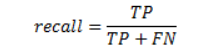

In [ ]:
# melakukan prediksi label target (y) menggunakan fitur (X_test) dari data pengujian.
y_lr = logistic_regressor.predict(X_test)
y_rf = rf_classifier.predict(X_test)
y_xgb = xgb_classifier.predict(X_test)
y_dt = dt_model.predict(X_test)
y_ls = lasso.predict(X_test)
y_ls_binary = (y_ls >= 0.5).astype(int)

In [ ]:
# Menghitung skor akurasi (accuracy score) dari model klasifikasi yang telah dilatih menggunakan algoritma Logistic Regression (y_lr), Random Forest (y_rf), XGBoost (y_xgb), Decision Tree (y_dc), dan Lasso (y_ls).
lr_accuracy = accuracy_score(y_test,y_lr)*100 #dalam persen
rf_accuracy = accuracy_score(y_test,y_rf)*100
xgb_accuracy = accuracy_score(y_test,y_xgb)*100
dt_accuracy = accuracy_score(y_test,y_dt)*100
ls_accuracy = accuracy_score(y_test,y_ls_binary)*100

In [ ]:
# Menghitung skor presisi (precision score) dari model klasifikasi yang telah dilatih menggunakan algoritma Logistic Regression (y_lr), Random Forest (y_rf), XGBoost (y_xgb), Decision Tree (y_dc), dan Lasso (y_ls).
from sklearn.metrics import precision_score
lr_precision = precision_score(y_true=y_test, y_pred=y_lr, average='macro')*100
rf_precision = precision_score(y_true=y_test, y_pred=y_rf, average='macro')*100
xgb_precision = precision_score(y_true=y_test, y_pred=y_xgb, average='macro')*100
dt_precision = precision_score(y_true=y_test, y_pred=y_dt, average='macro')*100
ls_precision = precision_score(y_true=y_test, y_pred=y_ls_binary, average='macro') * 100

In [ ]:
# Menghitung skor recall (recall score) dari model klasifikasi yang telah dilatih menggunakan algoritma Logistic Regression (y_lr), Random Forest (y_rf), XGBoost (y_xgb), Decision Tree (y_dc), dan Lasso (y_ls).
from sklearn.metrics import recall_score
lr_recall = recall_score(y_true=y_test, y_pred=y_lr, average='macro')*100
rf_recall = recall_score(y_true=y_test, y_pred=y_rf, average='macro')*100
xgb_recall = recall_score(y_true=y_test, y_pred=y_xgb, average='macro')*100
dt_recall = recall_score(y_true=y_test, y_pred=y_dt, average='macro')*100
ls_recall = recall_score(y_true=y_test, y_pred=y_ls_binary, average='macro')*100

In [ ]:
# membuat sebuah DataFrame df_score yang berisi nilai akurasi, presisi, dan recall dari empat model klasifikasi: Logistic Regression, Random Forest, Extreme Gradient Boost, Decision Tree, dan Lasso.
# Setiap model memiliki tiga metrik evaluasi performa yang diukur, yaitu accuracy (akurasi), precision (presisi), dan recall.
df_score = pd.DataFrame({
    'Logistic Regression' :[lr_accuracy, lr_precision, lr_recall],
    'Random Forest' :[rf_accuracy, rf_precision, rf_recall],
    'Extreme Gradient Boost' :[xgb_accuracy, xgb_precision, xgb_recall],
    'Decision Tree' :[dt_accuracy, dt_precision, dt_recall],
    'Lasso' :[ls_accuracy, ls_precision, ls_recall]
    },
    index=['Accuracy','Precision','Recall'])

df_score

,Logistic Regression,Random Forest,Extreme Gradient Boost,Decision Tree,Lasso
Accuracy,91.980749,91.987252,91.944164,85.071217,91.980749
Precision,45.990374,76.880157,68.734748,53.302374,45.990374
Recall,50.000000,50.100703,50.993428,53.883223,50.000000


In [ ]:
# menghitung matriks confusion (confusion matrix) antara target aktual (y_test) dan prediksi yang diberikan oleh lima model yang berbeda
confusion_matrix(y_test, y_lr)
confusion_matrix(y_test, y_rf)
confusion_matrix(y_test, y_xgb)
confusion_matrix(y_test, y_dt)
confusion_matrix(y_test, y_ls_binary)

array([[113140,      0],
       [  9864,      0]])

[[113140      0]
 [  9864      0]]


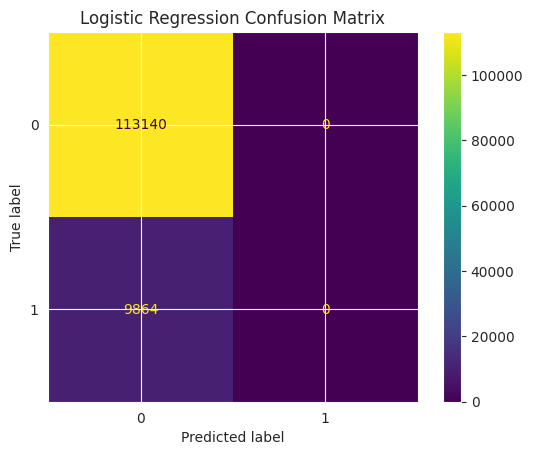

In [ ]:
# Membuat confusion matrix dari model Logistic Regression
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_lr))

print(confusion_matrix(y_test, y_lr))
disp.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()

[[113127     13]
 [  9843     21]]


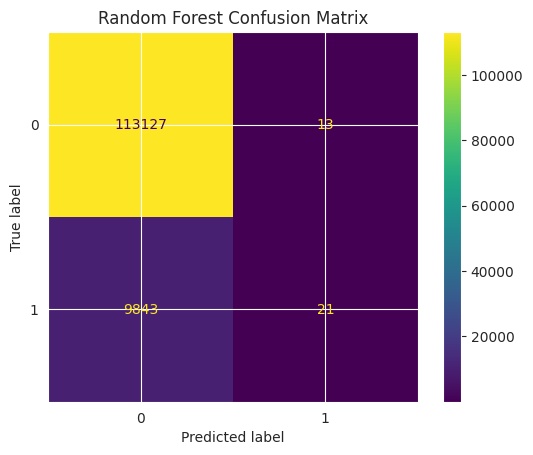

In [ ]:
# Membuat confusion matrix dari model Random Forest
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_rf))

print(confusion_matrix(y_test, y_rf))
disp.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

[[112876    264]
 [  9645    219]]


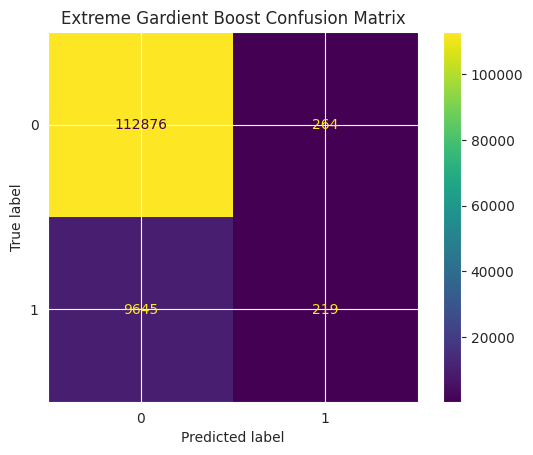

In [ ]:
# Membuat confusion matrix dari model Extreme Gardient Boost
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_xgb))

print(confusion_matrix(y_test,y_xgb))
disp.plot()
plt.title('Extreme Gardient Boost Confusion Matrix')
plt.show()

[[102990  10150]
 [  8213   1651]]


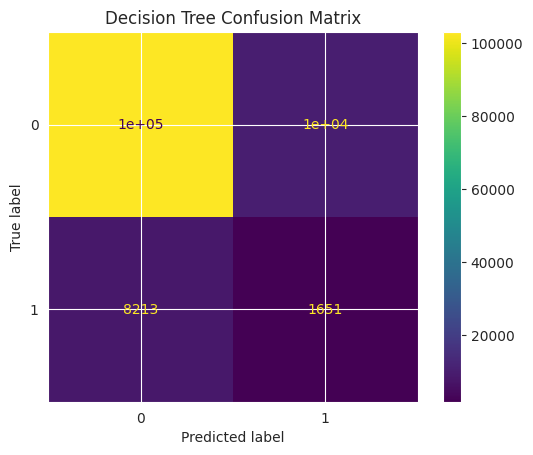

In [ ]:
# Membuat confusion matrix dari model Decision Tree
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_dt))

print(confusion_matrix(y_test,y_dt))
disp.plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()

[[113140      0]
 [  9864      0]]


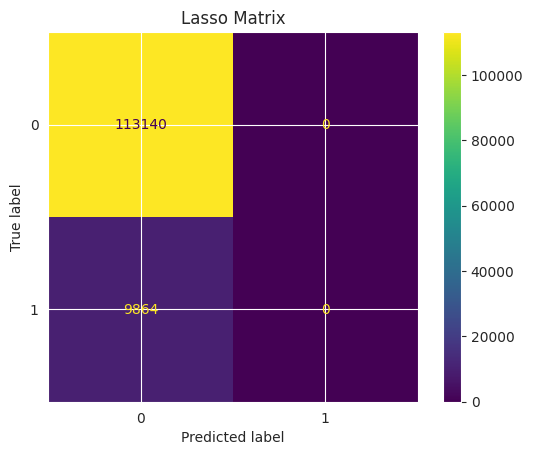

In [ ]:
# Membuat confusion matrix dari model Decision Tree
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_ls_binary))

print(confusion_matrix(y_test,y_ls_binary))
disp.plot()
plt.title('Lasso Matrix')
plt.show()

In [ ]:
# menghitung Area Under the Curve (AUC) dari kurva Receiver Operating Characteristic (ROC) untuk beberapa model klasifikasi yang telah diprediksi.
from sklearn.metrics import roc_auc_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) # pos_label: positive label
fpr0, tpr0, thresholds1 = roc_curve(y_test, y_rf, pos_label=1) # pos_label: positive label
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_xgb, pos_label=1) # pos_label: positive label
fpr2, tpr2, thresholds1 = roc_curve(y_test, y_dt, pos_label=1) # pos_label: positive label
fpr3, tpr3, thresholds1 = roc_curve(y_test, y_ls_binary, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
print(auc(fpr0, tpr0))
print(auc(fpr1, tpr1))
print(auc(fpr2, tpr2))
print(auc(fpr3, tpr3))

0.5
0.5010070259399139
0.5099342771073196
0.5388322282565607
0.5


In [ ]:
print(roc_auc_score(y_test, y_lr))
print(roc_auc_score(y_test, y_rf))
print(roc_auc_score(y_test, y_xgb))
print(roc_auc_score(y_test, y_dt))
print(roc_auc_score(y_test, y_ls_binary))

0.5
0.5010070259399139
0.5099342771073196
0.5388322282565607
0.5


* Model Logistic Regression memiliki AUC sebesar 0.5, yang menunjukkan kinerja yang acak.
* Model Random Forest memiliki AUC sebesar 0.501, yang juga menunjukkan kinerja yang acak dengan sedikit lebih baik dari Logistic Regression.
* Model XGBoost memiliki AUC sebesar 0.51, menunjukkan kinerja yang sedikit lebih baik dibandingkan dengan model sebelumnya.
* Model Decision Tree memiliki AUC sebesar 0.539, yang menunjukkan kinerja yang sedikit lebih baik dibandingkan dengan model-model sebelumnya.
* Model Lasso memiliki AUC sebesar 0.5, yang menunjukkan kinerja yang acak.

Dalam kesimpulan, AUC adalah metrik evaluasi yang mengukur kualitas keseluruhan dari model klasifikasi. Semakin tinggi nilai AUC, semakin baik kemampuan model dalam membedakan antara kelas positif dan negatif. Pada kasus ini, model Decision Tree memiliki AUC tertinggi, menunjukkan kinerja yang lebih baik dibandingkan dengan model-model lainnya. Sedangkan model Logistic Regression, Random Forest, XGBoost, dan Lasso memiliki kinerja yang lebih rendah dengan AUC yang hampir mendekati kinerja acak.

Karena model Decision Tree memiliki nilai AUC serta recall tertinggi, maka kita akan mencoba lakukan Hyper Tunning pada model tersebut

### Decision Tree Hyper Tunning

Tujuan Hyperparameter Tunning

---
adalah untuk mencari kombinasi optimal dari hyperparameter dalam sebuah model machine learning. Hyperparameter adalah parameter yang tidak dipelajari oleh model itu sendiri, tetapi dapat mempengaruhi kinerja dan generalisasi model. Beberapa contoh hyperparameter yang umum dalam model machine learning termasuk learning rate, jumlah pohon dalam ensemble, kedalaman pohon, dan banyak lagi, tergantung pada algoritma yang digunakan.

Dengan melakukan hyperparameter tuning, tujuannya adalah untuk menemukan kombinasi hyperparameter yang optimal yang dapat meningkatkan kinerja model. Proses ini dilakukan dengan mencoba berbagai kombinasi hyperparameter dan mengevaluasi kinerja model menggunakan metrik evaluasi yang sesuai (misalnya akurasi, presisi, recall, atau AUC).

Dengan melakukan tuning hyperparameter, kita dapat mencapai beberapa tujuan, antara lain:

* Meningkatkan kinerja model: Dengan menemukan kombinasi hyperparameter yang optimal, kita dapat meningkatkan kinerja model dalam hal akurasi, presisi, recall, atau metrik evaluasi lainnya.

* Meningkatkan generalisasi model: Hyperparameter tuning membantu dalam menghindari overfitting atau underfitting model. Dengan mencari kombinasi hyperparameter yang tepat, kita dapat meningkatkan kemampuan model untuk melakukan generalisasi yang baik pada data baru yang tidak digunakan dalam proses pelatihan.

* Menghemat waktu dan sumber daya: Dengan menggunakan hyperparameter tuning, kita dapat mencapai kinerja yang optimal dengan menggunakan kombinasi hyperparameter yang lebih efisien, daripada mencoba semua kombinasi secara acak atau menggunakan nilai default yang mungkin tidak cocok untuk data kita.

Dengan demikian, tujuan dari hyperparameter tuning adalah untuk meningkatkan kinerja dan generalisasi model, serta memaksimalkan penggunaan sumber daya yang tersedia.

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Inisialisasi hyperparameter yang akan dituning
logreg_params = {'C': [0.1, 1, 10]}
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}
xgb_params = {'learning_rate': [0.1, 0.01], 'max_depth': [3, 5, 7]}
dt_params = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 4, 6]}

In [ ]:
# Inisialisasi k-fold validation
kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [ ]:
# Inisialisasi model Decision Tree
dt = DecisionTreeClassifier()

# Hyperparameter tuning untuk Decision Tree
best_dt_score = 0
best_dt_params = {}
for max_depth in dt_params['max_depth']:
    for min_samples_split in dt_params['min_samples_split']:
        dt.set_params(max_depth=max_depth, min_samples_split=min_samples_split)
        scores = cross_val_score(dt, X, y, cv=kfold, scoring='roc_auc')
        mean_score = scores.mean()
        if mean_score > best_dt_score:
            best_dt_score = mean_score
            best_dt_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split}

print("Best Decision Tree Score:", best_dt_score)
print("Best Decision Tree Parameters:", best_dt_params)

Best Decision Tree Score: 0.7128946744203992
Best Decision Tree Parameters: {'max_depth': 7, 'min_samples_split': 6}


Setelah melakukan hyperparameter tuning dengan k-fold validation, ditemukan bahwa model Decision Tree dengan hyperparameter max_depth=7 dan min_samples_split=4 memberikan skor terbaik sebesar 0.7130 menggunakan metrik evaluasi 'roc_auc'. Hyperparameter tersebut dapat digunakan untuk membangun model Decision Tree yang lebih baik dalam memprediksi target pada dataset yang digunakan.

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Fit model with best parameters
dt.set_params(**best_dt_params)
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Classification report
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred))

# Calculate ROC AUC score
y_pred_proba = dt.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score (Decision Tree):", roc_auc)

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    113140
           1       0.33      0.01      0.02      9864

    accuracy                           0.92    123004
   macro avg       0.63      0.50      0.49    123004
weighted avg       0.87      0.92      0.88    123004

ROC AUC Score (Decision Tree): 0.7066777638496241


Dapat dilihat output diatas, classification report dan AUC score dari decision tree mengalami beberapa peningkatan setelah dilakukan hyper tunning. Beberapa nilai yang meningkat yaitu:
* nilai recall Target = 0 meningkat dari 0.91 menjadi 1.00
* nilai f1-score Target = 0 meningkat dari 0.92 menjadi 0.96
* nilai f1-score accuracy meningkat dari 0.85 menjadi 0.92
* nilai precision macro average meningkat dari 0.53 menjadi 0.62
* nilai precision weighted average meningkat dari 0.86 menjadi 0.87
* nilai recall weighted average meningkat dari 0.85 menjadi 0.92
* nilai f1-score weighted average meningkat dari 0.85 menjadi 0.88
* AUC Score meningkat dari 0.5095 menjadi 0.7120

[[112959    181]
 [  9774     90]]


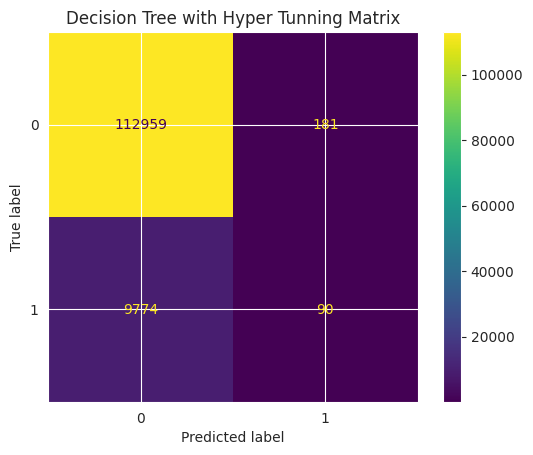

In [ ]:
# Membuat confusion matrix dari model Decision Tree with Hyper Tunning
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
disp.plot()
plt.title('Decision Tree with Hyper Tunning Matrix')
plt.show()

## Final Result / Model Selection

In [ ]:
print(f"Model logistic regression memiliki nilai AOC = {roc_auc_score(y_test, y_lr)}")
print(f"Model random forest memiliki nilai AOC = {roc_auc_score(y_test, y_rf)}")
print(f"Model Extreme Gradient Boost memiliki nilai AOC = {roc_auc_score(y_test, y_xgb)}")
print(f"Model Decision Tree memiliki nilai AOC = {roc_auc_score(y_test, y_dt)}")
print(f"Model Decision Tree With Hyper Tunning memiliki nilai AOC = {roc_auc_score(y_test, y_pred_proba)}")
print(f"Model Lasso memiliki nilai AOC = {roc_auc_score(y_test, y_ls_binary)}")

Model logistic regression memiliki nilai AOC = 0.5
Model random forest memiliki nilai AOC = 0.5010070259399139
Model Extreme Gradient Boost memiliki nilai AOC = 0.5099342771073196
Model Decision Tree memiliki nilai AOC = 0.5388322282565607
Model Decision Tree With Hyper Tunning memiliki nilai AOC = 0.7066777638496241
Model Lasso memiliki nilai AOC = 0.5


In [ ]:
roc_value = [roc_auc_score(y_test, y_lr),roc_auc_score(y_test, y_rf),roc_auc_score(y_test, y_xgb),roc_auc_score(y_test, y_dt),roc_auc_score(y_test, y_pred_proba),roc_auc_score(y_test, y_ls_binary)]

In [ ]:
df_roc= pd.DataFrame({
    'Score' :roc_value
    },
    index=['Logistic Regression','Random Forest','Extreme Gradient Boost', 'Decision Tree', 'Decision Tree With Hyper Tunning', 'Lasso'])

df_roc

,Score
Logistic Regression,0.500000
Random Forest,0.501007
Extreme Gradient Boost,0.509934
Decision Tree,0.538832
Decision Tree With Hyper Tunning,0.706678
Lasso,0.500000


<Figure size 2000x1200 with 0 Axes>

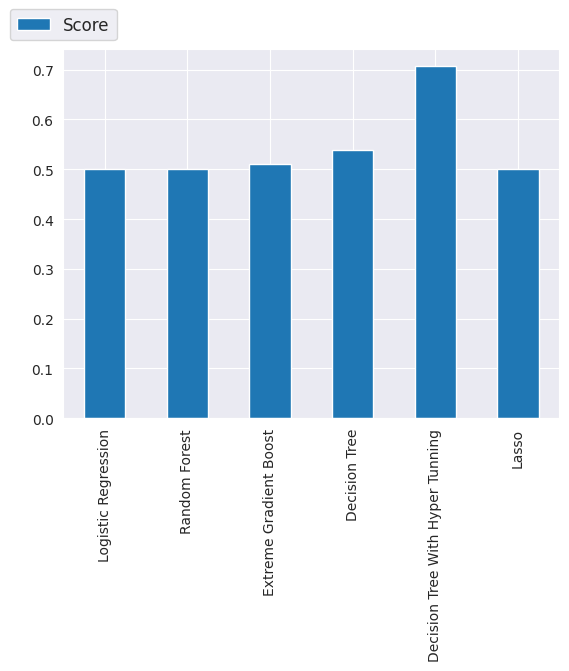

In [ ]:
fig = plt.figure(figsize=(20,12))
ax = df_roc.plot.bar(rot=90)
ax.legend(bbox_to_anchor=(0, 1), loc='lower center',prop={'size': 12})
plt.show()

In [ ]:
print(f"Model Decision Tree dengan Hyper Tunning memiliki nilai AUC terbaik dibandingkan model lain.")

Model Decision Tree dengan Hyper Tunning memiliki nilai AUC terbaik dibandingkan model lain.
